# Analysis of second dataset, namely **Total Samples Analysed**

## Imports & Setup

In [50]:
from google.colab import drive
import pandas as pd
import unicodedata

In [51]:
# Mount Google Drive
drive.mount('/content/drive')

# Define the file path
file_path = '/content/drive/My Drive/CAS_Final project/Anti-doping_testing_TOTALS_All data.xlsx'

# Load the Excel file to access sheet names
xlsx = pd.ExcelFile(file_path, engine='openpyxl')

# Display available sheet names
print(xlsx.sheet_names)

#Force mount - if changes made in Excel for example
#drive.mount("/content/drive", force_remount=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']


## Data Cleaning & Preprocessing

In [52]:
# To view data - Loop through all sheet names
for sheet in xlsx.sheet_names:
    df = pd.read_excel(file_path, sheet_name=sheet, header=1, skipfooter=2, engine='openpyxl')
    print(f"\n=== {sheet} ===")
    display(df)

Output hidden; open in https://colab.research.google.com to view.

In [4]:
# Store processed tables
tables = {}

# Loop through each sheet
for sheet in xlsx.sheet_names:
    # Read title
    title = pd.read_excel(file_path, sheet_name=sheet, header=None, nrows=1, engine='openpyxl').iloc[0, 0]

    # Read main data
    df = pd.read_excel(file_path, sheet_name=sheet, header=1, skipfooter=2, engine='openpyxl')

    # Identify sport column
    sport_col = df.columns[0]
    if sport_col is None or str(sport_col).startswith('Unnamed') or str(sport_col).isdigit():
        df = df.iloc[:, 1:]
        sport_col = df.columns[0]

    # Determine which columns to clean (3nd to 12th/16th, excluding last 3 columns)
    cols_to_clean = df.columns[2:-3]

    # Replace '-' with 0 and convert to int
    df[cols_to_clean] = (
        df[cols_to_clean]
        .replace('-', pd.NA)
        .apply(pd.to_numeric, errors='coerce')
        .fillna(0)
        .astype(int)
    )

    # Normalize and clean sport names (including removing "(R)")
    df[sport_col] = (
        df[sport_col]
        .astype(str)
        .apply(lambda x: unicodedata.normalize('NFKC', x))
        .str.strip()
        .str.replace(r'\s+', ' ', regex=True)
        .str.title()
        .str.replace('‐', '-', regex=True)         # Replace special hyphen
        .str.replace(r'\(R\)', '', regex=True)     # Remove (R)
        .str.strip()
    )

    # Group by sport
    df = df.groupby(sport_col, as_index=False)[cols_to_clean].sum()

    # Store cleaned table
    tables[sheet] = df

    # Display
    print(f"\n=== {title} ===")
    display(df.head())


===  2014 - Total Samples Analyzed in Sports/Disciplines (Urine and Blood) ===


Sports  Urine - IC - Samples  Urine - IC - ATF  \
0             Aikido                     0                 0   
1         Air Sports                    66                 0   
2  American Football                   396                 2   
3           Aquatics                  6707                13   
4            Archery                   648                 0   

   Urine - IC - AFF  Urine - OOC - Samples  Urine - OOC - ATF  \
0                 0                      6                  0   
1                 0                     70                  0   
2                12                    631                  6   
3                52                   5752                 11   
4                 9                    345                  0   

   Urine - OOC - AFF  Blood - IC - Samples  Blood - IC - ATF  \
0                  0                     0                 0   
1                  0                     0                 0   
2                  8                    10                 0   
3                 13                   116                 0   
4                  2                     0                 0   

   Blood - IC - AFF  Blood - OOC - Samples  Blood - OOC - ATF  \
0                 0                      0                  0   
1                 0                      0                  0   
2                 0                     55                  0   
3                 0                    275                  0   
4                 0                      0                  0   

   Blood - OOC - AFF  Sub Total  
0                  0          6  
1                  0        136  
2                  0       1092  
3                  0      12850  
4                  0        993


===  2015 - Total Samples Analyzed in Sports/Disciplines (Urine and Blood) ===


Sports  Urine - IC - Samples  Urine - IC - ATF  \
0             Aikido                     2                 0   
1         Air Sports                    91                 0   
2  American Football                   360                 0   
3            Angling                     0                 0   
4           Aquatics                  6837                48   

   Urine - IC - AFF  Urine - OOC - Samples  Urine - OOC - ATF  \
0                 0                     14                  0   
1                 2                     52                  0   
2                12                    512                  1   
3                 0                      0                  0   
4                46                   6279                 48   

   Urine - OOC - AFF  Blood - IC - Samples  Blood - IC - ATF  \
0                  0                     0                 0   
1                  1                     0                 0   
2                 21                     4                 0   
3                  0                     0                 0   
4                 13                   404                 0   

   Blood - IC - AFF  Blood - OOC - Samples  Blood - OOC - ATF  \
0                 0                      1                  0   
1                 0                      0                  0   
2                 0                     27                  0   
3                 0                      0                  0   
4                 0                    463                  0   

   Blood - OOC - AFF  Sub Total  
0                  0         17  
1                  0        143  
2                  0        903  
3                  0          0  
4                  0      13983


===  2016 - Total Samples Analyzed in Sports/Disciplines (Urine and Blood) ===


Sports  Urine - IC - Samples  Urine - IC - ATF  \
0             Aikido                    13                 0   
1         Air Sports                    83                 0   
2  American Football                   845                 0   
3           Aquatics                  6605                15   
4            Archery                   668                 1   

   Urine - IC - AFF  Urine - OOC - Samples  Urine - OOC - ATF  \
0                 0                      7                  0   
1                 1                     41                  0   
2                55                    675                  0   
3               101                   8134                 14   
4                 9                    451                  0   

   Urine - OOC - AFF  Blood - IC - Samples  Blood - IC - ATF  \
0                  0                     8                 0   
1                  0                     0                 0   
2                 15                    14                 0   
3                 55                   186                 0   
4                  5                     0                 0   

   Blood - IC - AFF  Blood - OOC - Samples  Blood - OOC - ATF  \
0                 0                      0                  0   
1                 0                      0                  0   
2                 0                     82                  0   
3                 0                   1362                  4   
4                 0                      1                  0   

   Blood - OOC - AFF  Sub Total  
0                  0         28  
1                  0        124  
2                  0       1616  
3                  1      16287  
4                  0       1120


===  2017 - Total Samples Analyzed in Sports/Disciplines (Urine and Blood) ===


Sports  Urine - IC - Samples  Urine - IC - ATF  \
0             Aikido                    12                 0   
1         Air Sports                    47                 0   
2  American Football                   430                 0   
3           Aquatics                  6593                 0   
4            Archery                   678                 3   

   Urine - IC - AFF  Urine - OOC - Samples  Urine - OOC - ATF  \
0                 0                      2                  0   
1                 1                     15                  0   
2                30                    534                  0   
3                52                   7127                  2   
4                 5                    272                  0   

   Urine - OOC - AFF  Blood - IC - Samples  Blood - IC - ATF  \
0                  0                     0                 0   
1                  1                     0                 0   
2                  4                    30                 0   
3                 22                   379                 0   
4                  3                     1                 0   

   Blood - IC - AFF  Blood - OOC - Samples  Blood - OOC - ATF  \
0                 0                      0                  0   
1                 0                      0                  0   
2                 0                     52                  0   
3                 0                   1646                  1   
4                 0                      0                  0   

   Blood - OOC - AFF  Sub Total  
0                  0         14  
1                  0         62  
2                  0       1046  
3                  0      15745  
4                  0        951


===  2018 - Total Samples Analyzed in Sports/Disciplines (Urine and Blood) ===


Sports  Urine - IC - Samples  Urine - IC - ATF  \
0  Aesthetic Group Gymnastics                     3                 0   
1                      Aikido                     3                 0   
2                  Air Sports                    65                 0   
3           American Football                   589                 0   
4                    Aquatics                  6311                 0   

   Urine - IC - AFF  Urine - OOC - Samples  Urine - OOC - ATF  \
0                 0                      0                  0   
1                 0                      0                  0   
2                 4                     57                  0   
3                57                    563                  1   
4                58                   6997                  5   

   Urine - OOC - AFF  Blood - IC - Samples  Blood - IC - ATF  \
0                  0                     0                 0   
1                  0                     0                 0   
2                  1                     0                 0   
3                  4                    54                 0   
4                 20                   325                 0   

   Blood - IC - AFF  Blood - OOC - Samples  Blood - OOC - ATF  \
0                 0                      0                  0   
1                 0                      0                  0   
2                 0                      0                  0   
3                 0                     27                  0   
4                 0                   1024                  0   

   Blood - OOC - AFF  Sub Total  
0                  0          3  
1                  0          3  
2                  0        122  
3                  0       1233  
4                  0      14657


===  2019 - Total Samples Analyzed in Sports/Disciplines (Urine and Blood) ===


Sports  Urine - IC - Samples  Urine - IC - ATF  \
0  Aesthetic Group Gymnastics                     6                 0   
1                      Aikido                     2                 0   
2                  Air Sports                    73                 1   
3           American Football                   541                 6   
4                    Aquatics                  7225                 5   

   Urine - IC - AFF  Urine - OOC - Samples  Urine - OOC - ATF  \
0                 0                      0                  0   
1                 0                      1                  0   
2                 2                    121                  0   
3                27                    459                  3   
4                65                   7823                  6   

   Urine - OOC - AFF  Blood - IC - Samples  Blood - IC - ATF  \
0                  0                     0                 0   
1                  0                     0                 0   
2                 12                     0                 0   
3                  6                    31                 0   
4                 16                   383                 1   

   Blood - IC - AFF  Blood - OOC - Samples  Blood - OOC - ATF  \
0                 0                      0                  0   
1                 0                      0                  0   
2                 0                      0                  0   
3                 0                     70                  0   
4                 0                   2414                  0   

   Blood - OOC - AFF  Sub Total  
0                  0          6  
1                  0          3  
2                  0        194  
3                  0       1101  
4                  0      17845


===  2020 - Total Samples Analyzed in Sports/Disciplines (Urine and Blood) ===


Sports  Urine - IC - Samples  Urine - IC - ATF  \
0  Aesthetic Group Gymnastics                     3                 0   
1                      Aikido                     2                 0   
2                  Air Sports                    12                 0   
3           American Football                   145                 1   
4                    Aquatics                  2531                 0   

   Urine - IC - AFF  Urine - OOC - Samples  Urine - OOC - ATF  \
0                 0                      2                  0   
1                 0                      0                  0   
2                 0                     10                  0   
3                 4                    173                  2   
4                23                   6562                  5   

   Urine - OOC - AFF  Blood - IC - Samples  Blood - IC - ATF  \
0                  0                     0                 0   
1                  0                     0                 0   
2                  0                     0                 0   
3                  3                     0                 0   
4                  3                    95                 0   

   Blood - IC - AFF  Blood - OOC - Samples  Blood - OOC - ATF  \
0                 0                      0                  0   
1                 0                      0                  0   
2                 0                      0                  0   
3                 0                     14                  0   
4                 0                    624                  0   

   Blood - OOC - AFF  Sub Total  
0                  0          5  
1                  0          2  
2                  0         22  
3                  0        332  
4                  0       9812


===  2021 - Total Samples Analyzed in Sports/Disciplines (Urine and Blood) ===


Sports  Urine - IC - Samples  Urine - IC - ATF  \
0         Air Sports                    33                 0   
1  American Football                   454                 1   
2           Aquatics                  5376                 1   
3            Archery                   623                 6   
4      Arm Wrestling                   117                 0   

   Urine - IC - AFF  Urine - OOC - Samples  Urine - OOC - ATF  \
0                 0                      8                  1   
1                14                    306                  0   
2                71                   9493                  4   
3                12                    744                  0   
4                10                     64                  0   

   Urine - OOC - AFF  Blood - IC - Samples  Blood - IC - ATF  \
0                  0                     0                 0   
1                  1                    21                 0   
2                 17                   250                 1   
3                  6                     0                 0   
4                  6                     0                 0   

   Blood - IC - AFF  Blood - OOC - Samples  Blood - OOC - ATF  \
0                 0                      0                  0   
1                 0                     16                  0   
2                 0                   1141                  0   
3                 0                      8                  0   
4                 0                      2                  0   

   Blood - OOC - AFF  DBS - IC - Samples  DBS - IC - AFF  DBS - OOC - Samples  \
0                  0                   0               0                    0   
1                  0                   0               0                    0   
2                  0                   0               0                  120   
3                  0                   0               0                    7   
4                  0                   0               0                    0   

   DBS - OOC - AFF  Sub Total  
0                0         41  
1                0        797  
2                0      16380  
3                0       1382  
4                0        183


===  2022 - Total Samples Analyzed in Sports/Disciplines (Urine and Blood) ===


Sports  Urine - IC - Samples  Urine - IC - ATF  \
0             Aikido                     2                 0   
1         Air Sports                    15                 0   
2  American Football                   464                 0   
3           Aquatics                  6336                 4   
4            Archery                   642                 2   

   Urine - IC - AFF  Urine - OOC - Samples  Urine - OOC - ATF  \
0                 0                      0                  0   
1                 0                     14                  0   
2                20                    490                  8   
3                45                   8204                  9   
4                10                    446                  1   

   Urine - OOC - AFF  Blood - IC - Samples  Blood - IC - ATF  \
0                  0                     0                 0   
1                  0                     0                 0   
2                  5                    25                 0   
3                 24                   337                 0   
4                  2                     0                 0   

   Blood - IC - AFF  Blood - OOC - Samples  Blood - OOC - ATF  \
0                 0                      0                  0   
1                 0                      0                  0   
2                 0                     49                  1   
3                 0                   1141                  0   
4                 0                      0                  0   

   Blood - OOC - AFF  DBS - IC - Samples  DBS - IC - AFF  DBS - OOC - Samples  \
0                  0                   0               0                    0   
1                  0                   0               0                    0   
2                  0                  40               1                    0   
3                  0                   7               0                   77   
4                  0                   0               0                    0   

   DBS - OOC - AFF  Sub Total  
0                0          2  
1                0         29  
2                0       1068  
3                0      16102  
4                0       1088

In [5]:
# Container for sports per sheet
sports_by_sheet = {}

# Loop through all sheets
for sheet in xlsx.sheet_names:
    # Read data
    df = pd.read_excel(file_path, sheet_name=sheet, header=1, skipfooter=2, engine='openpyxl')

    # Get sport column
    sport_col = df.columns[0]

    # Extract and normalize sports
    sports = (
        df[sport_col]
        .astype(str)
        .apply(lambda x: unicodedata.normalize('NFKC', x))
        .str.strip()
        .str.replace(r'\s+', ' ', regex=True)
        .str.title()
        .str.replace('‐', '-', regex=True)
        .str.replace(r'\(R\)', '', regex=True)
        .str.strip()
        .apply(lambda x: x.replace('Ski-Mountaineering', 'Ski Mountaineering') if sheet == '2014' else x)
        .apply(lambda x: x.replace('E-Sports', 'Electronic Sports') if sheet == '2014' else x)
        .apply(lambda x: x.replace('Dance Sport', 'Dancesport') if sheet in ['2014', '2016'] else x)
        .apply(lambda x: x.replace('Cross Training/Military Cross', 'Cross Training/Military Cross Training') if sheet == '2017' else x)
        .apply(lambda x: x.replace('Brazilian Jiu-Jitsu', 'Jiu-Jitsu') if sheet in ['2021', '2022'] else x)
        .apply(lambda x: x.replace('Armwrestling', 'Arm Wrestling') if sheet in ['2015', '2016', '2017', '2018', '2019'] else x)
        .apply(lambda x: x.replace('Automobile Sports', 'Automobile') if sheet == '2019' else x)
        .apply(lambda x: x.replace('Firefighting And', 'Firefighting And Rescuing') if sheet in ['2014', '2018'] else x)
        .apply(lambda x: x.replace('Lifesaving', 'Life Saving') if sheet in ['2019', '2022'] else x)
        .apply(lambda x: x.replace('Waterskiing', 'Water Skiing') if sheet in ['2016', '2017', '2018', '2021', '2022'] else x)
        .apply(lambda x: x.replace('Taekwondo-Aut', 'Taekwondo - Aut') if sheet == '2018' else x)
        .apply(lambda x: x.replace('Pensak Silat', 'Pencak Silat') if sheet == '2022' else x)
        .apply(lambda x: x.replace('Military Pentathlon', 'Military Sport Pentathlon') if sheet == '2014' else x)
        .unique()
        .tolist()
    )

    # Save cleaned sport list
    sports_by_sheet[sheet] = sports

# Create table data
table_data = []
for sheet, sports in sports_by_sheet.items():
    for sport in sorted(sports):
        table_data.append([sheet, sport])

# Build DataFrame
df_sports = pd.DataFrame(table_data, columns=['Year', 'Sport'])

# Pivot to wide format
df_sports_pivot = df_sports.pivot(index='Sport', columns='Year', values='Sport')

# Replace NaNs with empty strings
df_sports_pivot = df_sports_pivot.fillna('')

# Remove sport names (index)
df_sports_pivot = df_sports_pivot.reset_index(drop=True)

# Add total row (count non-empty cells)
df_sports_pivot.loc['Total'] = (df_sports_pivot != '').sum()

# Print table title
print("\n=== Table: Sports analyzed for doping from 2014 to 2022 ===")

# Increase display limits
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display result
display(df_sports_pivot)


=== Table: Sports analyzed for doping from 2014 to 2022 ===


Year                          2014                         2015  \
0                                                                 
1                           Aikido                       Aikido   
2                       Air Sports                   Air Sports   
3                American Football            American Football   
4                                                       Angling   
5                         Aquatics                     Aquatics   
6                          Archery                      Archery   
7                    Arm Wrestling                Arm Wrestling   
8                        Athletics                    Athletics   
9                 Australian Rules                                
10                                    Australian Rules Football   
11                      Automobile                   Automobile   
12                       Badminton                    Badminton   
13              Balle Au Tambourin           Balle Au Tambourin   
14                 Ballon Au Poing              Ballon Au Poing   
15                           Bandy                        Bandy   
16                        Baseball                     Baseball   
17                                                                
18                      Basketball                   Basketball   
19                   Basque Pelota                Basque Pelota   
20                   Basque Sports                Basque Sports   
21                                                                
22                        Biathlon                     Biathlon   
23                       Billiards                    Billiards   
24                                                                
25                       Bobsleigh                    Bobsleigh   
26                          Boccia                       Boccia   
27                    Bodybuilding                 Bodybuilding   
28                   Boot-Throwing                                
29                   Boules Sports                Boules Sports   
30                         Bowling                      Bowling   
31                           Bowls                        Bowls   
32                          Boxing                       Boxing   
33                          Bridge                       Bridge   
34                                                    Broomball   
35                            Budo                         Budo   
36                                                                
37                                                                
38                                                                
39                   Canoe / Kayak                Canoe / Kayak   
40                                                                
41                         Casting                      Casting   
42                                                                
43                           Cheer                        Cheer   
44                                                                
45                           Chess                        Chess   
46                                                                
47                                                                
48            Clay Target Shooting         Clay Target Shooting   
49                                                                
50     Climbing And Mountaineering                                
51                                                                
52                                                                
53                                                Combat Sports   
54                  Company Sports               Company Sports   
55              Course Camarguaise                                
56                 Course Landaise              Course Landaise   
57                                                                
58                         Cricket             

## Exploratory Data Analysis

In [6]:
# 1) Build a list of sets (one set per sheet)
sport_sets = []

for sheet, sports in sports_by_sheet.items():
    sport_sets.append(set(sports))

# 2) Find intersection of all sets (i.e., sports present in every year)
sports_in_all_years = set.intersection(*sport_sets)

# 3) Display results
print(f"\n=== Sports present in ALL years ({len(sports_in_all_years)} total) ===")
for sport in sorted(sports_in_all_years):
    print(sport)


=== Sports present in ALL years (94 total) ===
Air Sports
American Football
Aquatics
Archery
Arm Wrestling
Athletics
Automobile
Badminton
Bandy
Baseball
Basketball
Basque Pelota
Biathlon
Billiards
Bobsleigh
Boccia
Bodybuilding
Boules Sports
Bowling
Boxing
Bridge
Cheer
Chess
Cricket
Curling
Cycling
Dancesport
Darts
Dragon Boat
Equestrian
Fencing
Field Hockey
Fistball
Floorball
Flying Disc
Football
Football 7-A-Side
Gaelic Games
Go
Goalball
Golf
Gymnastics
Handball
Ice Hockey
Icestocksport
Jiu-Jitsu
Judo
Kabaddi
Karate
Kendo
Kettlebell Lifting
Kickboxing
Korfball
Life Saving
Luge
Minigolf
Modern Pentathlon
Motorcycling
Muaythai
Netball
Orienteering
Pencak Silat
Polo
Powerboating
Powerlifting
Racquetball
Roller Sports
Rowing
Sailing
Sambo
Savate
School Sports
Sepaktakraw
Shooting
Skating
Ski Mountaineering
Skiing
Sleddog
Soft Tennis
Sport Climbing
Squash
Sumo
Surfing
Table Tennis
Taekwondo
Tennis
Triathlon
Tug Of War
Underwater Sports
Volleyball
Water Skiing
Weightlifting
Wrestling
Wushu

In [7]:
# Provided whitelist of sports
allowed_sports = {
    "American Football", "Aquatics", "Archery", "Arm Wrestling", "Athletics", "Badminton", "Basketball",
    "Biathlon", "Billiards Sports", "Bodybuilding", "Boules Sports", "Boxing", "Cricket", "Cycling",
    "Equestrian", "Fencing", "Field Hockey", "Floorball", "Football", "Goalball", "Golf", "Gymnastics",
    "Handball", "Ice Hockey", "Judo", "Kabaddi", "Karate", "Kickboxing", "Muaythai", "Powerboating",
    "Powerlifting", "Roller Sports", "Rowing", "Sambo", "Shooting", "Skating", "Skiing", "Squash",
    "Table Tennis", "Taekwondo", "Tennis", "Triathlon", "Underwater Sports", "Volleyball",
    "Weightlifting", "Wrestling", "Wushu"
}

# 1) Build a list of sets (one set per sheet), but filter only allowed sports
sport_sets = []
for sheet, sports in sports_by_sheet.items():
    filtered_sports = set(sports) & allowed_sports
    sport_sets.append(filtered_sports)

# 2) Find intersection of all sets (i.e., sports present in every year)
if sport_sets:  # Avoids error if list is empty
    sports_in_all_years = set.intersection(*sport_sets)
else:
    sports_in_all_years = set()

# 3) Display results
print(f"\n=== Sports present in ALL years ({len(sports_in_all_years)} total) ===")
for sport in sorted(sports_in_all_years):
    print(sport)



=== Sports present in ALL years (46 total) ===
American Football
Aquatics
Archery
Arm Wrestling
Athletics
Badminton
Basketball
Biathlon
Bodybuilding
Boules Sports
Boxing
Cricket
Cycling
Equestrian
Fencing
Field Hockey
Floorball
Football
Goalball
Golf
Gymnastics
Handball
Ice Hockey
Judo
Kabaddi
Karate
Kickboxing
Muaythai
Powerboating
Powerlifting
Roller Sports
Rowing
Sambo
Shooting
Skating
Skiing
Squash
Table Tennis
Taekwondo
Tennis
Triathlon
Underwater Sports
Volleyball
Weightlifting
Wrestling
Wushu


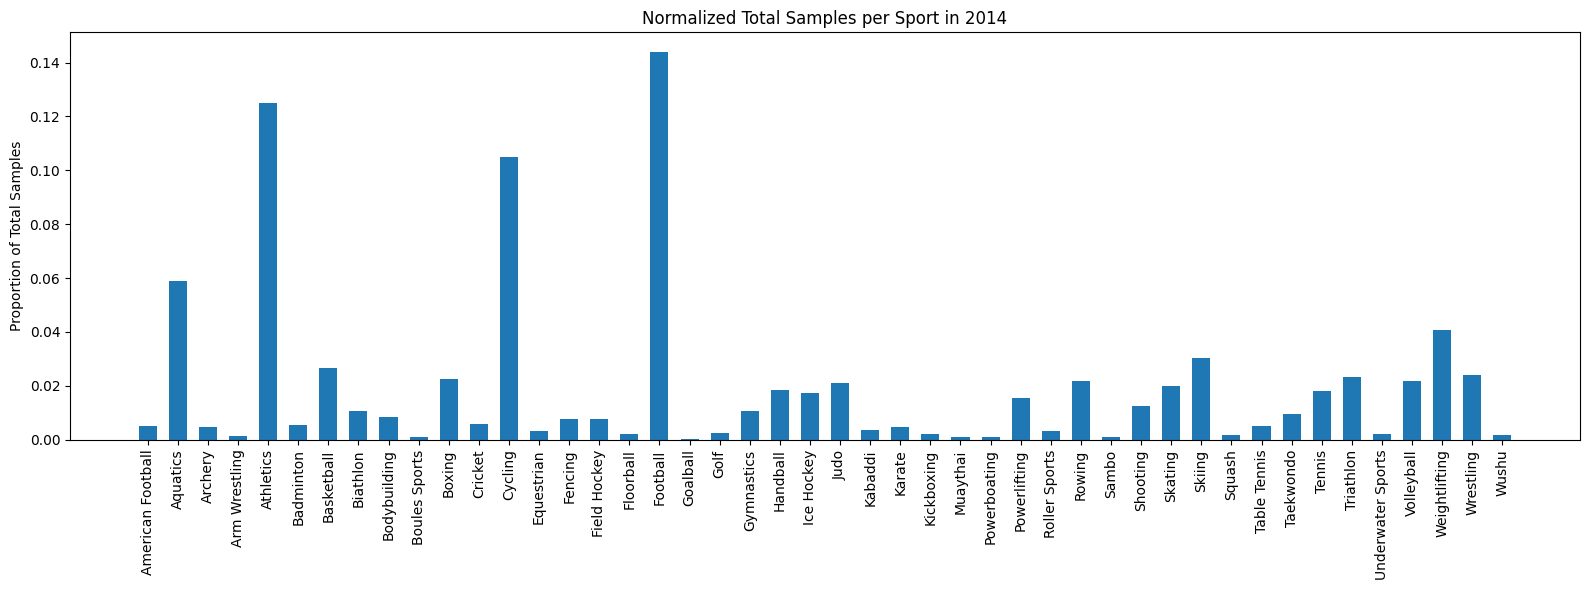

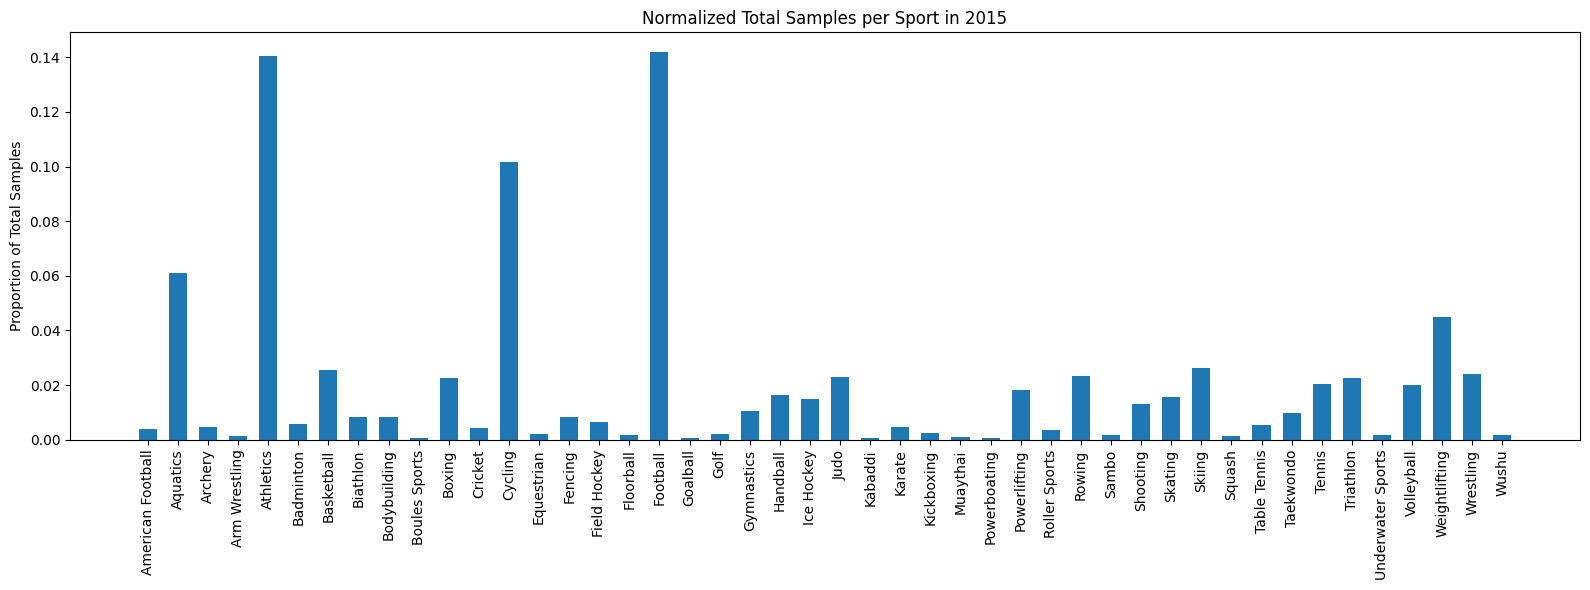

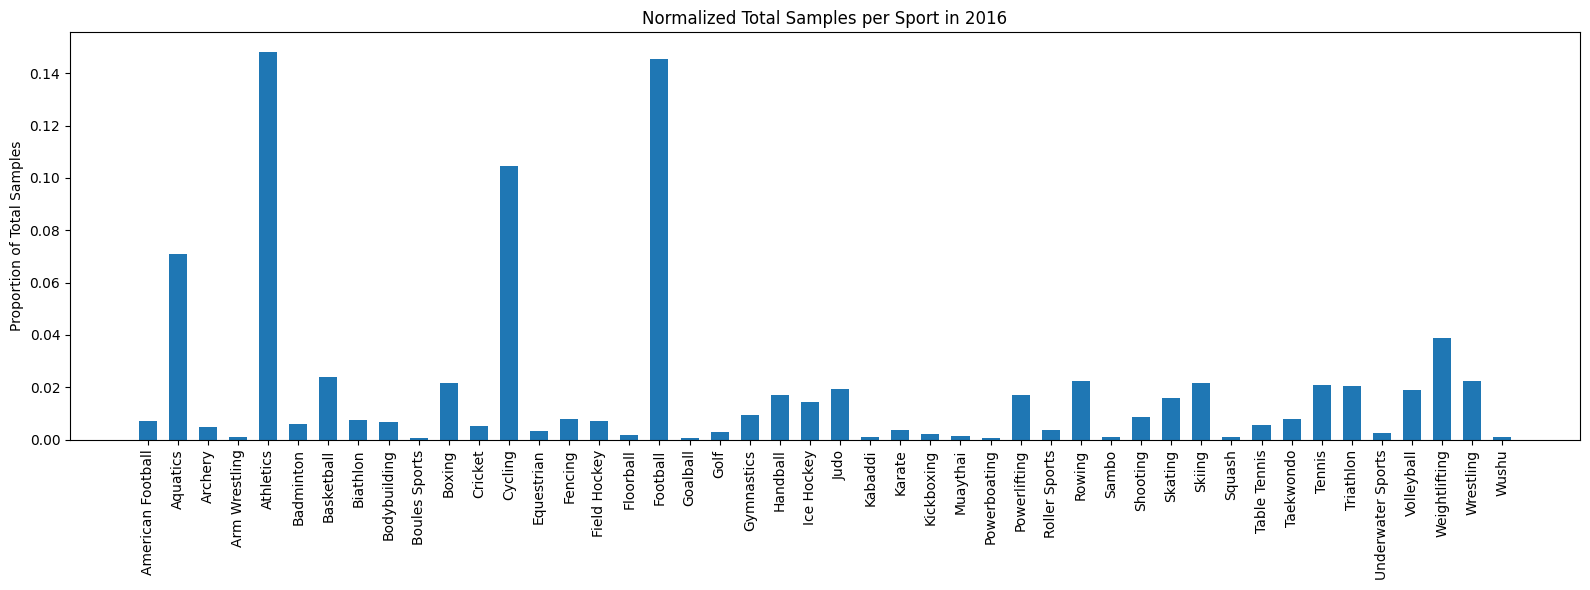

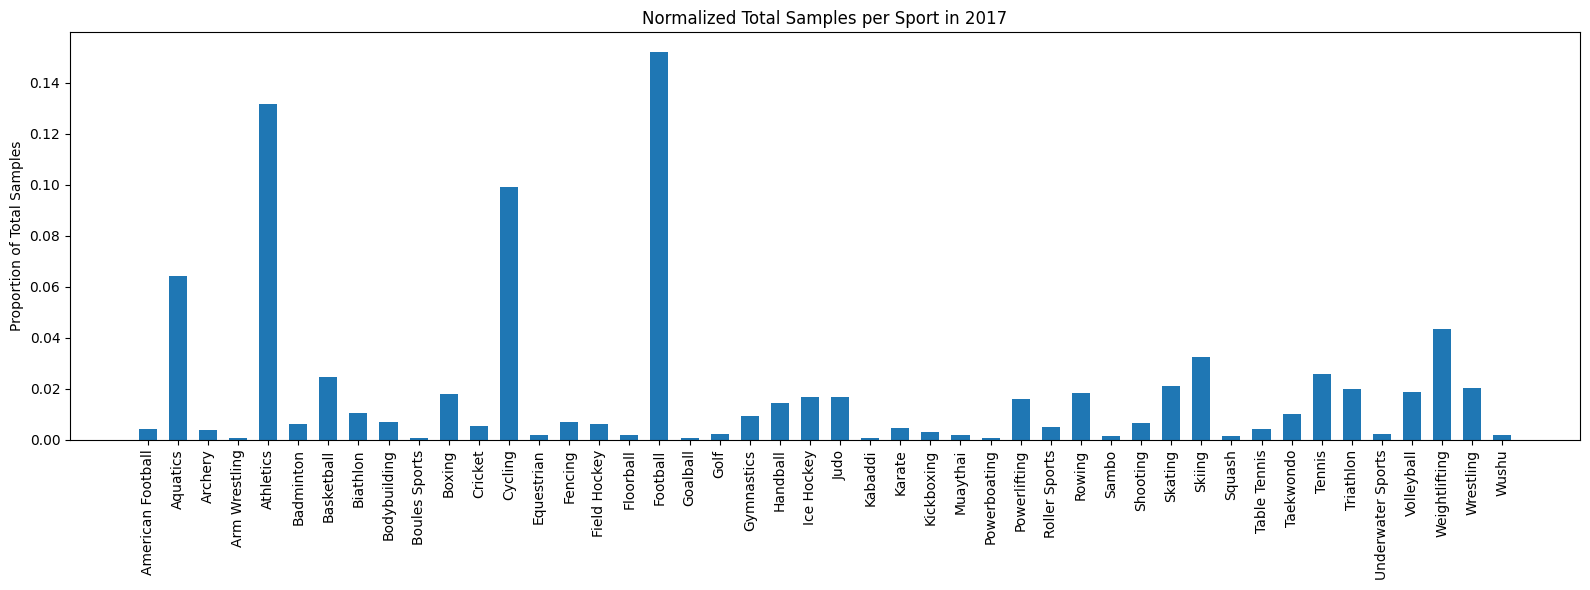

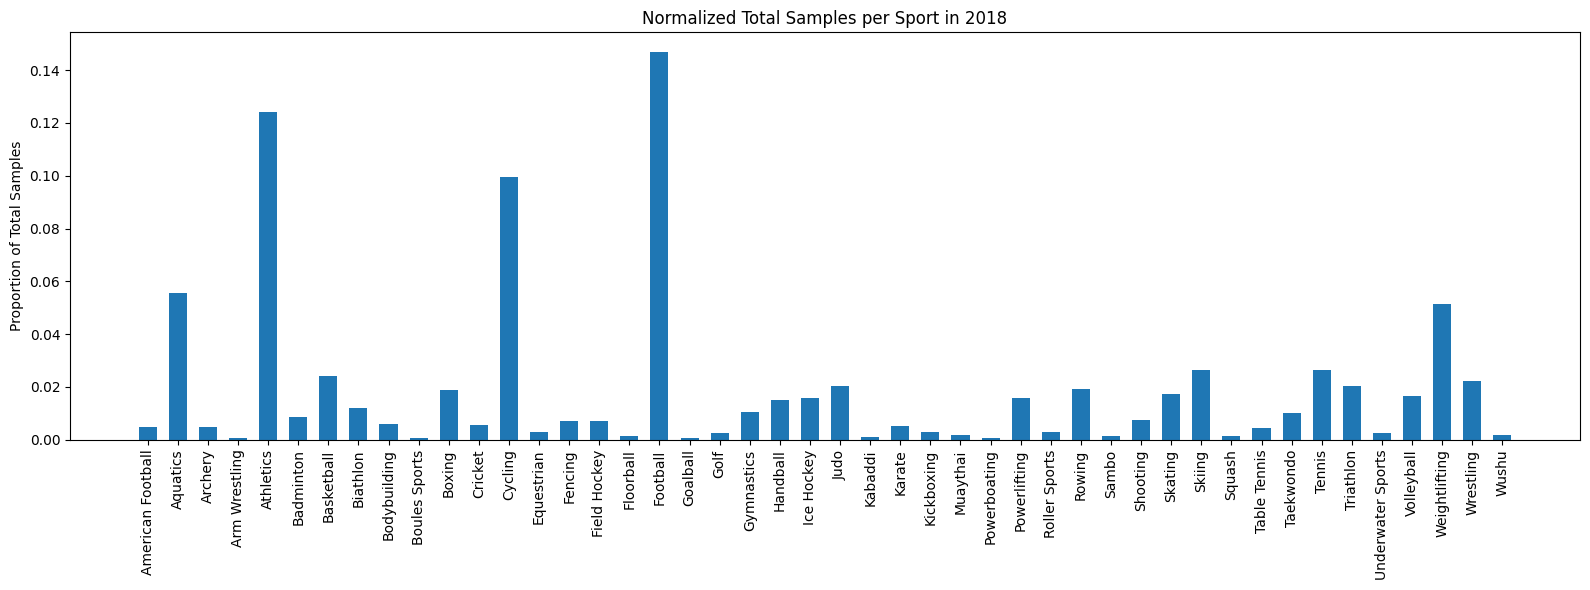

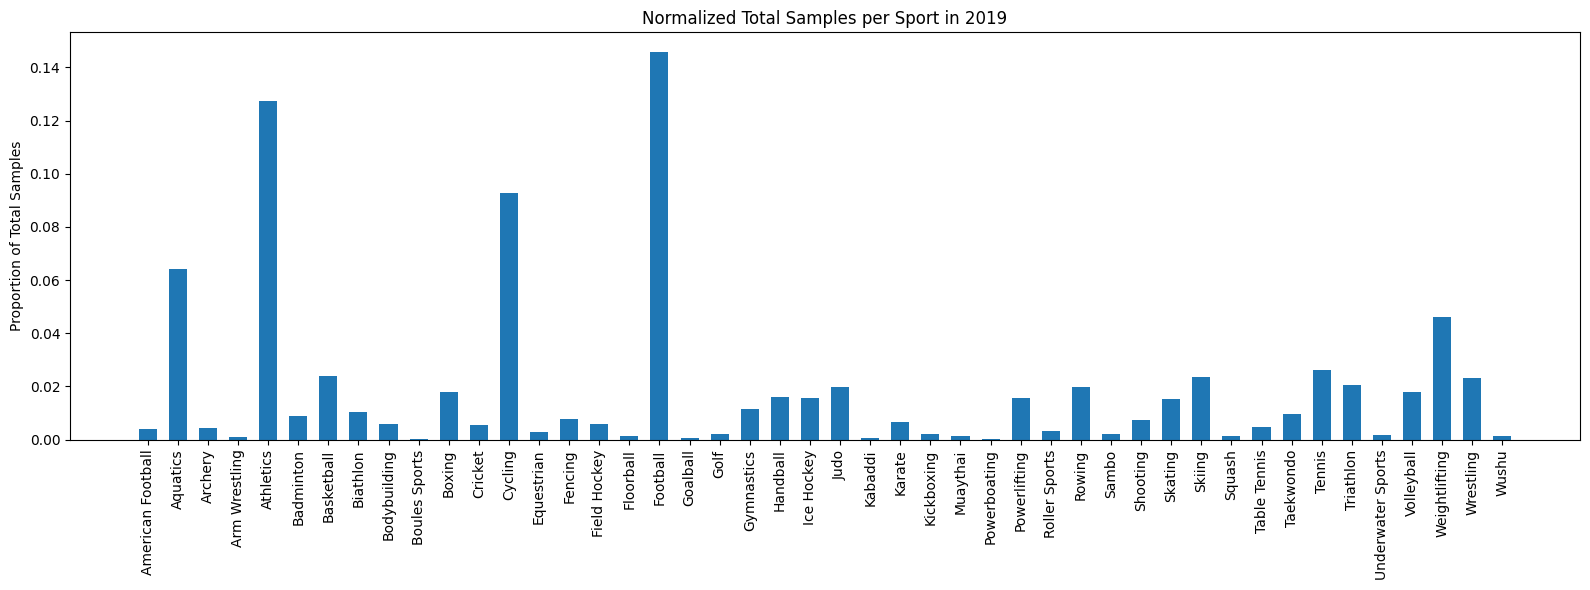

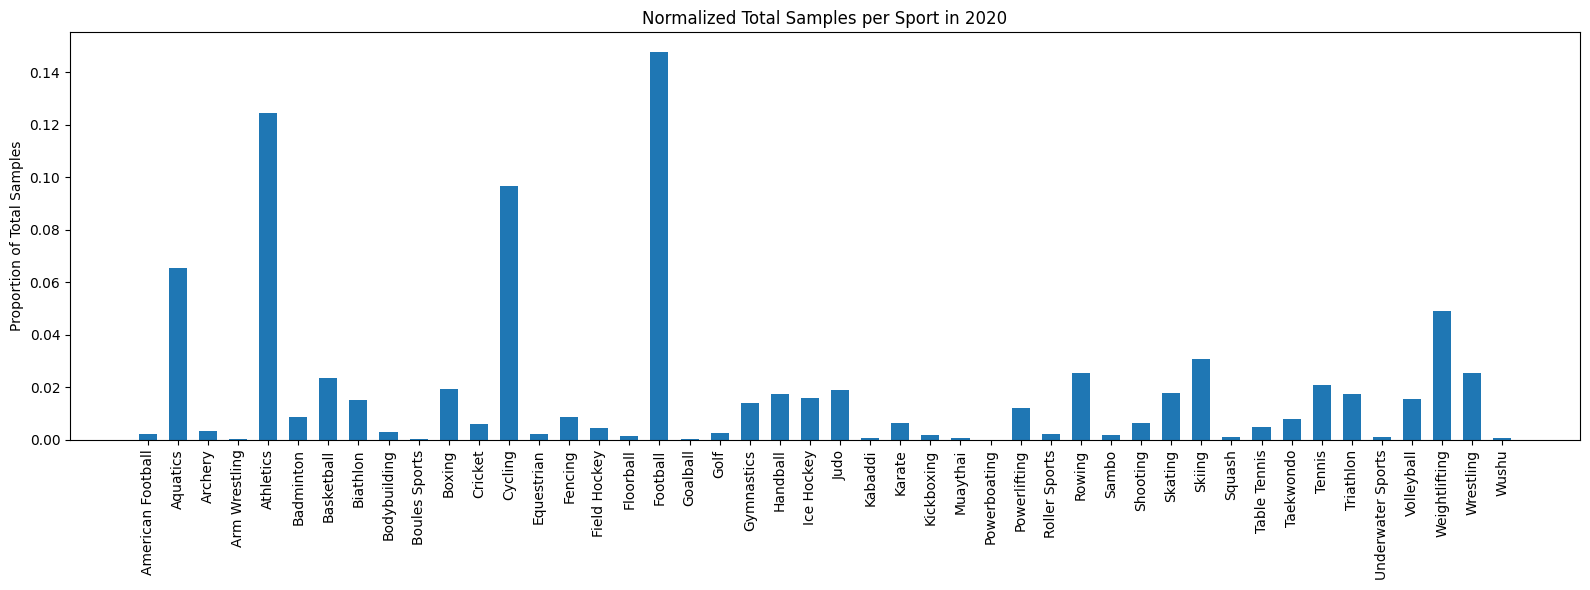

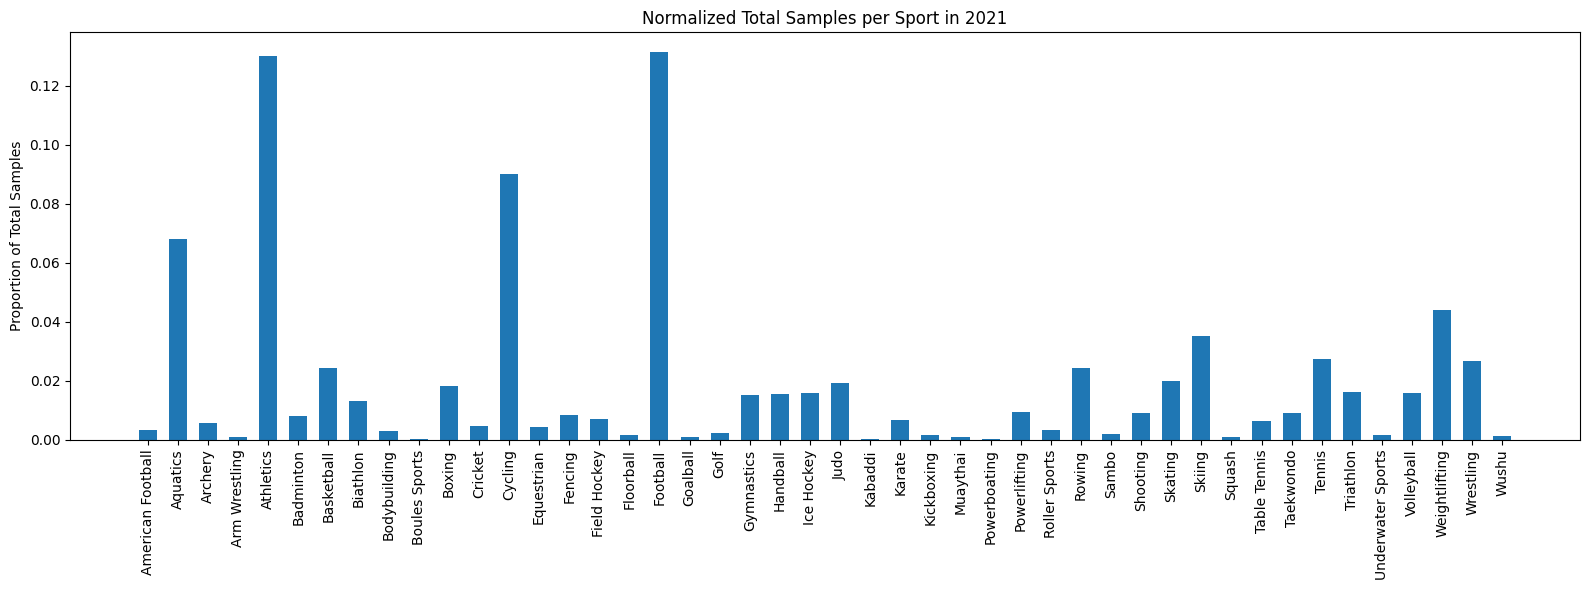

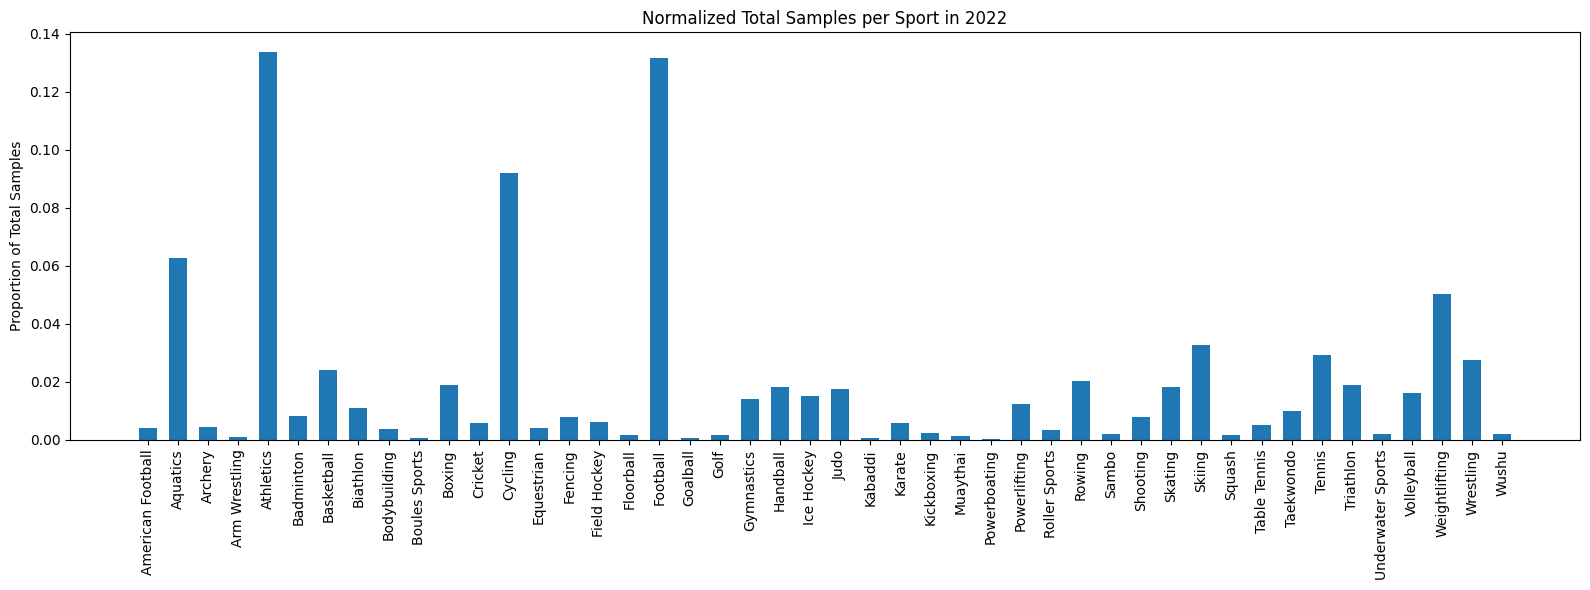

In [8]:
import matplotlib.pyplot as plt

# Container to hold normalized total sample data
normalized_data = []

# Loop through each year's table
for year, df in tables.items():
    year = int(year)
    total_samples_column = df.columns[-1]  # Last column = "Sub Total"
    sheet_total_samples = df[total_samples_column].sum()

    # Get the sport column
    sport_col = df.columns[0]

    # Loop through each sport
    for _, row in df.iterrows():
        sport = row[sport_col]
        sport_total_samples = row[total_samples_column]
        norm_total = sport_total_samples / sheet_total_samples

        normalized_data.append({
            'Year': year,
            'Sport': sport,
            'Normalized_Total': norm_total
        })

# Convert to DataFrame
df_normalized = pd.DataFrame(normalized_data)

# Filter to include only sports present in every year
df_common = df_normalized[df_normalized['Sport'].isin(sports_in_all_years)]

# Sort sports for consistent plotting
sports_sorted = sorted(df_common['Sport'].unique())

# Plot one histogram per year
for year in sorted(df_common['Year'].unique()):
    df_year = df_common[df_common['Year'] == year].set_index('Sport')
    df_year = df_year.reindex(sports_sorted).fillna(0)

    x = range(len(sports_sorted))
    width = 0.6

    plt.figure(figsize=(16, 6))
    plt.bar(x, df_year['Normalized_Total'], width=width)

    plt.xticks(x, sports_sorted, rotation=90)
    plt.ylabel('Proportion of Total Samples')
    plt.title(f'Normalized Total Samples per Sport in {year}')
    plt.tight_layout()
    plt.show()


### z-score analysis

<ipython-input-9-294393235>:14: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')
<ipython-input-9-294393235>:14: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')
<ipython-input-9-294393235>:14: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')
<ipython-input-9-294393235>:14: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')
<ipython-input-9-294393235>:14: Futu

### Table: 47 Whitelisted Sports Sorted by AAF Rate (%)

Sport  Total Tests (2014–2022)  Total AAFs  AAF Rate (%)  \
0        Bodybuilding                    12316        2023     16.425788   
1       Arm Wrestling                     1899         167      8.794102   
2          Kickboxing                     4838         231      4.774700   
3        Powerlifting                    31061        1327      4.272238   
4            Muaythai                     2789         117      4.195052   
5             Kabaddi                     2032          83      4.084646   
6   American Football                     9188         299      3.254245   
7            Goalball                     1164          37      3.178694   
8       Boules Sports                     1078          33      3.061224   
9               Sambo                     3379          88      2.604321   
10       Powerboating                      987          18      1.823708   
11             Boxing                    41455         727      1.753709   
12              Wushu                     3303          56      1.695428   
13      Weightlifting                    95980        1609      1.676391   
14          Wrestling                    50369         764      1.516806   
15         Equestrian                     6294          92      1.461710   
16  Underwater Sports                     4107          51      1.241782   
17          Triathlon                    42292         500      1.182257   
18          Athletics                   278214        3284      1.180386   
19               Golf                     4852          55      1.133553   
20            Archery                     9514         106      1.114148   
21         Ice Hockey                    33157         366      1.103839   
22            Cycling                   206409        2176      1.054218   
23               Judo                    41267         399      0.966874   
24          Taekwondo                    19895         192      0.965067   
25      Roller Sports                     7248          66      0.910596   
26           Shooting                    18498         164      0.886582   
27             Karate                    11253          99      0.879765   
28             Squash                     2806          24      0.855310   
29         Basketball                    51760         436      0.842349   
30       Field Hockey                    13753         105      0.763470   
31             Rowing                    45274         338      0.746565   
32           Handball                    34736         248      0.713957   
33           Aquatics                   133661         894      0.668856   
34          Floorball                     3445          22      0.638607   
35            Skating                    37662         235      0.623971   
36         Volleyball                    37756         228      0.603878   
37       Table Tennis                    10805          65      0.601573   
38         Gymnastics                    24356         137      0.562490   
39            Fencing                    16323          91      0.557496   
40             Tennis                    51303         259      0.504844   
41             Skiing                    60467         286      0.472985   
42           Football                   301567        1311      0.434729   
43          Badminton                    15378          56      0.364157   
44            Cricket                    11262          34      0.301900   
45           Biathlon                    22818          62      0.271715   
46   Billiards Sports                       19           0      0.000000   

        Risk  
0       High  
1       High  
2       High  
3       High  
4       High  
5       High  
6       High  
7       High  
8       High  
9       High  
10  Moderate  
11  Moderate  
12  Moderate  
13  Moderate  
14  Moderate  
15  Moderate  
16  Moderate  
17  Moderate  
18  Moderate  
19  Moderate  
20  Moderate  
21  Moderate  
22  Moderate  
23     

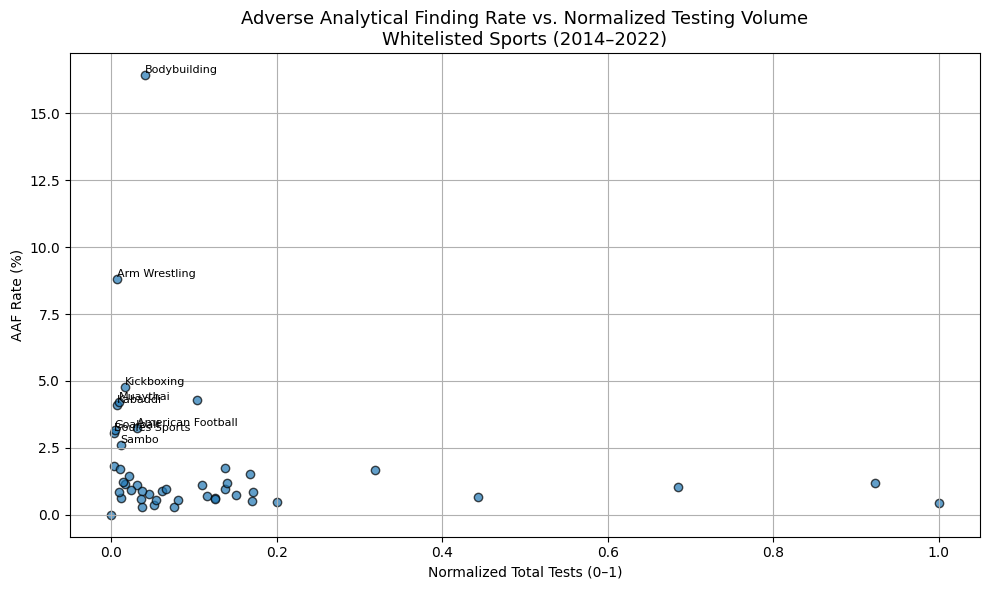

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import numpy as np # Import numpy for handling potential NaNs

# === Assume 'tables' (dictionary of dataframes per year) and 'allowed_sports' are defined ===

# --- Create df_summary_table ---
summary_data_list = []

# Iterate through each year's DataFrame in the 'tables' dictionary
for year, df in tables.items():
    # Ensure numeric conversion and handle potential errors/NaNs
    df = df.apply(pd.to_numeric, errors='ignore')

    # Identify relevant columns
    # Assuming the first column is 'Sport' and the last is 'Sub Total'
    sport_col = df.columns[0]
    total_samples_col = df.columns[-1]

    # Identify AAF columns based on year range (adjust indices as needed based on your data structure)
    # Based on previous cells, AAF columns are typically at index 3, 6, 9, 12, and potentially 14, 15 for 2021/2022
    if int(year) <= 2020:
        # Columns for 2014-2020: Indices 3, 6, 9, 12
        aaf_cols = df.columns[[3, 6, 9, 12]]
    else: # For 2021 and 2022
        # Columns for 2021-2022: Indices 3, 6, 9, 12, 14, 15
        aaf_cols = df.columns[[3, 6, 9, 12, 14, 15]]


    # Ensure AAF columns are numeric, replace NaNs with 0
    for col in aaf_cols:
        if col in df.columns:
             # Convert to numeric, coercing errors to NaN, then fill NaN with 0
            df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)
        else:
            print(f"Warning: AAF column '{col}' not found in year {year}. Skipping.")
            # If a column is genuinely missing, ensure it doesn't cause errors later
            aaf_cols = aaf_cols.drop(col, errors='ignore')


    # Calculate AAF total per sport for the current year
    df['AAF_Total_Year'] = df[aaf_cols].sum(axis=1)

    # Select relevant columns for the summary
    df_year_summary = df[[sport_col, total_samples_col, 'AAF_Total_Year']].copy()
    df_year_summary.columns = ['Sport', 'Total_Tests_Year', 'Total_AAFs_Year'] # Rename for clarity


    # Add year information
    df_year_summary['Year'] = int(year)

    summary_data_list.append(df_year_summary)

# Concatenate all yearly summaries
df_all_years_summary = pd.concat(summary_data_list, ignore_index=True)

# Group by Sport to get the total tests and AAFs across all years (2014-2022)
df_summary_table = df_all_years_summary.groupby('Sport').agg(
    **{'Total Tests (2014–2022)': ('Total_Tests_Year', 'sum'),
       'Total AAFs': ('Total_AAFs_Year', 'sum')}
).reset_index()

# Calculate the AAF Rate (%)
# Avoid division by zero
df_summary_table['AAF Rate (%)'] = (
    (df_summary_table['Total AAFs'] / df_summary_table['Total Tests (2014–2022)']) * 100
).replace([np.inf, -np.inf], np.nan).fillna(0) # Handle potential inf/nan from division by zero

# --- Step 0: Filter to include only whitelist sports from `allowed_sports` ---
# Ensure 'Sport' column exists before filtering
if "Sport" in df_summary_table.columns:
    df_summary_common = df_summary_table[df_summary_table["Sport"].isin(allowed_sports)].copy()
else:
    raise ValueError("df_summary_table does not have a 'Sport' column.")


# --- Step 1: Sanity check ---
# Check if allowed_sports is a set for proper intersection
if not isinstance(allowed_sports, set):
    allowed_sports = set(allowed_sports)

# Check if 'Sport' column exists and is not empty before creating a set from it
if "Sport" in df_summary_table.columns and not df_summary_table["Sport"].empty:
    expected_sport_count = len(allowed_sports & set(df_summary_table["Sport"]))
else:
    expected_sport_count = 0 # Or handle as an error if expected

actual_count = df_summary_common["Sport"].nunique()
# It's possible that some sports in allowed_sports are not in your data at all.
# So the assertion should check if the unique sports in the filtered dataframe
# match the intersection of allowed_sports and the sports actually present in the data.
assert actual_count == expected_sport_count, f"Expected {expected_sport_count} sports in the intersection, got {actual_count} in filtered data."


# --- Step 2: Normalize "Total Tests" on 0–1 scale ---
# Ensure the column exists and is numeric before attempting normalization
if "Total Tests (2014–2022)" in df_summary_common.columns and pd.api.types.is_numeric_dtype(df_summary_common["Total Tests (2014–2022)"]):
     min_tests = df_summary_common["Total Tests (2014–2022)"].min()
     max_tests = df_summary_common["Total Tests (2014–2022)"].max()

     # Avoid division by zero if all tests are the same
     if max_tests - min_tests != 0:
        df_summary_common["Normalized Tests (0–1)"] = (
            (df_summary_common["Total Tests (2014–2022)"] - min_tests) /
            (max_tests - min_tests)
        )
     else:
        # If all values are the same, normalization results in 0 or 1 depending on the value
        df_summary_common["Normalized Tests (0–1)"] = 0.0 if min_tests == 0 else 1.0
else:
    print("Warning: 'Total Tests (2014–2022)' column not found or not numeric. Skipping normalization.")
    # Add a placeholder column if needed for downstream operations
    df_summary_common["Normalized Tests (0–1)"] = np.nan


# --- Step 3: Assign Risk Tiers Based on AAF Rate ---
def classify_risk(rate):
    # Ensure rate is not NaN before comparison
    if pd.isna(rate):
        return "Unknown"
    elif rate >= 2.0:
        return "High"
    elif rate >= 1.0:
        return "Moderate"
    else:
        return "Low"

# Apply the classification, handling potential missing AAF Rate column
if "AAF Rate (%)" in df_summary_common.columns:
     df_summary_common["Risk"] = df_summary_common["AAF Rate (%)"].apply(classify_risk)
else:
    print("Warning: 'AAF Rate (%)' column not found. Cannot assign risk tiers.")
    df_summary_common["Risk"] = "Unknown" # Add a placeholder column

# Optional: flag high-risk, low-volume sports for annotation (visualization only)
high_rate_threshold = 2.0
low_test_threshold = 20000
# Ensure required columns exist before applying flag logic
if all(col in df_summary_common.columns for col in ["AAF Rate (%)", "Total Tests (2014–2022)"]):
    df_summary_common["Flag"] = df_summary_common.apply(
        lambda row: "⚠️" if (row["AAF Rate (%)"] >= high_rate_threshold and row["Total Tests (2014–2022)"] <= low_test_threshold) else "",
        axis=1
    )
else:
    print("Warning: Missing columns for flagging (AAF Rate (%) or Total Tests). Skipping flagging.")
    df_summary_common["Flag"] = ""


# --- Step 4: Sort and display by AAF Rate ---
# Ensure 'AAF Rate (%)' exists before sorting
if "AAF Rate (%)" in df_summary_common.columns:
    df_sorted_common = df_summary_common.sort_values(by="AAF Rate (%)", ascending=False)
else:
    print("Warning: 'AAF Rate (%)' column not found. Displaying unsorted summary.")
    df_sorted_common = df_summary_common


display(Markdown(f"### Table: {actual_count} Whitelisted Sports Sorted by AAF Rate (%)"))
# Select columns to display, ensure they exist
display_cols = [col for col in ["Sport", "Total Tests (2014–2022)", "Total AAFs", "AAF Rate (%)", "Risk"] if col in df_sorted_common.columns]
display(df_sorted_common[display_cols].reset_index(drop=True))


# --- Step 5: Plot AAF Rate vs Normalized Test Volume ---
# Ensure required columns exist for plotting
if all(col in df_summary_common.columns for col in ["Normalized Tests (0–1)", "AAF Rate (%)"]):
    plt.figure(figsize=(10, 6))
    plt.scatter(
        df_summary_common["Normalized Tests (0–1)"],
        df_summary_common["AAF Rate (%)"],
        alpha=0.7,
        edgecolor='k'
    )

    # Annotate flagged sports - ensure 'Flag' column exists
    if "Flag" in df_summary_common.columns:
        for _, row in df_summary_common[df_summary_common["Flag"] == "⚠️"].iterrows():
            plt.text(
                row["Normalized Tests (0–1)"],
                row["AAF Rate (%)"],
                row["Sport"],
                fontsize=8,
                ha='left',
                va='bottom'
            )

    plt.title("Adverse Analytical Finding Rate vs. Normalized Testing Volume\nWhitelisted Sports (2014–2022)", fontsize=13)
    plt.xlabel("Normalized Total Tests (0–1)")
    plt.ylabel("AAF Rate (%)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Warning: Missing columns for plotting (Normalized Tests (0–1) or AAF Rate (%)). Skipping scatter plot.")

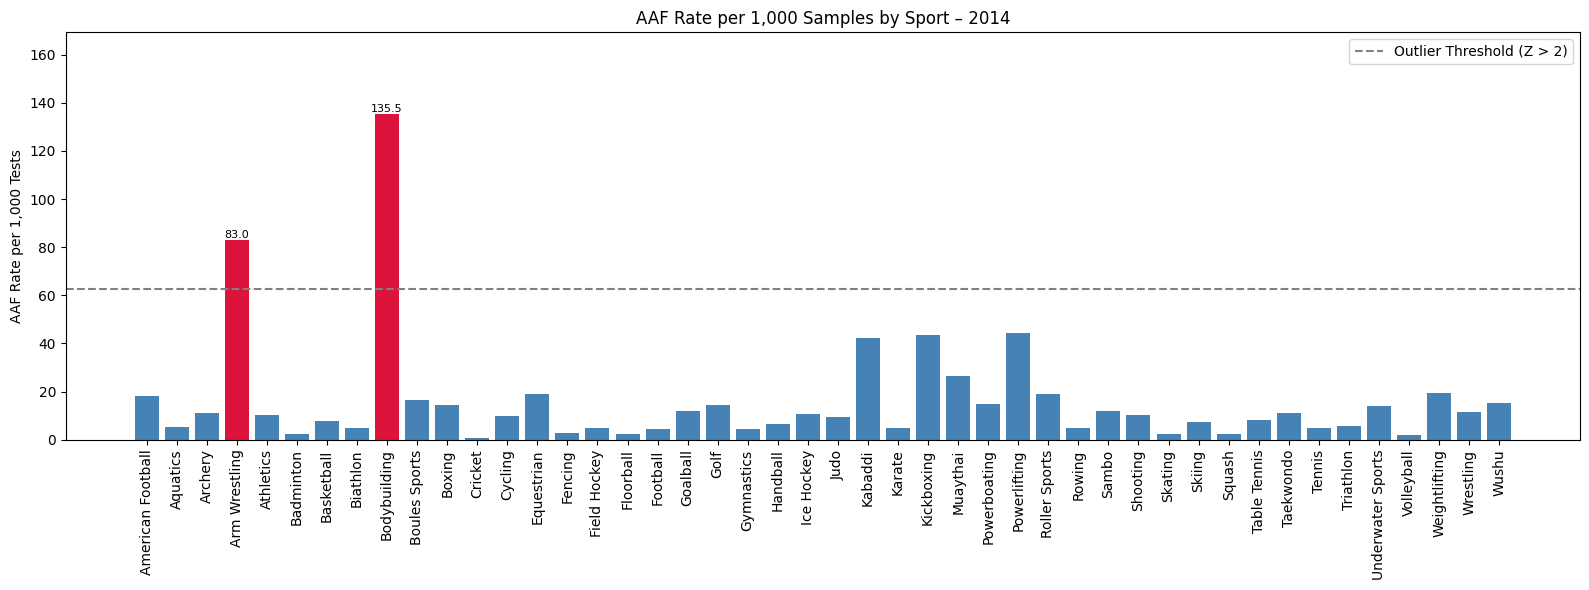

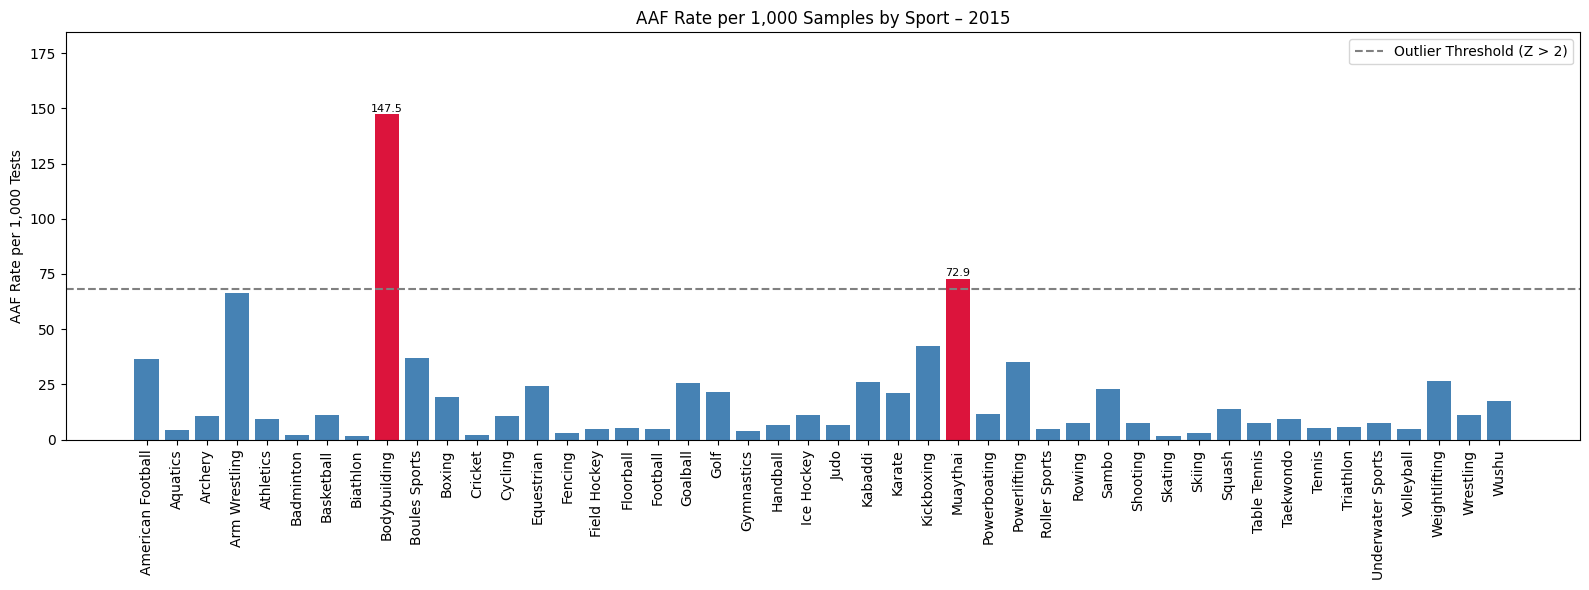

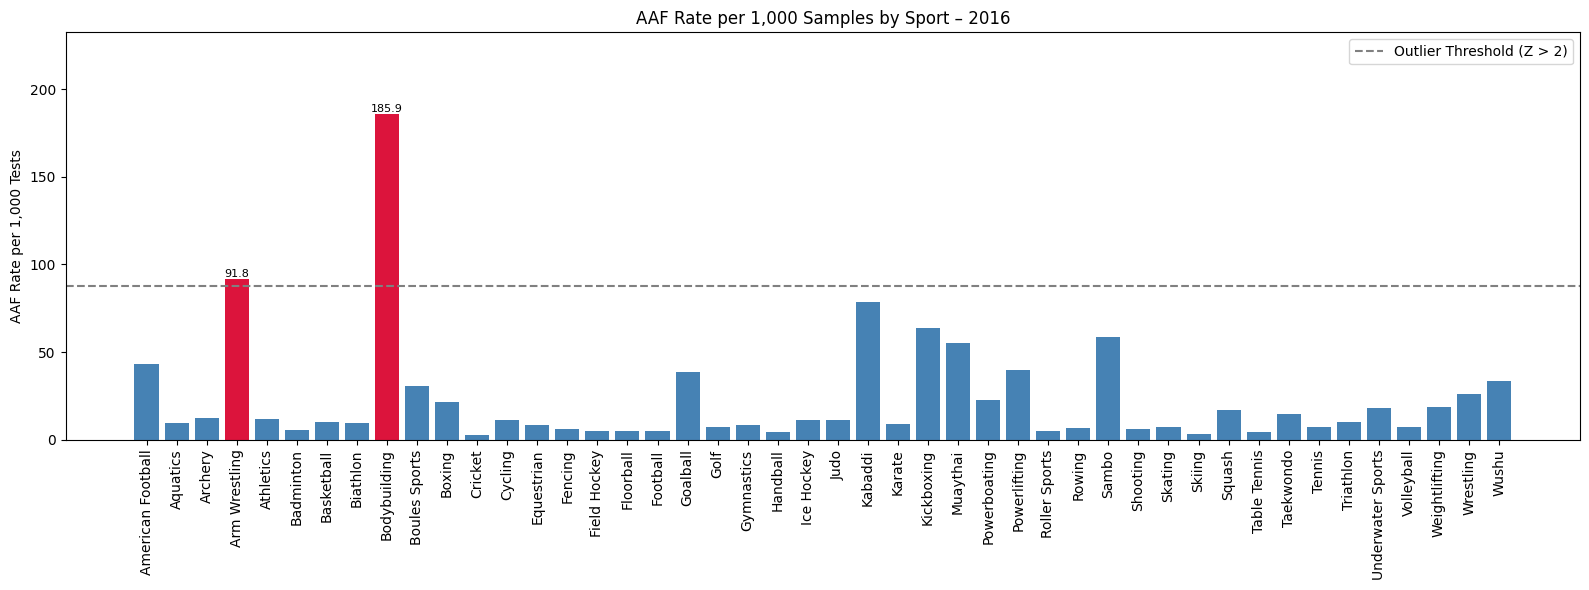

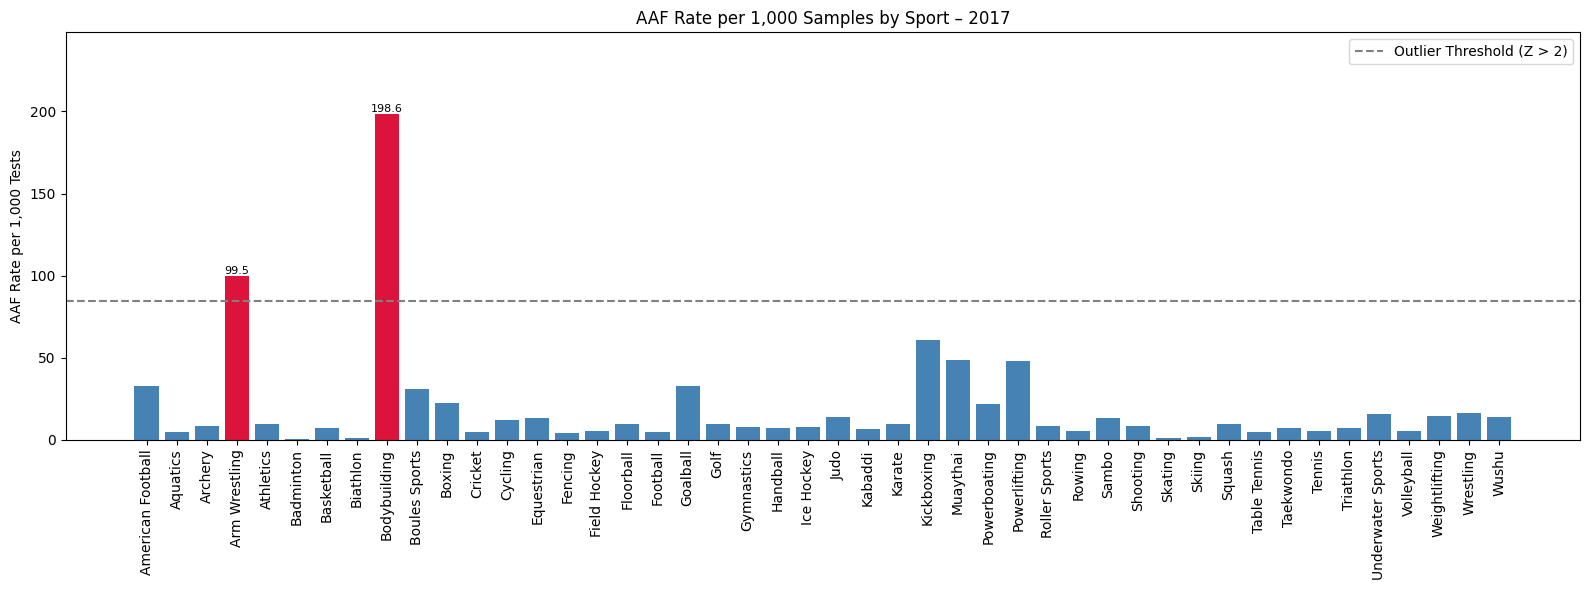

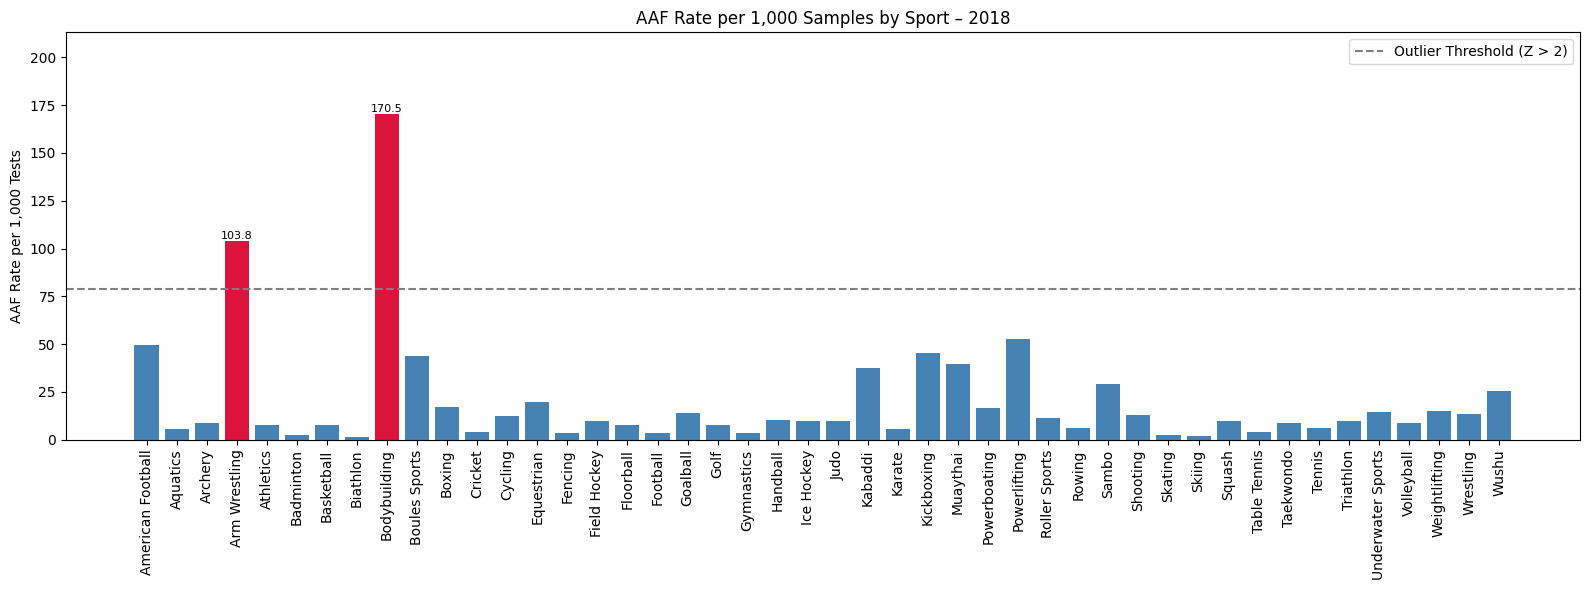

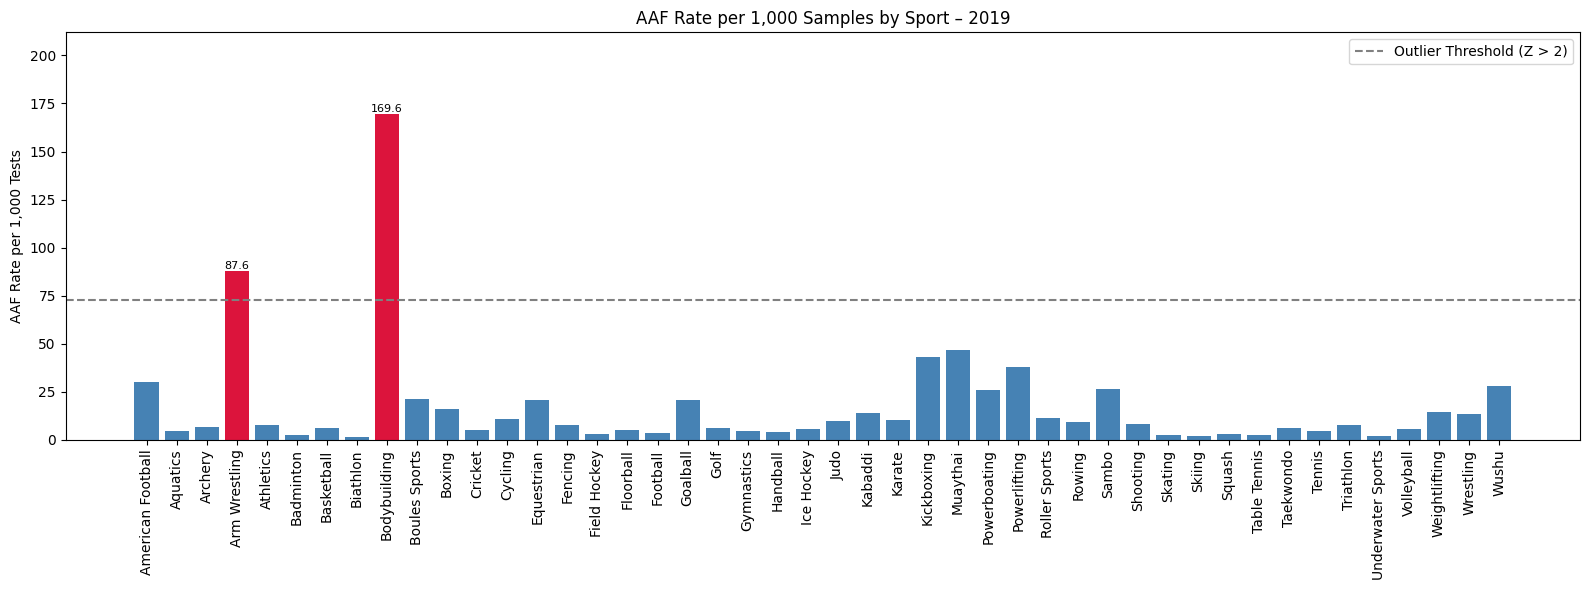

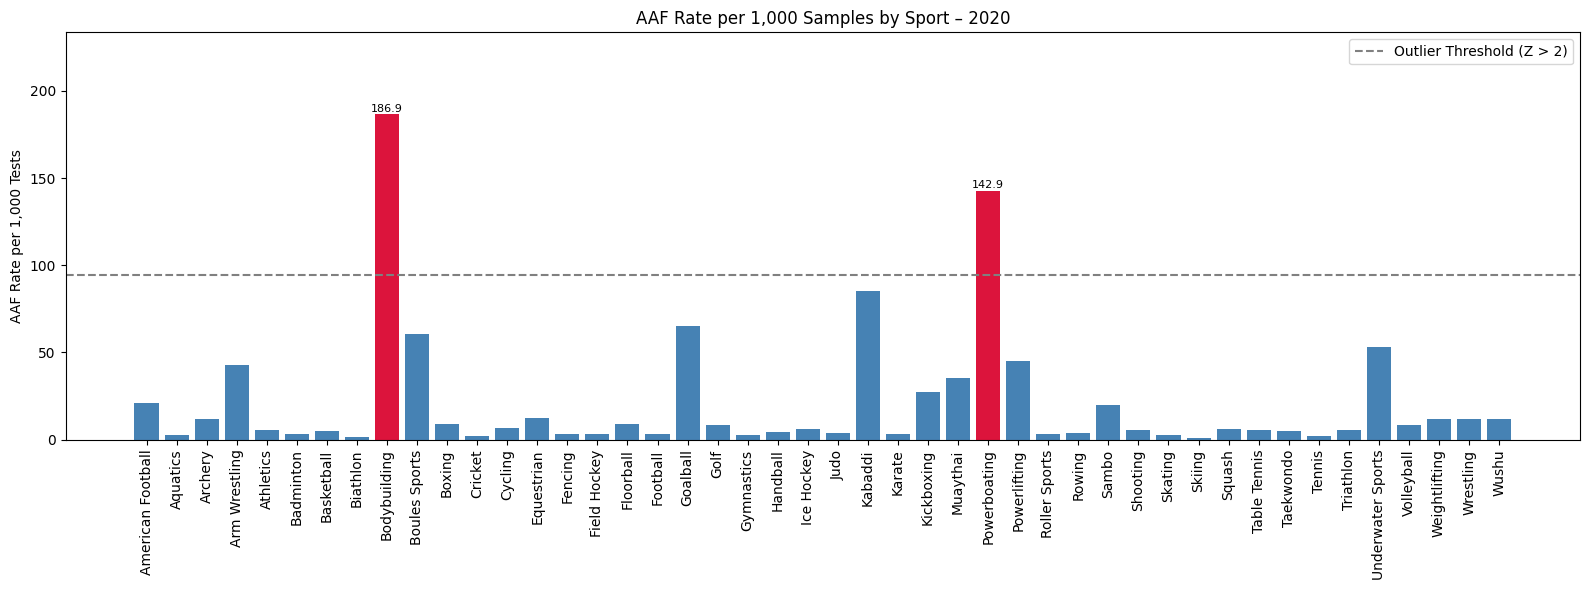

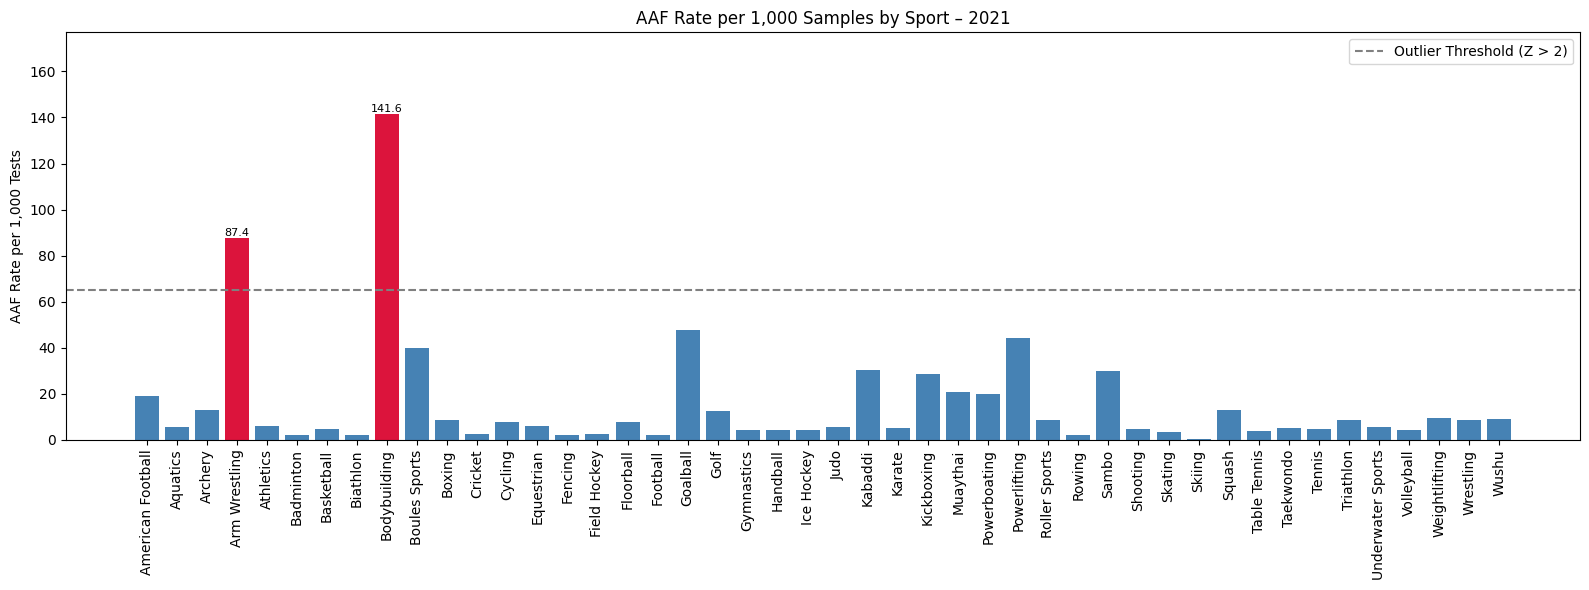

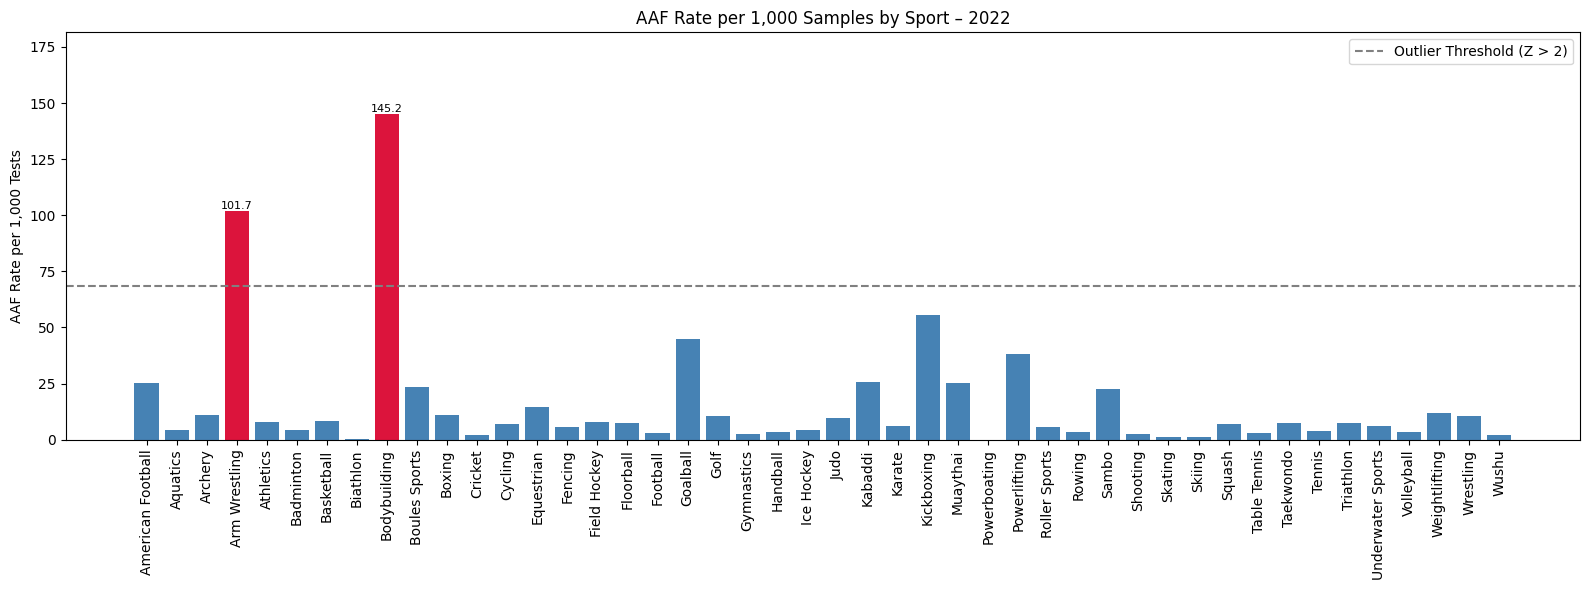

In [10]:
import matplotlib.pyplot as plt

# --- Build df_aaf_rate ---
aaf_rate_data = []

for year, df in tables.items():
    year = int(year)
    sport_col = df.columns[0]
    total_col = df.columns[-1]

    if year <= 2020:
        aaf_cols = [df.columns[3], df.columns[6], df.columns[9], df.columns[12]]
    else:
        aaf_cols = [df.columns[3], df.columns[6], df.columns[9], df.columns[12], df.columns[14], df.columns[14]]

    for _, row in df.iterrows():
        total_samples = row[total_col]
        aaf_total = row[aaf_cols].sum()
        aaf_rate = (aaf_total / total_samples) * 1000 if total_samples > 0 else 0

        aaf_rate_data.append({
            'Year': year,
            'Sport': row[sport_col],
            'AAF_Rate_per_1000': aaf_rate
        })

df_aaf_rate = pd.DataFrame(aaf_rate_data)

# --- Filter and prepare data ---
df_common = df_aaf_rate[df_aaf_rate['Sport'].isin(sports_in_all_years)]
sports_sorted = sorted(df_common['Sport'].unique())

# --- Plot per year with outlier highlights ---
for year in sorted(df_common['Year'].unique()):
    df_year = df_common[df_common['Year'] == year].set_index('Sport')
    df_year = df_year.reindex(sports_sorted).fillna(0)

    # Calculate stats
    mean = df_year['AAF_Rate_per_1000'].mean()
    std = df_year['AAF_Rate_per_1000'].std()
    threshold = mean + 2 * std

    # Mark colors
    colors = ['crimson' if val > threshold else 'steelblue' for val in df_year['AAF_Rate_per_1000']]

    # Plot
    x = range(len(sports_sorted))
    plt.figure(figsize=(16, 6))
    bars = plt.bar(x, df_year['AAF_Rate_per_1000'], color=colors)

    # Add labels to outliers
    for i, val in enumerate(df_year['AAF_Rate_per_1000']):
        if val > threshold:
            plt.text(i, val + 0.1, f'{val:.1f}', ha='center', va='bottom', fontsize=8, color='black')

    plt.xticks(x, sports_sorted, rotation=90)
    plt.ylabel('AAF Rate per 1,000 Tests')
    plt.title(f'AAF Rate per 1,000 Samples by Sport – {year}')
    plt.axhline(threshold, color='gray', linestyle='--', label='Outlier Threshold (Z > 2)')
    plt.ylim(0, max(1, df_year['AAF_Rate_per_1000'].max() * 1.25))
    plt.legend()
    plt.tight_layout()
    plt.show()


In [11]:
from IPython.display import display, HTML

# Build matrix of Z > 2 outliers
df_common = df_aaf_rate[df_aaf_rate['Sport'].isin(sports_in_all_years)]

outlier_records = []

for year in sorted(df_common['Year'].unique()):
    df_year = df_common[df_common['Year'] == year].copy()
    mean = df_year['AAF_Rate_per_1000'].mean()
    std = df_year['AAF_Rate_per_1000'].std()

    df_year['Z_Score'] = (df_year['AAF_Rate_per_1000'] - mean) / std

    for _, row in df_year.iterrows():
        if row['Z_Score'] > 2:
            outlier_records.append({
                'Year': row['Year'],
                'Sport': row['Sport'],
                'AAF_Rate_per_1000': row['AAF_Rate_per_1000']
            })

# Pivot and clean
df_outlier_matrix = pd.DataFrame(outlier_records)
df_outlier_matrix = df_outlier_matrix.pivot(index='Sport', columns='Year', values='AAF_Rate_per_1000')
df_outlier_matrix_clean = df_outlier_matrix.fillna('')

# Display with title
display(HTML("<h3>📊 Outlier Matrix: AAF Rate per 1,000 (Z-Score > 2)</h3>"))
df_outlier_matrix_clean




Year                 2014        2015        2016        2017        2018  \
Sport                                                                       
Arm Wrestling   83.044983               91.836735    99.47644  103.773585   
Bodybuilding   135.456017  147.515528  185.942492  198.577356  170.491803   
Muaythai                    72.916667                                       
Powerboating                                                                

Year                 2019        2020        2021        2022  
Sport                                                          
Arm Wrestling   87.591241               87.431694  101.694915  
Bodybuilding   169.632266  186.893204  141.605839  145.211123  
Muaythai                                                       
Powerboating               142.857143

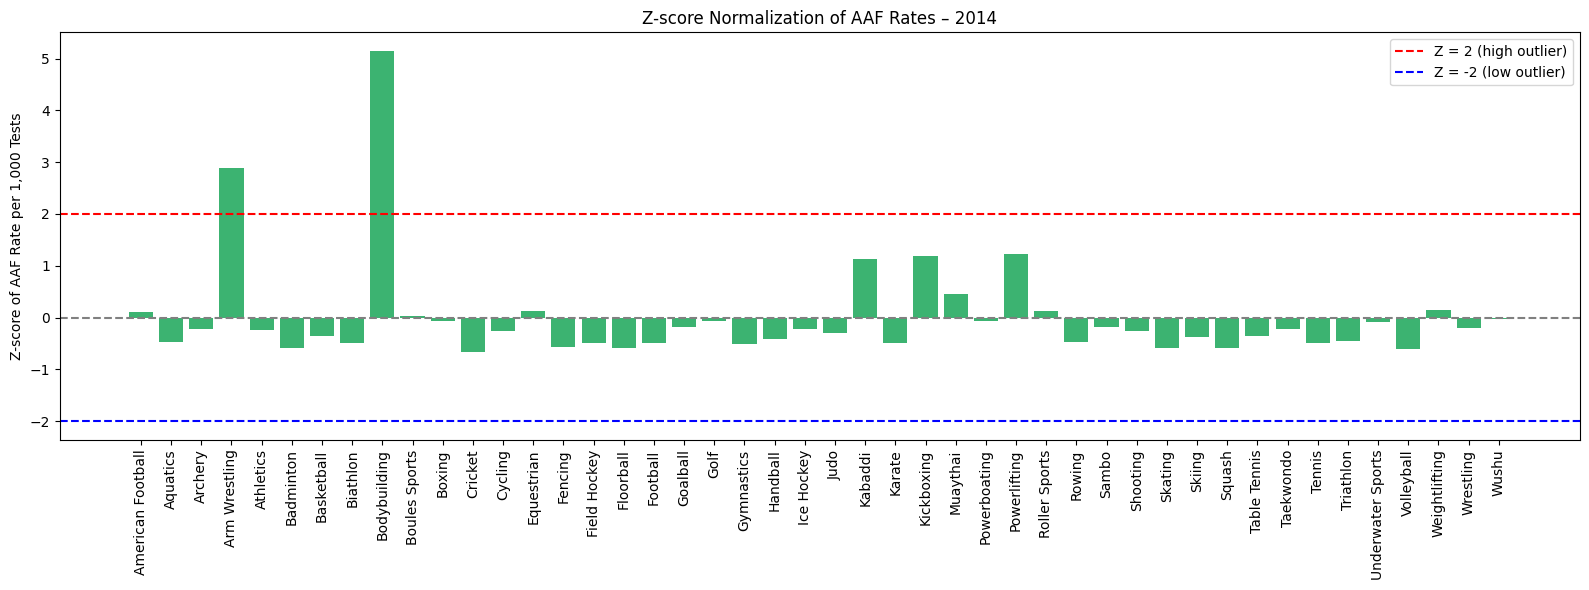

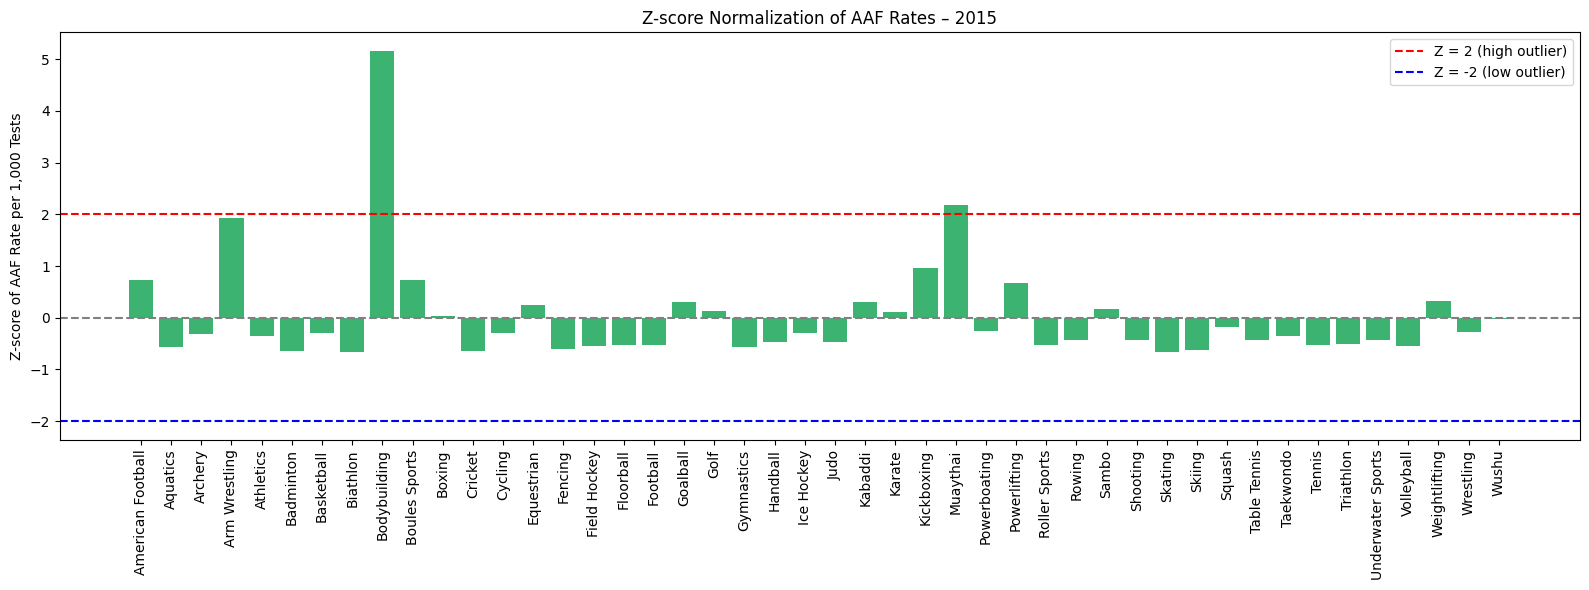

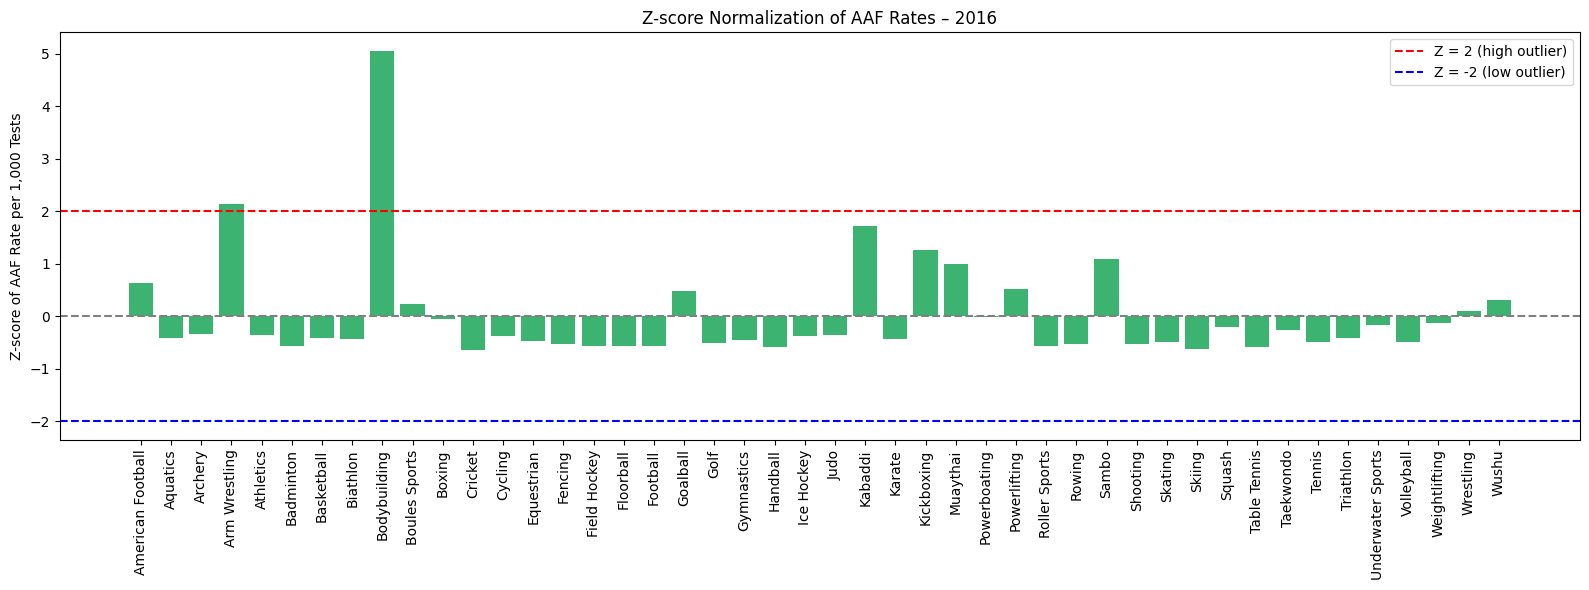

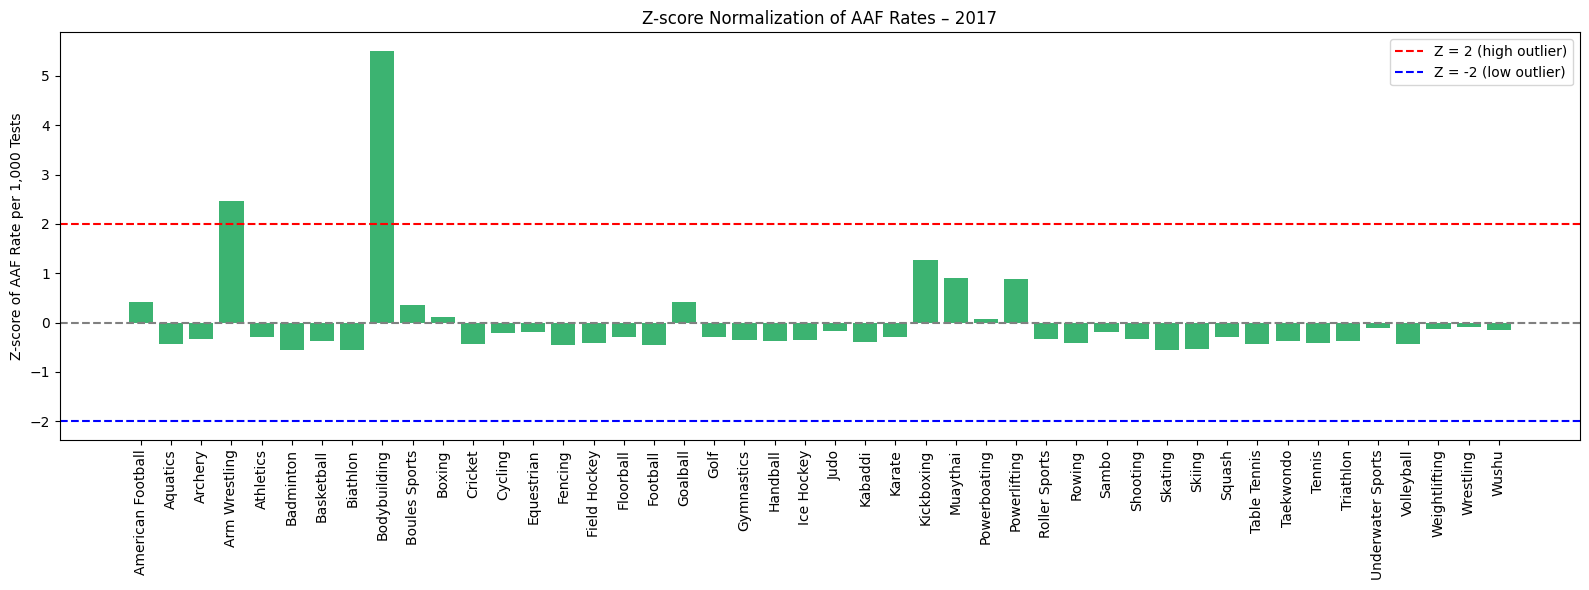

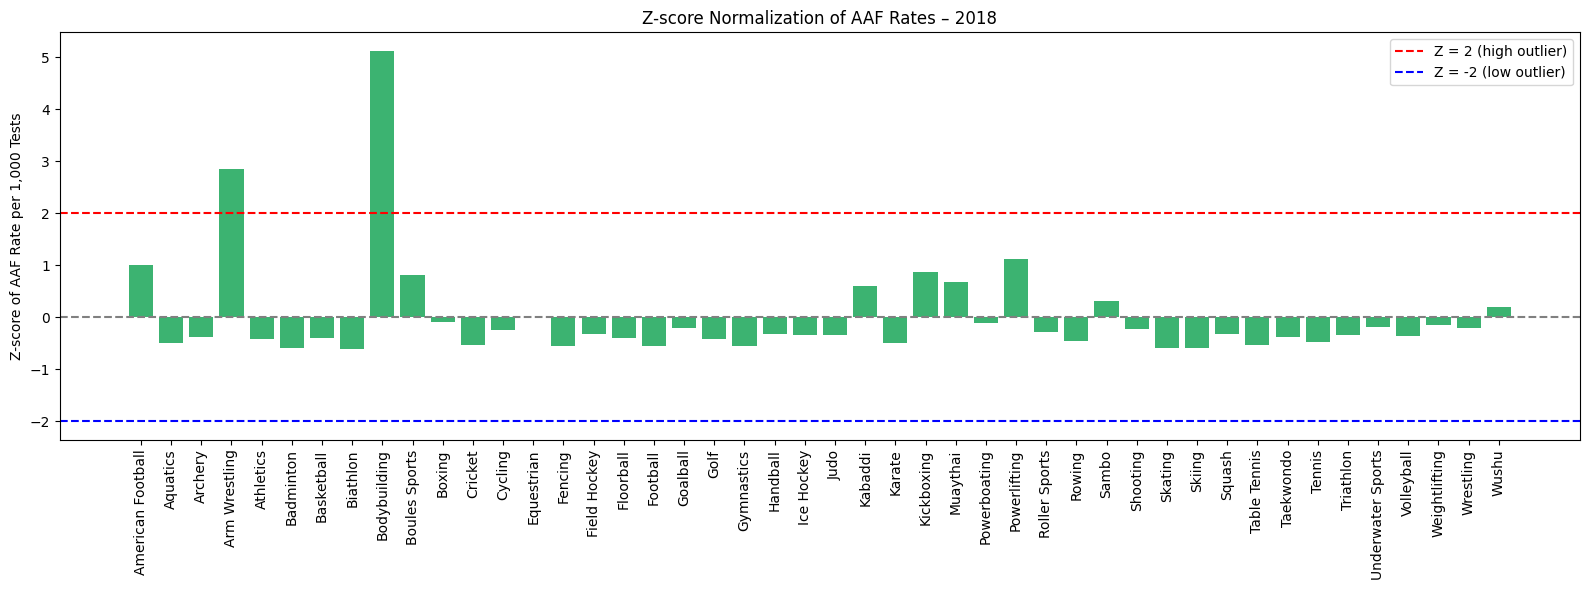

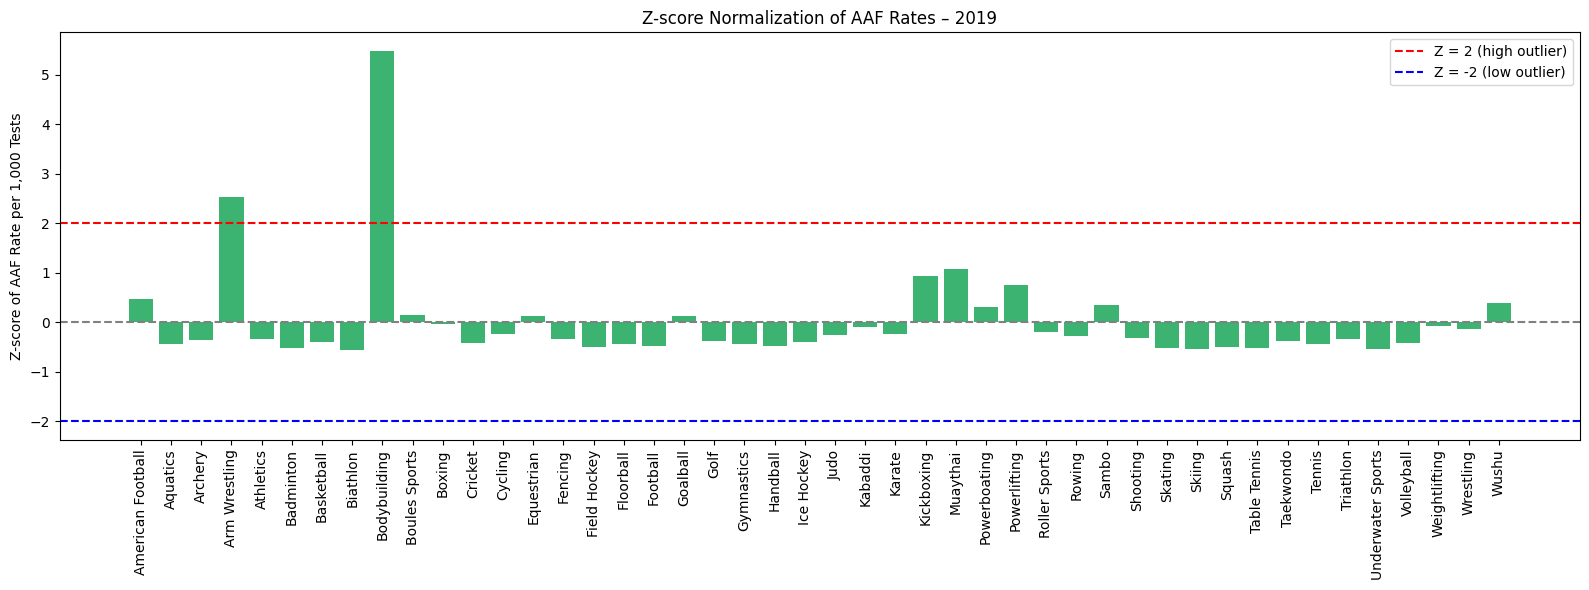

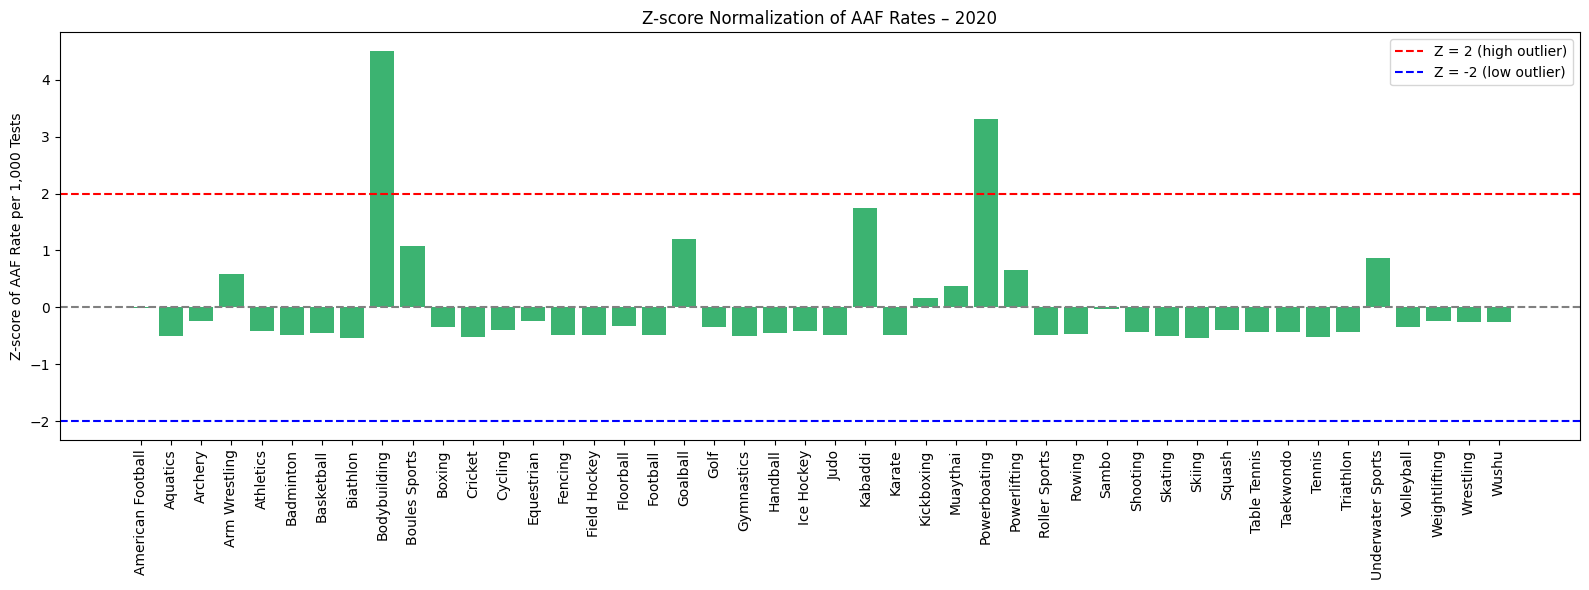

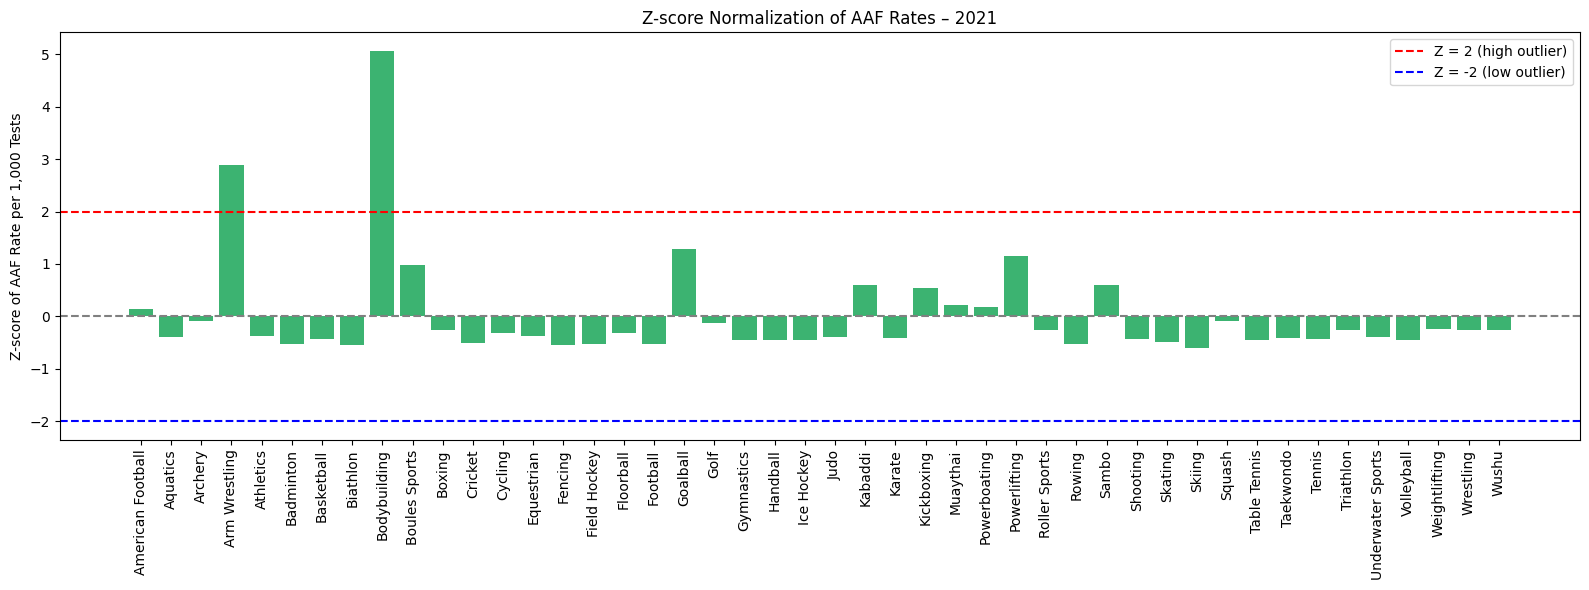

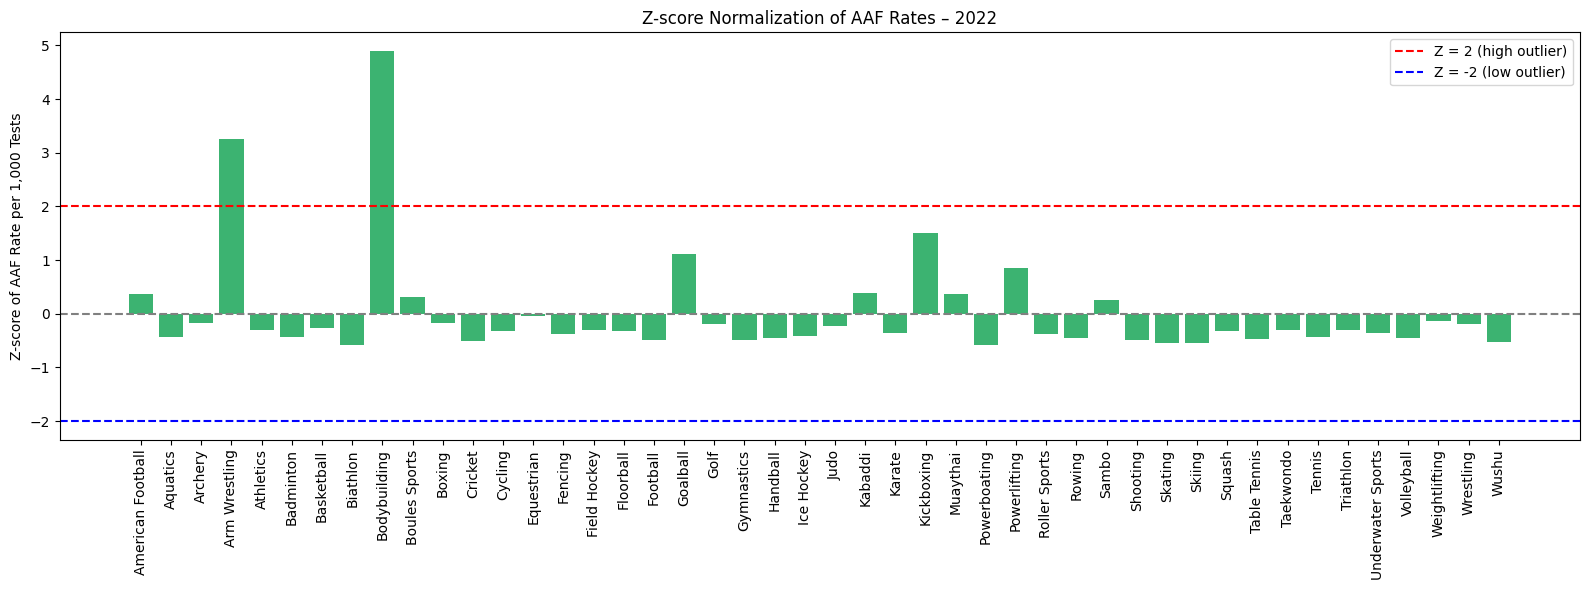

In [12]:
import matplotlib.pyplot as plt

# Container for Z-score data
zscore_data = []

# Loop through years
for year in sorted(df_common['Year'].unique()):
    df_year = df_common[df_common['Year'] == year].copy()

    # Calculate Z-scores for AAF rates
    mean_aaf = df_year['AAF_Rate_per_1000'].mean()
    std_aaf = df_year['AAF_Rate_per_1000'].std()

    # Avoid divide-by-zero
    if std_aaf == 0:
        df_year['Z_Score'] = 0
    else:
        df_year['Z_Score'] = (df_year['AAF_Rate_per_1000'] - mean_aaf) / std_aaf

    # Add to overall list
    for _, row in df_year.iterrows():
        zscore_data.append({
            'Year': year,
            'Sport': row['Sport'],
            'Z_Score': row['Z_Score']
        })

# Convert to DataFrame
df_zscores = pd.DataFrame(zscore_data)

# Sort sports consistently
sports_sorted = sorted(df_zscores['Sport'].unique())

# Plot
for year in sorted(df_zscores['Year'].unique()):
    df_year = df_zscores[df_zscores['Year'] == year].set_index('Sport')
    df_year = df_year.reindex(sports_sorted).fillna(0)

    x = range(len(sports_sorted))

    plt.figure(figsize=(16, 6))
    plt.bar(x, df_year['Z_Score'], color='mediumseagreen')

    plt.axhline(0, color='gray', linestyle='--')
    plt.axhline(2, color='red', linestyle='--', label='Z = 2 (high outlier)')
    plt.axhline(-2, color='blue', linestyle='--', label='Z = -2 (low outlier)')

    plt.xticks(x, sports_sorted, rotation=90)
    plt.ylabel('Z-score of AAF Rate per 1,000 Tests')
    plt.title(f'Z-score Normalization of AAF Rates – {year}')
    plt.legend()
    plt.tight_layout()
    plt.show()


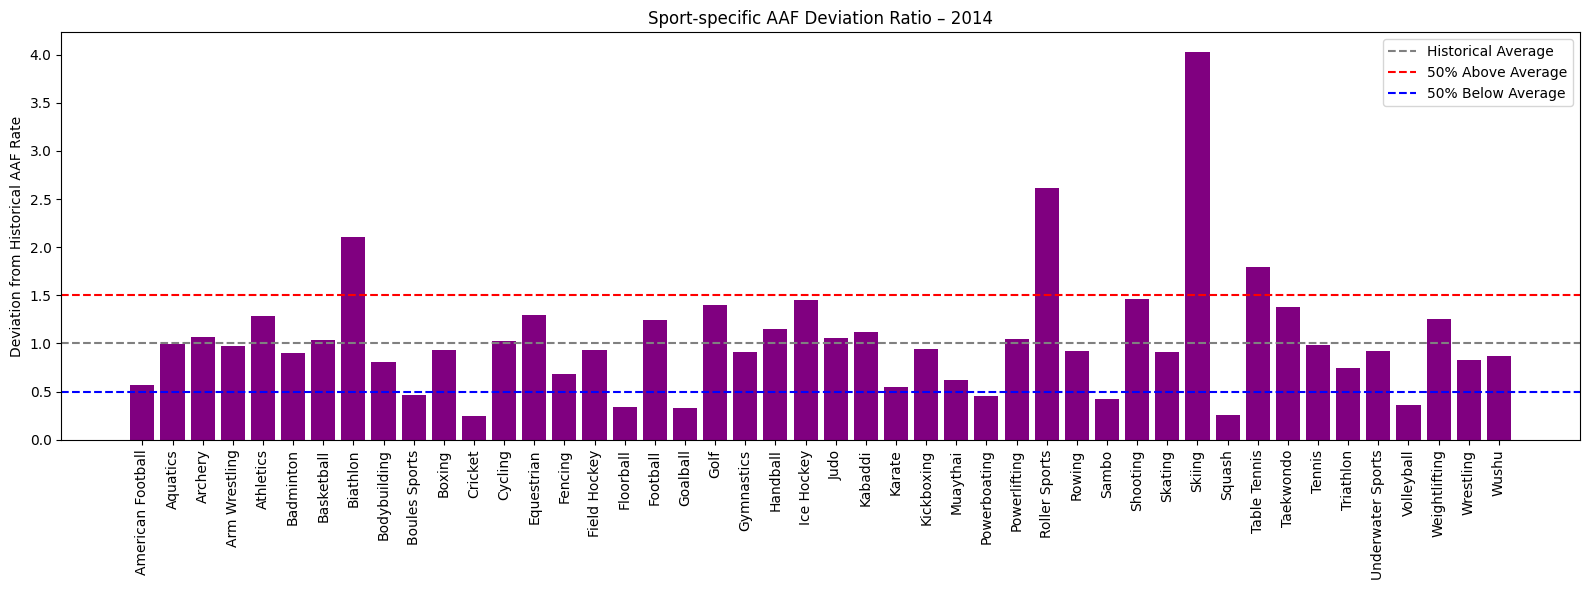

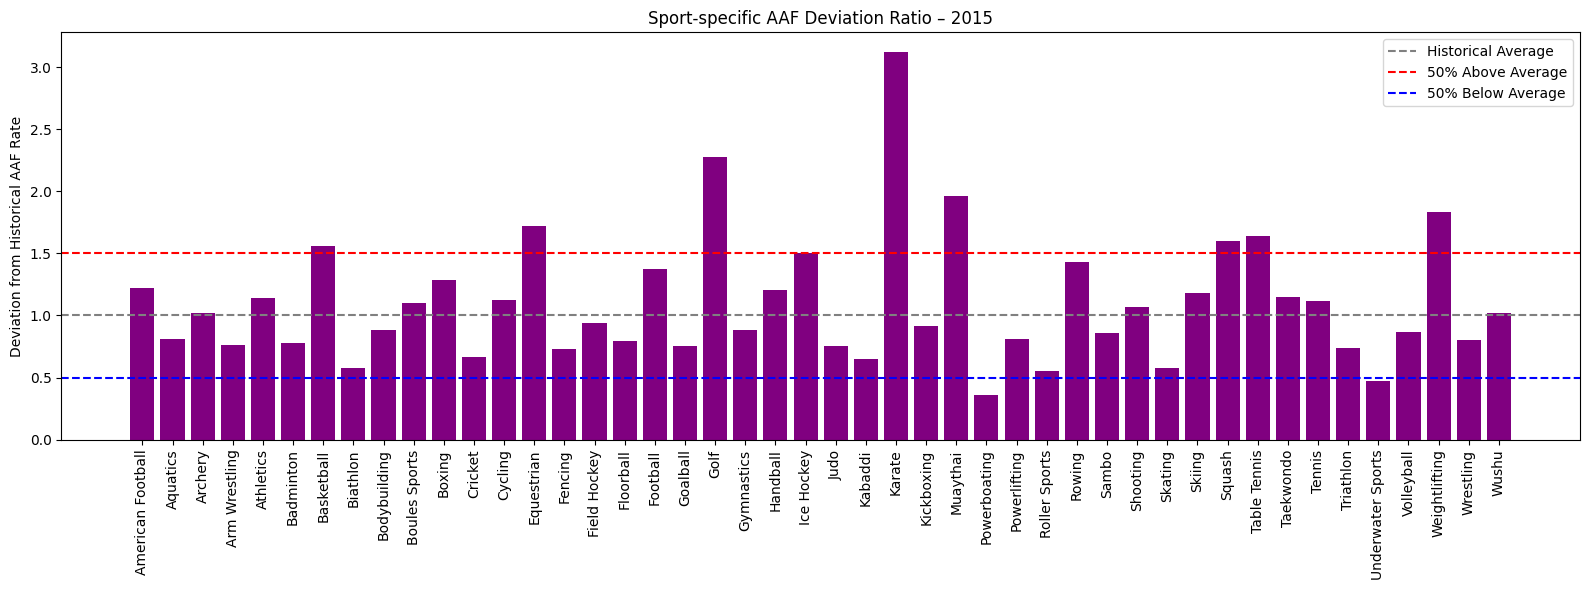

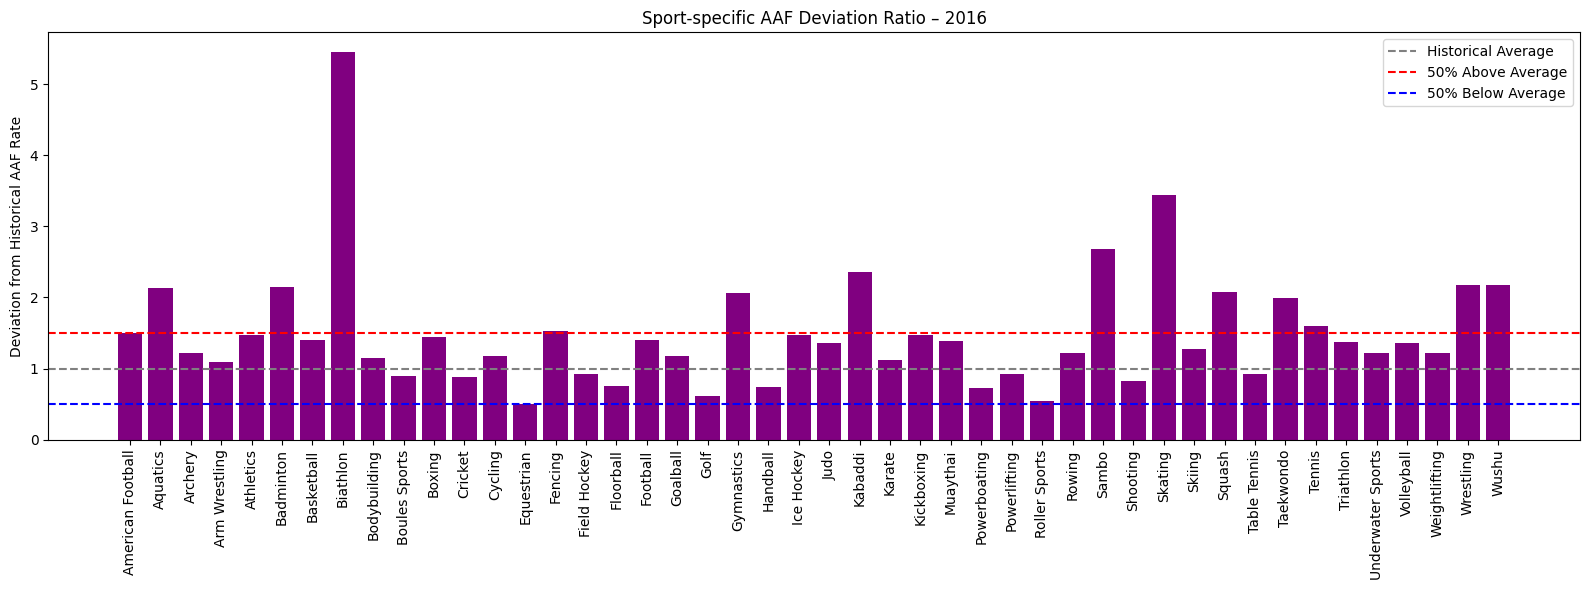

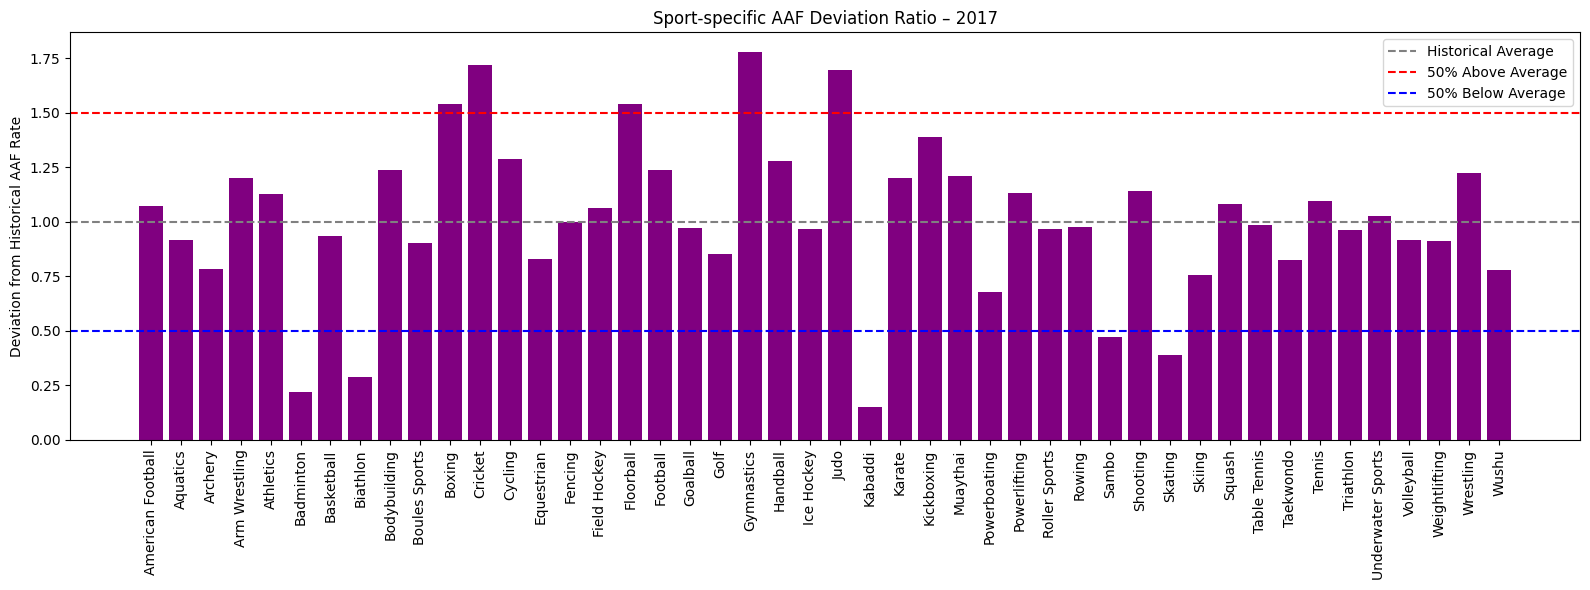

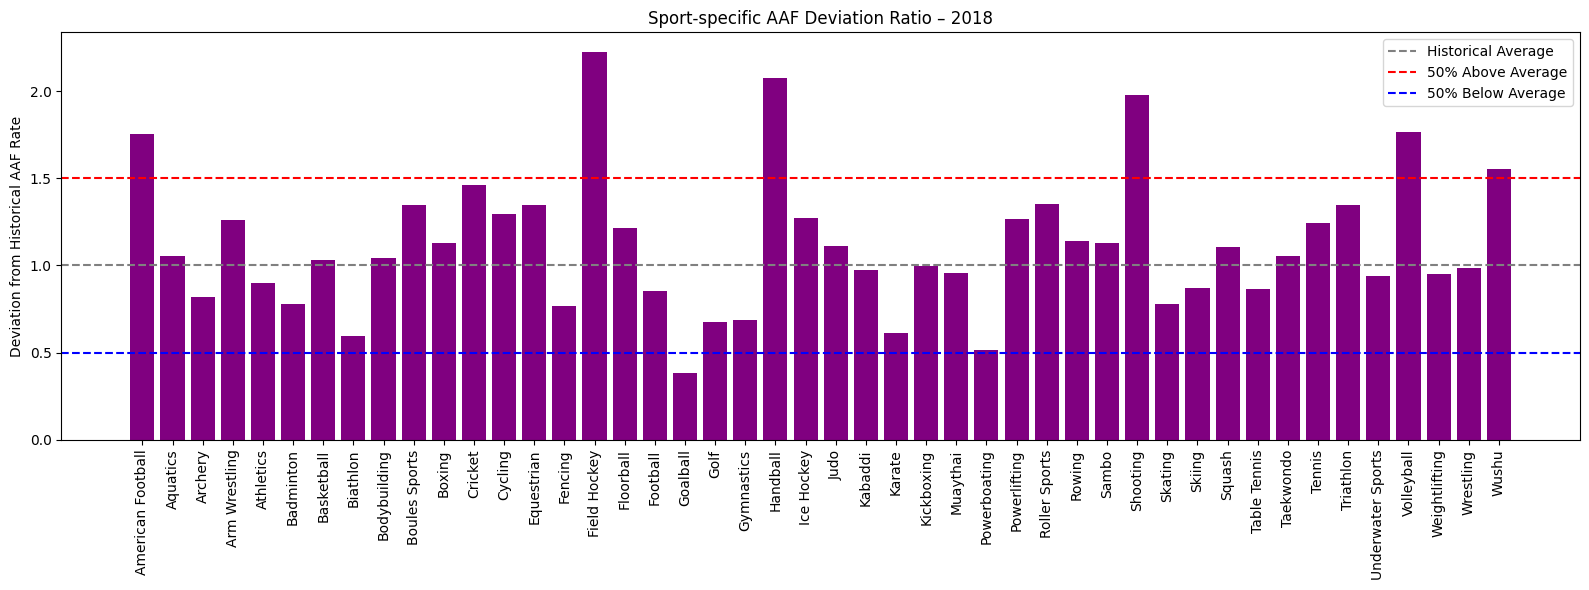

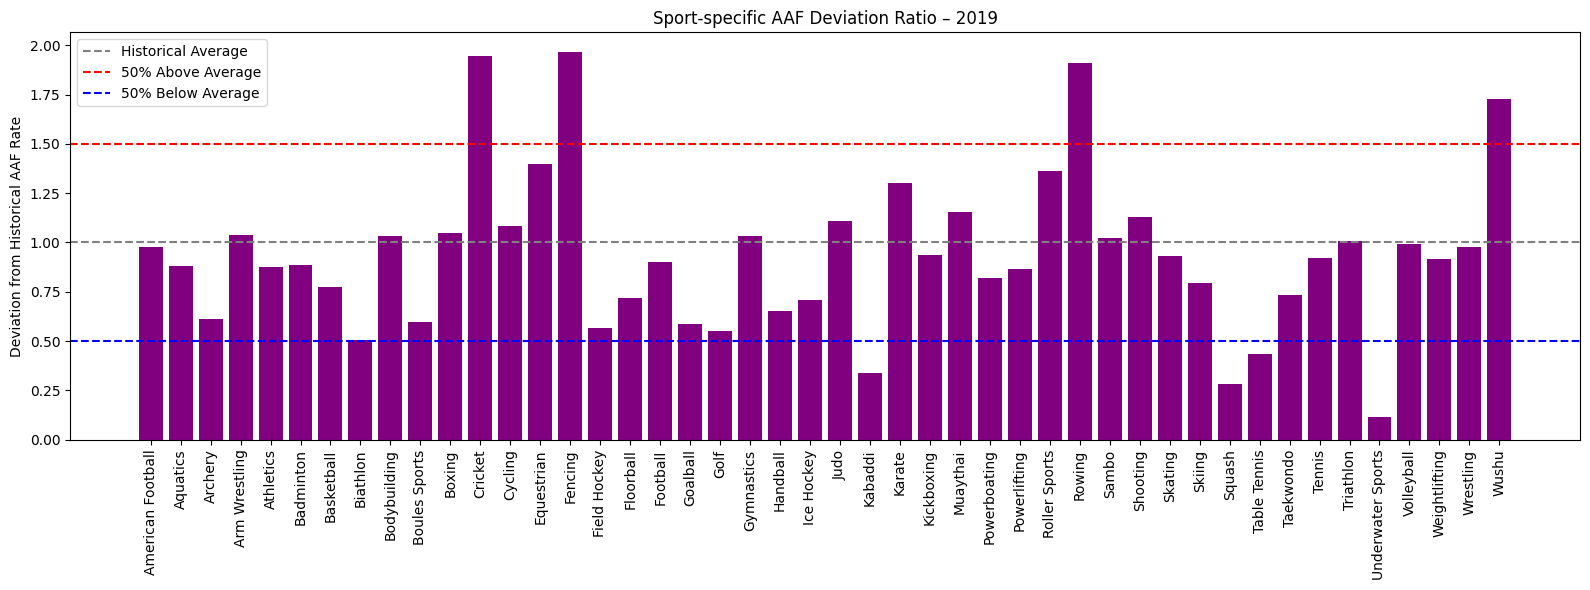

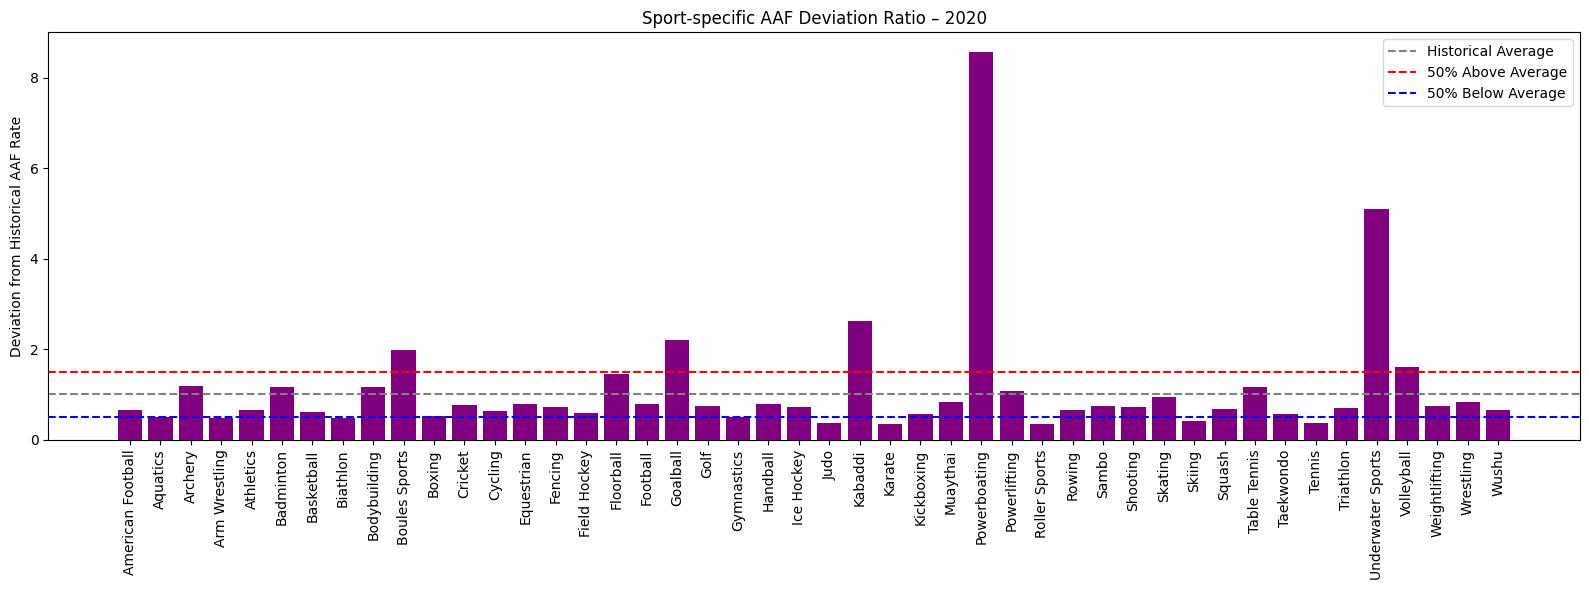

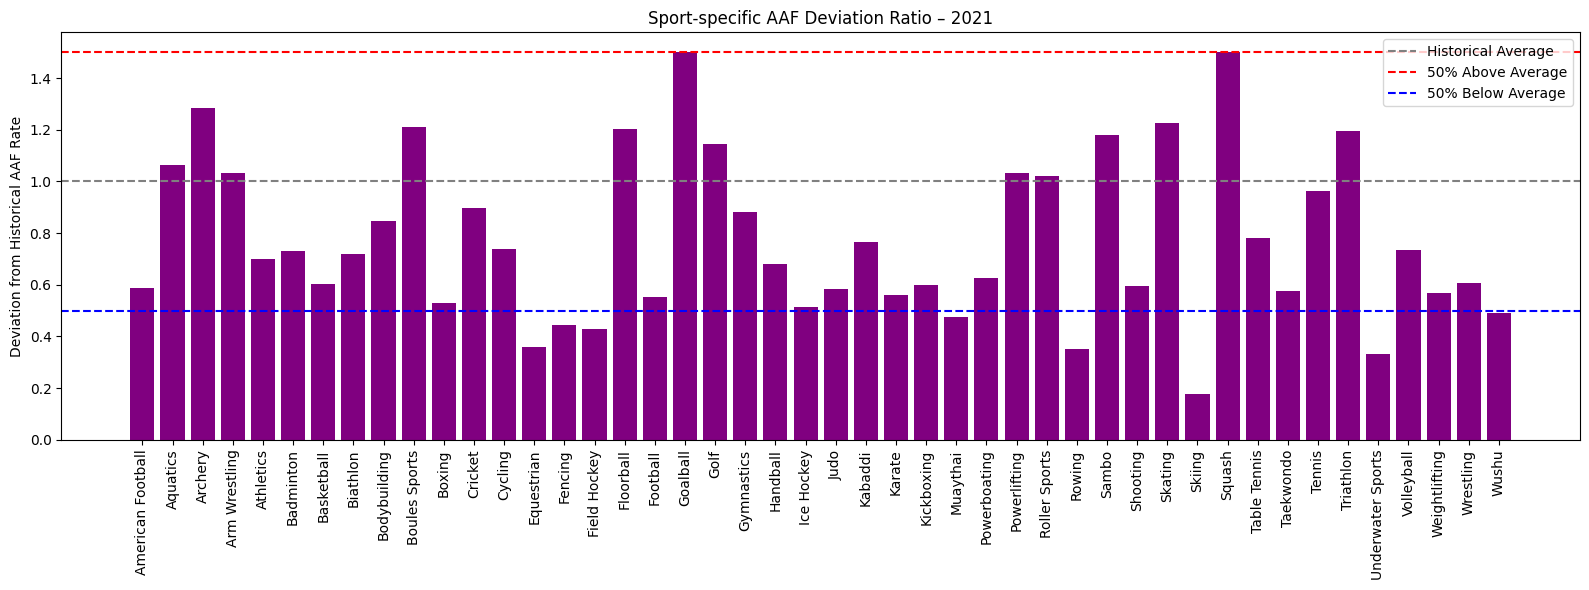

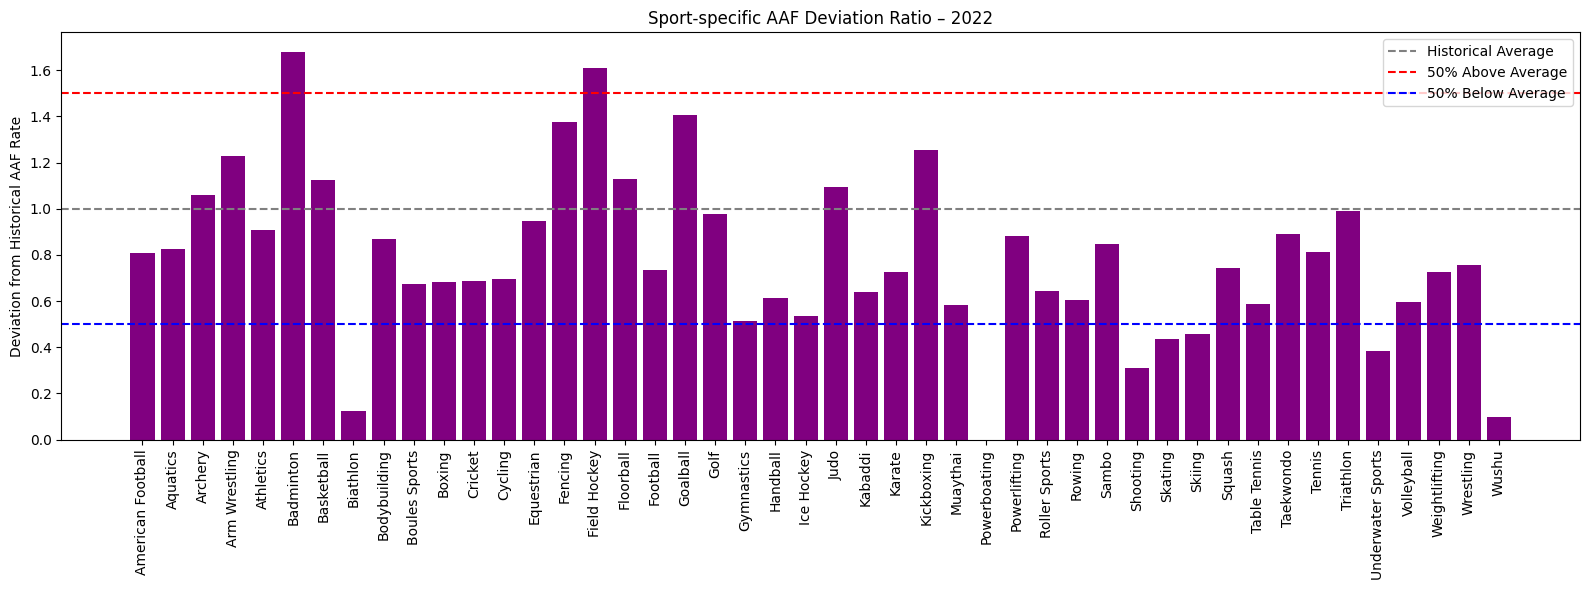

In [13]:
# Container for deviation ratio data
benchmark_data = []

# Reuse your per-sport per-year AAF rate DataFrame
df_aaf_rate = pd.DataFrame(aaf_rate_data)

# Filter to sports in all years (for consistency)
df_common = df_aaf_rate[df_aaf_rate['Sport'].isin(sports_in_all_years)]

# Compute deviation ratio per sport-year
for year in sorted(df_common['Year'].unique()):
    df_year = df_common[df_common['Year'] == year]

    for _, row in df_year.iterrows():
        sport = row['Sport']
        current_rate = row['AAF_Rate_per_1000']

        # Historical average EXCLUDING current year
        historical_rates = df_common[(df_common['Sport'] == sport) & (df_common['Year'] != year)]['AAF_Rate_per_1000']

        if len(historical_rates) > 0 and historical_rates.mean() > 0:
            deviation_ratio = current_rate / historical_rates.mean()
        else:
            deviation_ratio = float('nan')  # cannot compute

        benchmark_data.append({
            'Year': year,
            'Sport': sport,
            'Deviation_Ratio': deviation_ratio
        })

# Create DataFrame
df_benchmark = pd.DataFrame(benchmark_data)

# Sort sports consistently
sports_sorted = sorted(df_benchmark['Sport'].unique())

# Plot
for year in sorted(df_benchmark['Year'].unique()):
    df_year = df_benchmark[df_benchmark['Year'] == year].set_index('Sport')
    df_year = df_year.reindex(sports_sorted).fillna(0)

    x = range(len(sports_sorted))

    plt.figure(figsize=(16, 6))
    plt.bar(x, df_year['Deviation_Ratio'], color='purple')

    plt.axhline(1, color='gray', linestyle='--', label='Historical Average')
    plt.axhline(1.5, color='red', linestyle='--', label='50% Above Average')
    plt.axhline(0.5, color='blue', linestyle='--', label='50% Below Average')

    plt.xticks(x, sports_sorted, rotation=90)
    plt.ylabel('Deviation from Historical AAF Rate')
    plt.title(f'Sport-specific AAF Deviation Ratio – {year}')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [14]:
import plotly.graph_objects as go
import pandas as pd

sample_data = []
for year, df in tables.items():
    sport_col = df.columns[0]
    total_col = df.columns[-1]
    for _, row in df.iterrows():
        sample_data.append({
            'Year': int(year),
            'Sport': row[sport_col],
            'Total_Samples': row[total_col]
        })
df_samples = pd.DataFrame(sample_data)

# --- PREPARE combined data: Z-Score vs All Sports, Z-Score vs Own History, Normalized Samples ---
combined_data = []

# Filter and merge total samples with AAF rates
df_samples_filtered = df_samples[df_samples['Sport'].isin(sports_in_all_years)]
df_all = df_aaf_rate[df_aaf_rate['Sport'].isin(sports_in_all_years)].copy()
df_all = df_all.merge(df_samples_filtered, on=['Year', 'Sport'], how='left')

for year in sorted(df_all['Year'].unique()):
    df_year = df_all[df_all['Year'] == year].copy()

    mean_rate_all = df_year['AAF_Rate_per_1000'].mean()
    std_rate_all = df_year['AAF_Rate_per_1000'].std()

    for _, row in df_year.iterrows():
        sport = row['Sport']
        rate = row['AAF_Rate_per_1000']
        total = row['Total_Samples']

        # Normalize sample count
        max_samples = df_all[df_all['Sport'] == sport]['Total_Samples'].max()
        normalized_samples = total / max_samples if max_samples > 0 else 0

        # Z-score relative to all sports in same year
        z_all = (rate - mean_rate_all) / std_rate_all if std_rate_all > 0 else 0

        # Z-score relative to own sport's history (excluding current year)
        hist = df_all[(df_all['Sport'] == sport) & (df_all['Year'] != year)]
        if not hist.empty:
            mean_hist = hist['AAF_Rate_per_1000'].mean()
            std_hist = hist['AAF_Rate_per_1000'].std()
            z_self = (rate - mean_hist) / std_hist if std_hist > 0 else 0
        else:
            z_self = float('nan')

        combined_data.append({
            'Year': year,
            'Sport': sport,
            'Z_Score_All_Sports': z_all,
            'Z_Score_Own_History': z_self,
            'Normalized_Samples': normalized_samples
        })

df_combined = pd.DataFrame(combined_data)


# Sort sports
sports = sorted(df_combined['Sport'].unique())
years = sorted(df_combined['Year'].unique())

# --- BUILD PLOTLY FIGURE ---
fig = go.Figure()

# Add 3 traces per sport: Z-Score (Own History), Z-Score (All Sports), Normalized Samples
for sport in sports:
    df_sport = df_combined[df_combined['Sport'] == sport]

    fig.add_trace(go.Scatter(
        x=df_sport['Year'],
        y=df_sport['Z_Score_Own_History'],
        mode='lines+markers',
        name=f'{sport} – Z-score (Own History)',
        visible=False,
        line=dict(color='mediumorchid'),
        legendgroup=sport
    ))

    fig.add_trace(go.Scatter(
        x=df_sport['Year'],
        y=df_sport['Z_Score_All_Sports'],
        mode='lines+markers',
        name=f'{sport} – Z-score (All Sports)',
        visible=False,
        line=dict(color='seagreen', dash='dot'),
        legendgroup=sport
    ))

    fig.add_trace(go.Scatter(
        x=df_sport['Year'],
        y=df_sport['Normalized_Samples'],
        mode='lines+markers',
        name=f'{sport} – % of Peak Testing',
        visible=False,
        line=dict(color='orange', dash='dash'),
        yaxis='y2',
        legendgroup=sport
    ))

# Buttons: toggle each sport
buttons = []
for i, sport in enumerate(sports):
    vis = [False] * (len(sports) * 3)
    vis[i * 3] = True      # Z-score (Own History)
    vis[i * 3 + 1] = True  # Z-score (All Sports)
    vis[i * 3 + 2] = True  # Normalized Samples

    buttons.append(dict(
        label=sport,
        method='update',
        args=[{'visible': vis},
              {'title': f'AAF Trend – {sport} (Z-scores & % of Peak Testing)'}]
    ))

# Add "Show All" option
buttons.insert(0, dict(
    label='Show All',
    method='update',
    args=[{'visible': [True] * len(fig.data)},
          {'title': 'AAF Trends – All Sports'}]
))

# Layout
fig.update_layout(
    title='AAF Trend – Select Sport to Compare',
    updatemenus=[dict(
        type='dropdown',
        active=0,
        buttons=buttons,
        x=0.2,
        xanchor='center',
        y=1.02,
        yanchor='bottom'
    )],
    xaxis_title='Year',
    yaxis_title='Z-score (Own History & All Sports)',
    yaxis2=dict(
        title='% of Peak Testing (Per Sport)',
        overlaying='y',
        side='right',
        showgrid=False
    ),
    height=650,
    width=1200
)

fig.show()




In [15]:
from IPython.display import display
display(df_combined)

Year              Sport  Z_Score_All_Sports  Z_Score_Own_History  \
0    2014  American Football            0.098053            -1.294809   
1    2014           Aquatics           -0.473618            -0.016075   
2    2014            Archery           -0.214051             0.304131   
3    2014      Arm Wrestling            2.889429            -0.098370   
4    2014          Athletics           -0.242930             1.166402   
5    2014          Badminton           -0.583764            -0.201214   
6    2014         Basketball           -0.355318             0.124391   
7    2014           Biathlon           -0.485241             0.873965   
8    2014       Bodybuilding            5.149571            -1.519353   
9    2014      Boules Sports            0.023000            -1.535613   
10   2014             Boxing           -0.066137            -0.206833   
11   2014            Cricket           -0.658478            -1.951020   
12   2014            Cycling           -0.259631             0.088748   
13   2014         Equestrian            0.135097             0.687720   
14   2014            Fencing           -0.564620            -0.765568   
15   2014       Field Hockey           -0.486280            -0.146359   
16   2014          Floorball           -0.589321            -2.615566   
17   2014           Football           -0.493781             0.845764   
18   2014           Goalball           -0.184418            -1.472958   
19   2014               Golf           -0.062214             0.848851   
20   2014         Gymnastics           -0.508793            -0.183810   
21   2014           Handball           -0.415184             0.360467   
22   2014         Ice Hockey           -0.225246             1.200955   
23   2014               Judo           -0.294040             0.156204   
24   2014            Kabaddi            1.138704             0.154852   
25   2014             Karate           -0.484229            -0.703718   
26   2014         Kickboxing            1.179111            -0.181152   
27   2014           Muaythai            0.458205            -0.972898   
28   2014       Powerboating           -0.057585            -0.397052   
29   2014       Powerlifting            1.223118             0.306339   
30   2014      Roller Sports            0.128530             3.874636   
31   2014             Rowing           -0.474460            -0.186847   
32   2014              Sambo           -0.182421            -1.174016   
33   2014           Shooting           -0.253793             1.010753   
34   2014            Skating           -0.582479            -0.127359   
35   2014             Skiing           -0.373427             6.325867   
36   2014             Squash           -0.581462            -1.625910   
37   2014       Table Tennis           -0.347072             2.216239   
38   2014          Taekwondo           -0.218095             0.943080   
39   2014             Tennis           -0.485576            -0.046019   
40   2014          Triathlon           -0.445138            -1.167804   
41   2014  Underwater Sports           -0.084381            -0.070387   
42   2014         Volleyball           -0.600447            -1.905357   
43   2014      Weightlifting            0.139226             0.736327   
44   2014          Wrestling           -0.195034            -0.450033   
45   2014              Wushu           -0.033380            -0.221910   
46   2015  American Football            0.727756             0.582464   
47   2015           Aquatics           -0.564044            -0.489911   
48   2015            Archery           -0.307119             0.087992   
49   2015      Arm Wrestling            1.921663            -1.063135   
50   2015          Athletics           -0.357062             0.552629   
51   2015          Badminton           -0.644250            -0.435008   
52   2015         Basketball           -0.290073             2.160959   
53   2015           Biathlon           -0.670896            -0.

### Correlation analysis

In [16]:
import pandas as pd
import numpy as np

def correlation_analysis_summary_per_sport_colored(df, sports_list):
    """
    Perform correlation analysis and color-code correlation values based on strength.
    """
    all_sports_correlation_results = {}

    for sport in sports_list:
        df_sport = df[df['Sport'] == sport].copy()

        if df_sport.empty:
            print(f"No data found for sport: {sport}. Skipping.")
            continue

        cols_to_check = ['Z_Score_Own_History', 'Z_Score_All_Sports', 'Normalized_Samples', 'Year']
        for col in cols_to_check:
            if col not in df_sport.columns:
                print(f"Warning: Column '{col}' missing for sport {sport}. Filling with NaN.")
                df_sport[col] = np.nan
            df_sport[col] = df_sport[col].replace([np.inf, -np.inf], np.nan).fillna(df_sport[col].mean())

        # Compute correlation values
        correlations = {
            'Metric_Pair': [
                'Z-Score (Own History) ↔ % Peak Testing',
                'Z-Score (All Sports) ↔ % Peak Testing',
                'Year ↔ Z-Score (Own History)',
                'Year ↔ Z-Score (All Sports)',
                'Year ↔ % Peak Testing',
                'Z-Score (Own History) ↔ Z-Score (All Sports)'
            ],
            'Correlation': [
                df_sport['Z_Score_Own_History'].corr(df_sport['Normalized_Samples']),
                df_sport['Z_Score_All_Sports'].corr(df_sport['Normalized_Samples']),
                df_sport['Year'].corr(df_sport['Z_Score_Own_History']),
                df_sport['Year'].corr(df_sport['Z_Score_All_Sports']),
                df_sport['Year'].corr(df_sport['Normalized_Samples']),
                df_sport['Z_Score_Own_History'].corr(df_sport['Z_Score_All_Sports'])
            ]
        }

        correlation_df = pd.DataFrame(correlations)
        correlation_df['Correlation'] = correlation_df['Correlation'].round(3)

        # Styling function for color-coded correlation strength
        def color_strength(val):
            if pd.isna(val):
                return 'color: grey'
            elif val >= 0.7:
                return 'color: blue'
            elif 0.4 <= val < 0.7:
                return 'color: goldenrod'
            elif -0.4 <= val < 0.4:
                return 'color: red'
            elif val < -0.4:
                return 'color: black'
            return ''

        styled_df = correlation_df.style.applymap(color_strength, subset=['Correlation'])

        all_sports_correlation_results[sport] = styled_df

    return all_sports_correlation_results


# --- Prepare data ---
df_analysis = df_combined[df_combined['Sport'].isin(sports_in_all_years)].copy()

for col in ['Z_Score_Own_History', 'Z_Score_All_Sports', 'Normalized_Samples', 'Year']:
    if col not in df_analysis.columns:
        print(f"Warning: Column '{col}' not found in df_analysis.")
        df_analysis[col] = np.nan
    df_analysis[col] = df_analysis[col].replace([np.inf, -np.inf], np.nan).fillna(df_analysis[col].mean())

# --- Run correlation analysis ---
sport_correlation_results = correlation_analysis_summary_per_sport_colored(df_analysis, sports_in_all_years)

# --- Display results ---
print("🔵 Strong Positive (≥ 0.7)   🟡 Moderate (0.4 – 0.7)   🔴 Weak (–0.4 to 0.4)   ⚫ Negative (≤ –0.4)\n")

for sport, styled_df in sport_correlation_results.items():
    print(f"\n=== Correlation Analysis Summary for {sport} ===")
    display(styled_df)



🔵 Strong Positive (≥ 0.7)   🟡 Moderate (0.4 – 0.7)   🔴 Weak (–0.4 to 0.4)   ⚫ Negative (≤ –0.4)


=== Correlation Analysis Summary for Kabaddi ===


<ipython-input-16-1942612532>:61: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.




=== Correlation Analysis Summary for Triathlon ===



=== Correlation Analysis Summary for Taekwondo ===



=== Correlation Analysis Summary for Golf ===



=== Correlation Analysis Summary for Goalball ===



=== Correlation Analysis Summary for Weightlifting ===



=== Correlation Analysis Summary for Floorball ===



=== Correlation Analysis Summary for Muaythai ===



=== Correlation Analysis Summary for Athletics ===



=== Correlation Analysis Summary for Gymnastics ===



=== Correlation Analysis Summary for Tennis ===



=== Correlation Analysis Summary for Powerboating ===



=== Correlation Analysis Summary for Table Tennis ===



=== Correlation Analysis Summary for Sambo ===



=== Correlation Analysis Summary for Kickboxing ===



=== Correlation Analysis Summary for Skating ===



=== Correlation Analysis Summary for Roller Sports ===



=== Correlation Analysis Summary for Fencing ===



=== Correlation Analysis Summary for Bodybuilding ===



=== Correlation Analysis Summary for Badminton ===



=== Correlation Analysis Summary for American Football ===



=== Correlation Analysis Summary for Field Hockey ===



=== Correlation Analysis Summary for Boules Sports ===



=== Correlation Analysis Summary for Judo ===



=== Correlation Analysis Summary for Biathlon ===



=== Correlation Analysis Summary for Arm Wrestling ===



=== Correlation Analysis Summary for Karate ===



=== Correlation Analysis Summary for Cricket ===



=== Correlation Analysis Summary for Cycling ===



=== Correlation Analysis Summary for Wushu ===



=== Correlation Analysis Summary for Volleyball ===



=== Correlation Analysis Summary for Rowing ===



=== Correlation Analysis Summary for Basketball ===



=== Correlation Analysis Summary for Football ===



=== Correlation Analysis Summary for Wrestling ===



=== Correlation Analysis Summary for Aquatics ===



=== Correlation Analysis Summary for Underwater Sports ===



=== Correlation Analysis Summary for Handball ===



=== Correlation Analysis Summary for Boxing ===



=== Correlation Analysis Summary for Ice Hockey ===



=== Correlation Analysis Summary for Archery ===



=== Correlation Analysis Summary for Skiing ===



=== Correlation Analysis Summary for Squash ===



=== Correlation Analysis Summary for Equestrian ===



=== Correlation Analysis Summary for Shooting ===



=== Correlation Analysis Summary for Powerlifting ===


### Rank Sports by Risk Profiles


In [17]:
import pandas as pd

# Filter only to sports present in all years
df_filtered = df_aaf_rate[df_aaf_rate['Sport'].isin(sports_in_all_years)].copy()

# Prepare full summary with all metrics in one table
summary_data = []

for sport in sorted(df_filtered['Sport'].unique()):
    df_sport = df_filtered[df_filtered['Sport'] == sport].copy()
    aaf_mean = df_sport['AAF_Rate_per_1000'].mean()
    aaf_std = df_sport['AAF_Rate_per_1000'].std()

    z_scores = []
    outlier_years = 0

    for year in df_sport['Year'].unique():
        df_year = df_filtered[df_filtered['Year'] == year]
        mean = df_year['AAF_Rate_per_1000'].mean()
        std = df_year['AAF_Rate_per_1000'].std()

        val = df_sport[df_sport['Year'] == year]['AAF_Rate_per_1000'].values[0]
        z = (val - mean) / std if std > 0 else 0
        z_scores.append(z)

        if z > 2:
            outlier_years += 1

    summary_data.append({
        'Sport': sport,
        'Mean_AAF_Rate': aaf_mean,
        'Std_AAF_Rate': aaf_std,
        'Mean_Z_Score': sum(z_scores) / len(z_scores),
        'Max_Z_Score': max(z_scores),
        'Outlier_Years': outlier_years
    })

# Convert to DataFrame and sort by Mean_Z_Score
df_risk_summary = pd.DataFrame(summary_data)
df_risk_summary = df_risk_summary.sort_values(by='Mean_Z_Score', ascending=False).reset_index(drop=True)

# Display
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)  # Increase width as needed

print(df_risk_summary.to_string(index=False))



            Sport  Mean_AAF_Rate  Std_AAF_Rate  Mean_Z_Score  Max_Z_Score  Outlier_Years
     Bodybuilding     164.591736     22.948031      5.105749     5.509885              9
    Arm Wrestling      84.869272     19.527849      2.391834     3.254725              7
       Kickboxing      45.576335     12.762446      0.965697     1.511165              0
     Powerlifting      42.818507      5.480392      0.869467     1.223118              0
         Muaythai      41.153607     16.584883      0.802883     2.181259              1
          Kabaddi      38.475426     27.030699      0.666303     1.745555              0
    Boules Sports      33.788243     13.447028      0.520347     1.072026              0
         Goalball      33.461102     17.506319      0.504669     1.294037              0
American Football      30.590320     10.987378      0.426508     1.008947              0
     Powerboating      30.675033     42.745934      0.317339     3.309463              1
            Sambo    

### Heatmaps

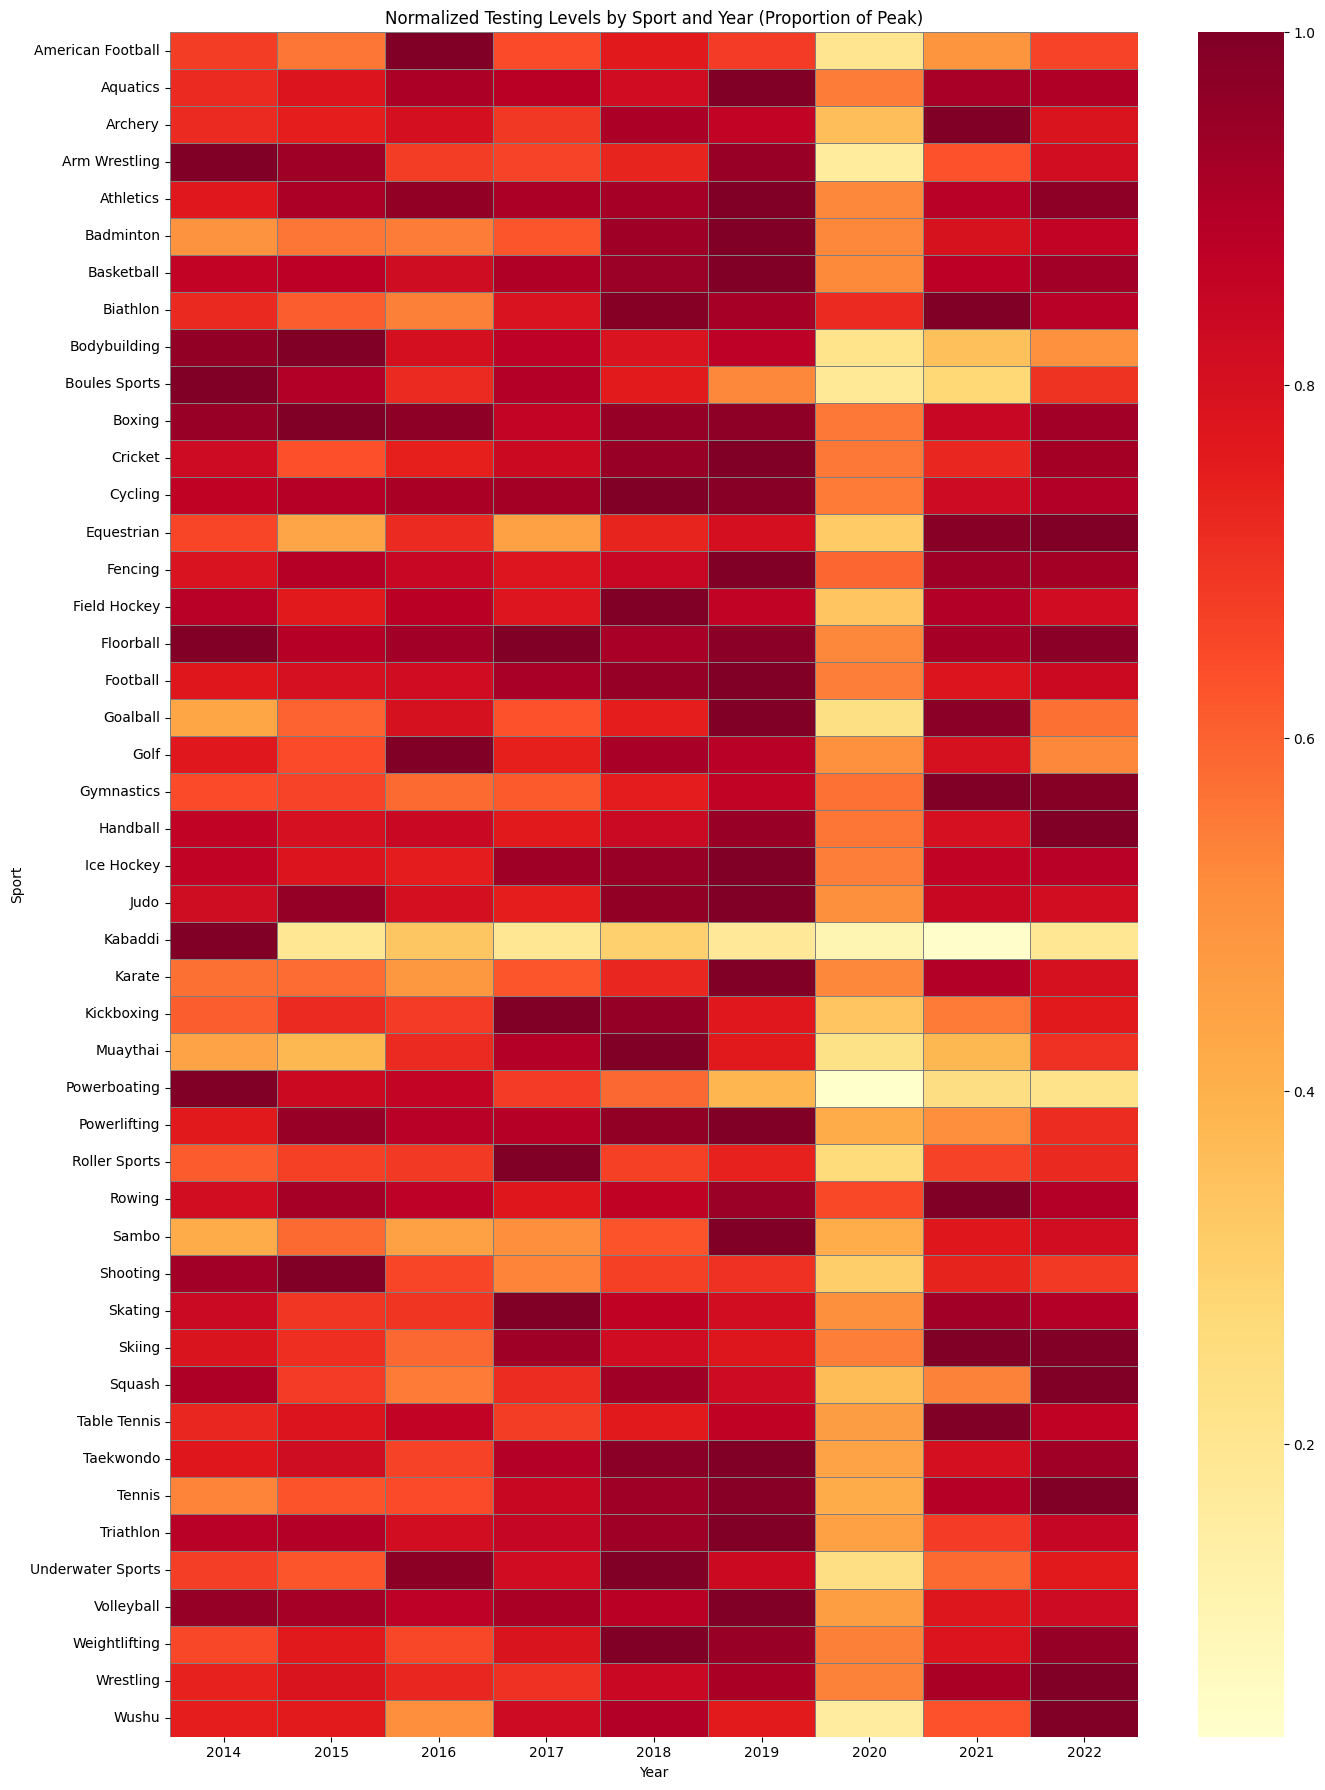

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create pivot table: rows = Sports, columns = Years, values = Normalized Samples
heatmap_data = df_combined.pivot(index='Sport', columns='Year', values='Normalized_Samples')

# Plot the heatmap without annotations
plt.figure(figsize=(14, 18))
sns.heatmap(heatmap_data, cmap="YlOrRd", linewidths=0.5, linecolor="gray", cbar=True)
plt.title("Normalized Testing Levels by Sport and Year (Proportion of Peak)")
plt.xlabel("Year")
plt.ylabel("Sport")
plt.tight_layout()
plt.show()



AAF_Rate_per_1000 column not found, attempting merge...
'AAF_Rate_per_1000' merged in. Columns now: Index(['Year', 'Sport', 'Z_Score_All_Sports', 'Z_Score_Own_History', 'Normalized_Samples', 'AAF_Rate_per_1000'], dtype='object')


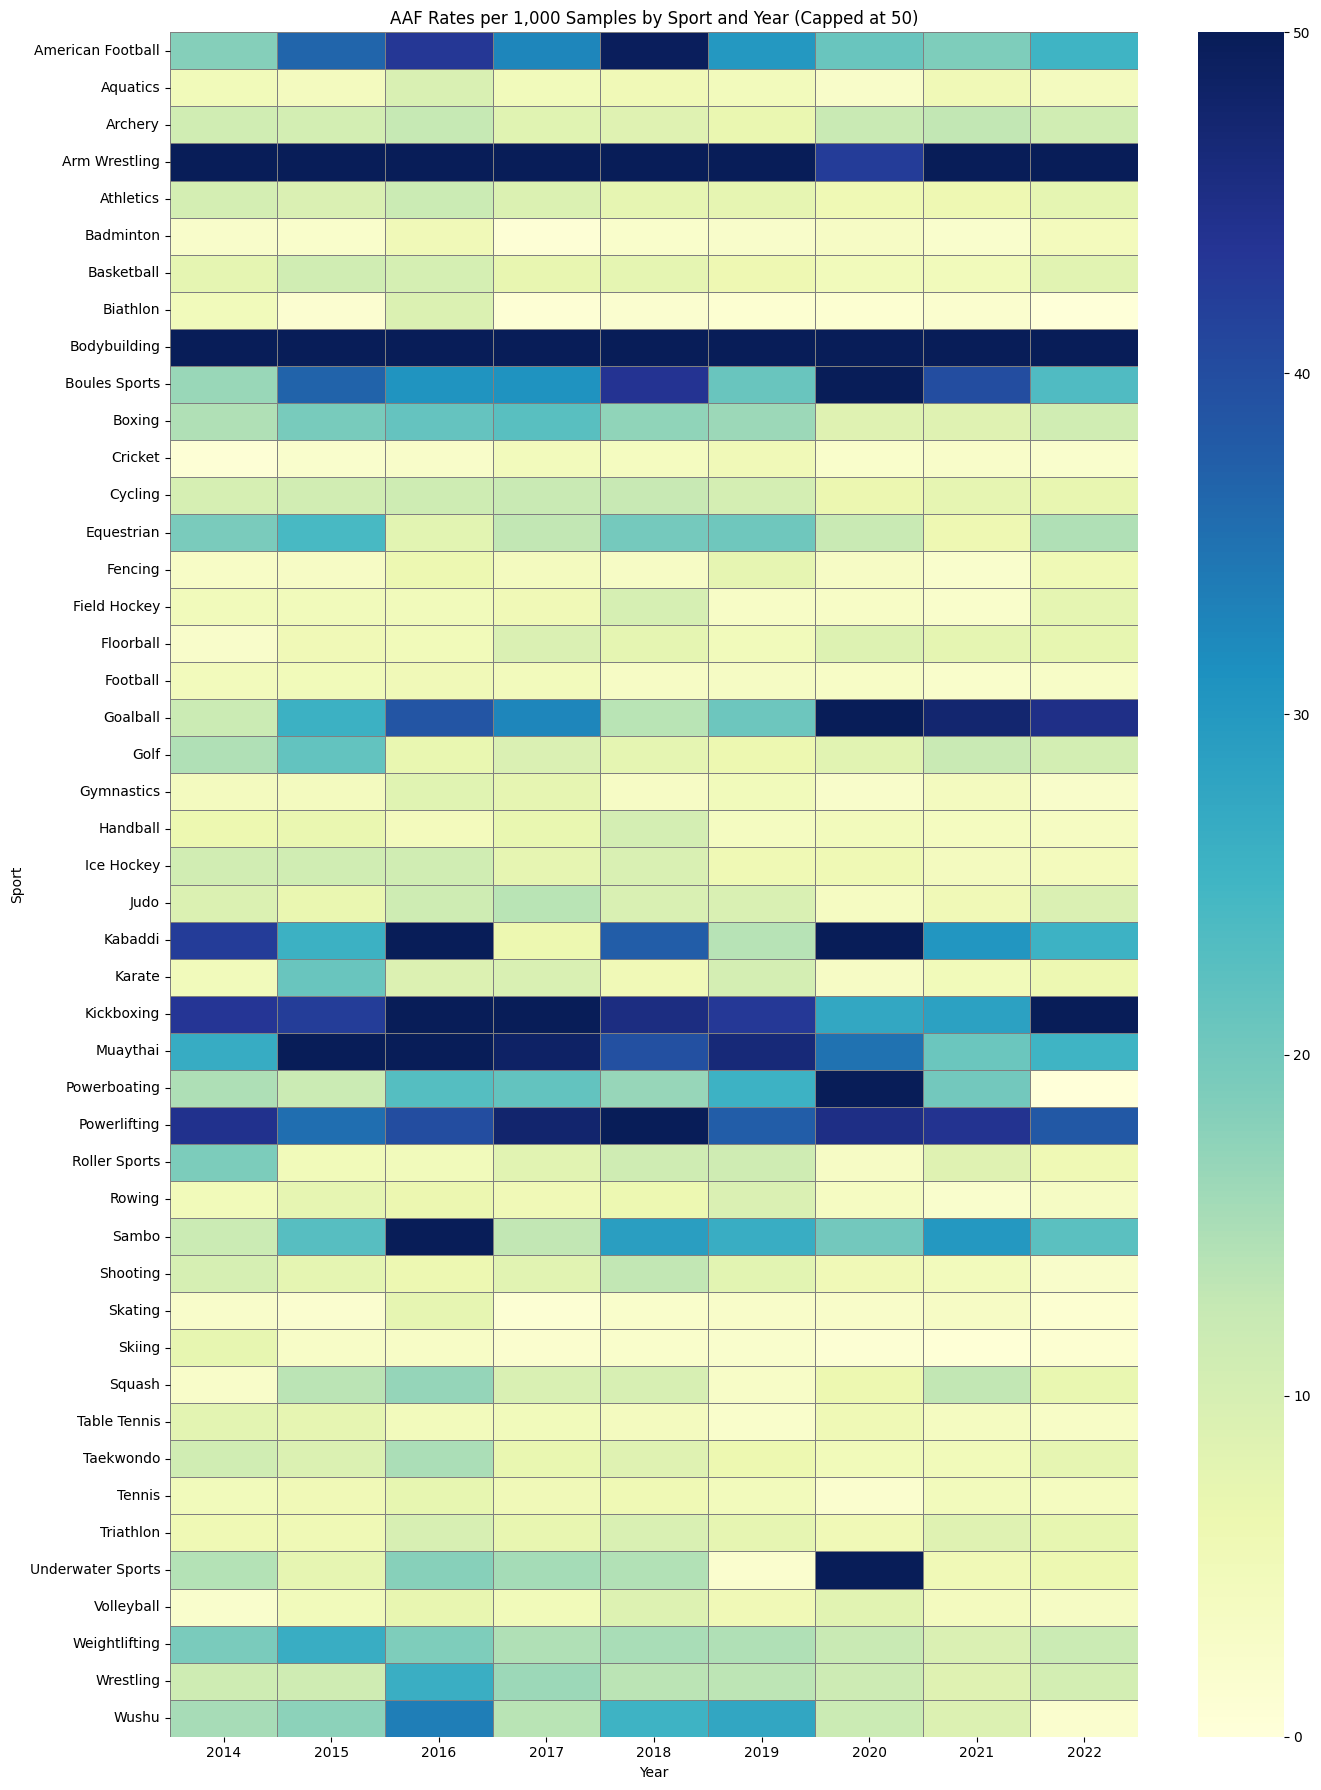

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. Ensure 'AAF_Rate_per_1000' exists in df_combined ===

# Check for possible AAF columns after previous merges
possible_cols = [c for c in df_combined.columns if 'AAF_Rate_per_1000' in c]
if possible_cols:
    # If we have '_x' or '_y', pick the last one and rename it
    chosen_col = possible_cols[-1]
    print(f"Using column: {chosen_col}")
    df_combined['AAF_Rate_per_1000'] = df_combined[chosen_col]
    # Drop other duplicate columns
    to_drop = [c for c in possible_cols if c != 'AAF_Rate_per_1000']
    df_combined = df_combined.drop(columns=to_drop)
else:
    # Try merging in from df_aaf_rate
    print("AAF_Rate_per_1000 column not found, attempting merge...")
    if 'df_aaf_rate' in globals() and 'AAF_Rate_per_1000' in df_aaf_rate.columns:
        df_combined = df_combined.merge(
            df_aaf_rate[['Sport', 'Year', 'AAF_Rate_per_1000']],
            on=['Sport', 'Year'],
            how='left'
        )
        print("'AAF_Rate_per_1000' merged in. Columns now:", df_combined.columns)
    else:
        raise ValueError("Cannot find 'AAF_Rate_per_1000' in either df_combined or df_aaf_rate! Check your earlier code.")

# === 2. Pivot for heatmap ===
if 'AAF_Rate_per_1000' in df_combined.columns:
    aaf_heatmap = df_combined.pivot(index='Sport', columns='Year', values='AAF_Rate_per_1000')

    # === 3. Plot the heatmap ===
    plt.figure(figsize=(14, 18))
    sns.heatmap(
        aaf_heatmap,
        cmap="YlGnBu",
        linewidths=0.5,
        linecolor="gray",
        cbar=True,
        vmax=50  # Limit max color to 50 AAFs per 1000
    )
    plt.title("AAF Rates per 1,000 Samples by Sport and Year (Capped at 50)")
    plt.xlabel("Year")
    plt.ylabel("Sport")
    plt.tight_layout()
    plt.show()
else:
    print("Still missing 'AAF_Rate_per_1000' after merge attempt. Columns now:", df_combined.columns)



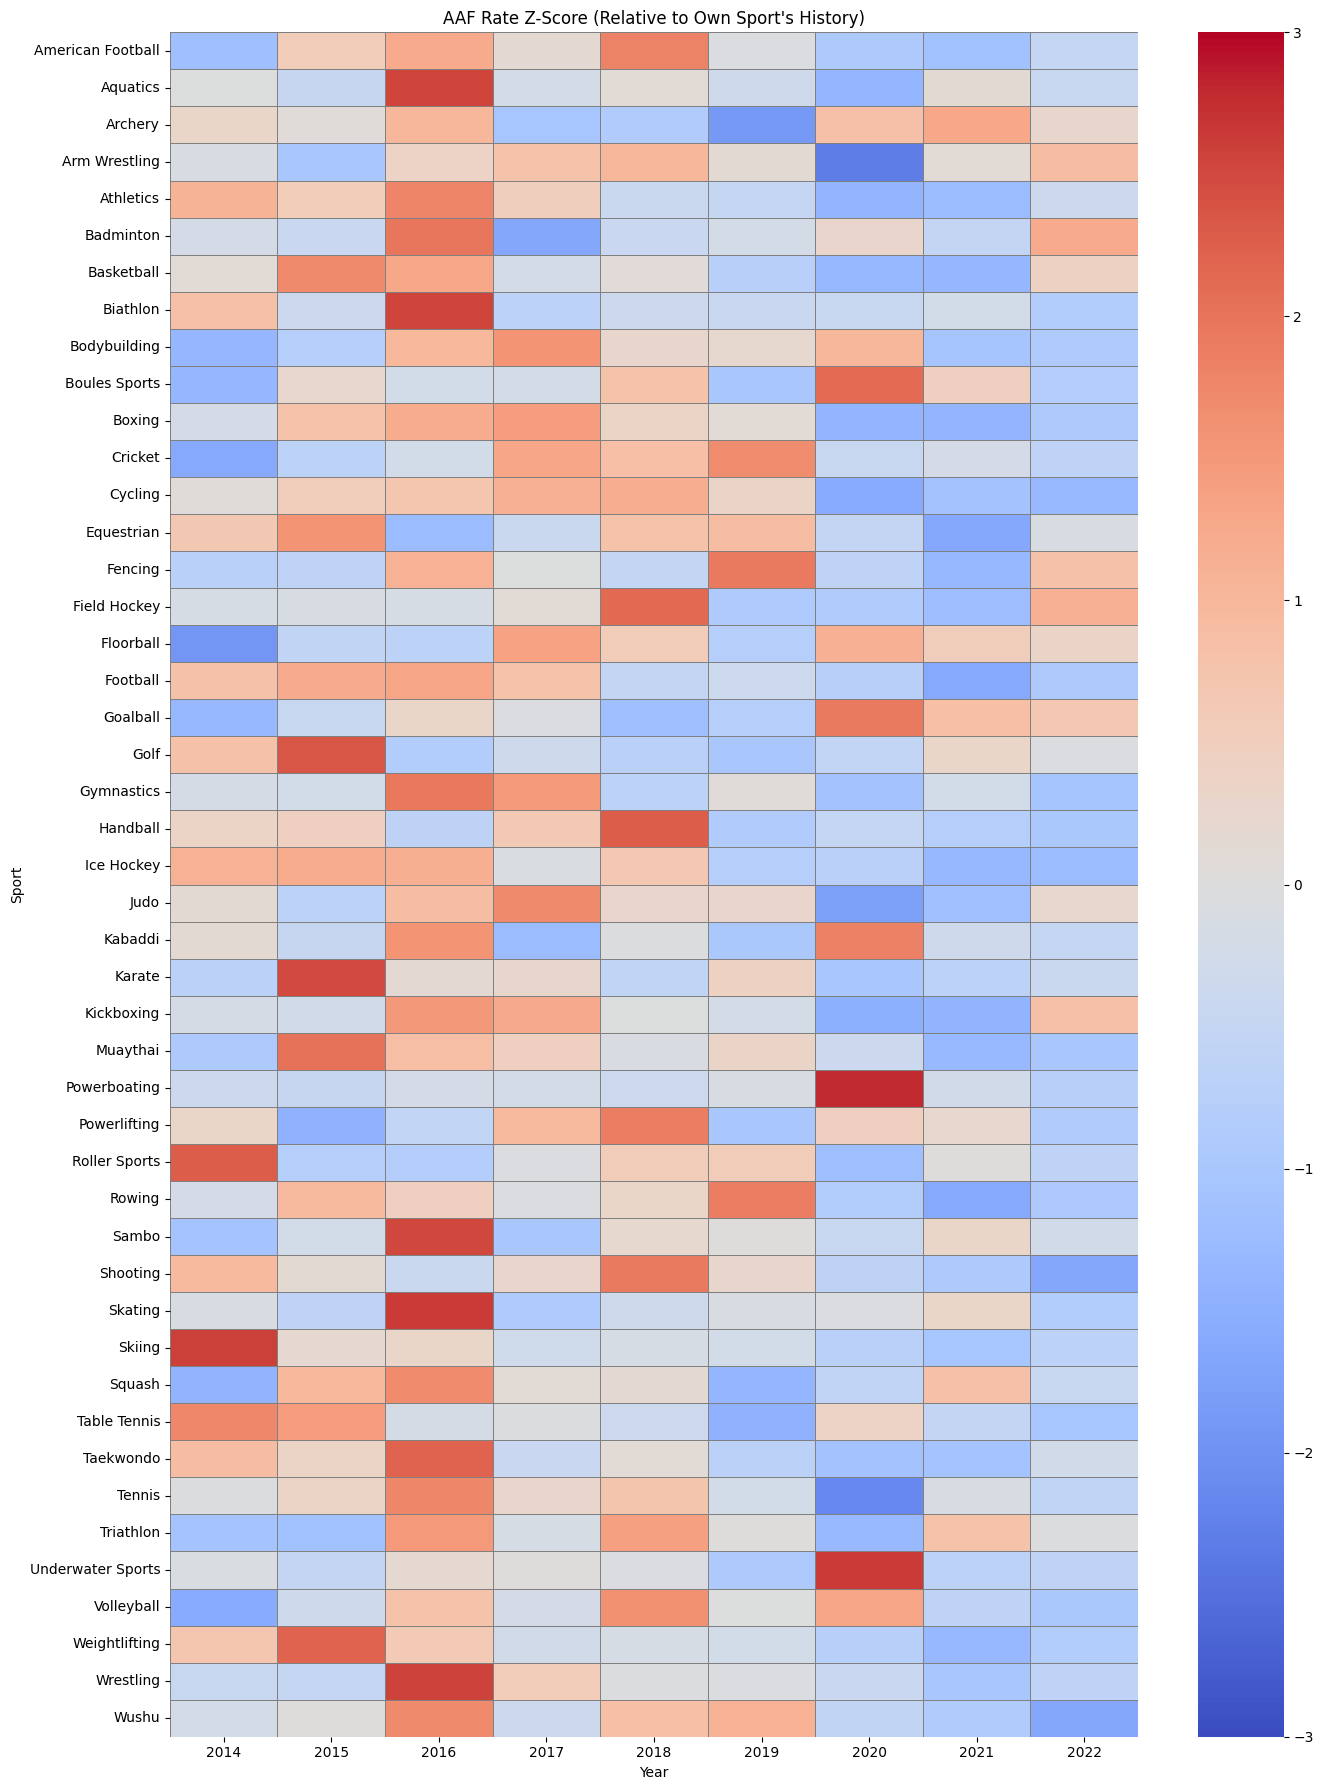

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import numpy as np # Import numpy for handling potential NaNs

# --- Ensure df_combined has 'AAF_Rate_per_1000' and 'Sport', 'Year' ---
# This assumes df_combined was created in a previous cell and contains the necessary columns.
# If not, you might need to recreate or load it.

if 'AAF_Rate_per_1000' not in df_combined.columns or 'Sport' not in df_combined.columns or 'Year' not in df_combined.columns:
    print("Required columns not found in df_combined. Please ensure df_combined is properly constructed.")

    # For this specific heatmap, only AAF_Rate_per_1000 is strictly needed.

    if 'aaf_rate_data' in globals():
         print("Using aaf_rate_data to construct a temporary DataFrame for the heatmap.")
         df_temp = pd.DataFrame(aaf_rate_data)
         # Pivot for heatmap
         aaf_heatmap = df_temp.pivot(index='Sport', columns='Year', values='AAF_Rate_per_1000')
    else:
         raise NameError("df_combined and aaf_rate_data are not available. Cannot proceed.")
else:
    # Pivot to sport × year matrix using the existing df_combined
    aaf_heatmap = df_combined.pivot(index='Sport', columns='Year', values='AAF_Rate_per_1000')


# --- Compute Z-scores relative to each sport's history ---
# We need to apply the zscore calculation along the rows (axis=1) which represent the years for each sport.
# We use nan_policy='omit' to ignore NaN values in the calculation.
# The result is a new DataFrame with Z-scores.
aaf_zscore_own_history = pd.DataFrame(
    zscore(aaf_heatmap, axis=1, nan_policy='omit'),
    index=aaf_heatmap.index,
    columns=aaf_heatmap.columns
)

# Replace potential inf values resulting from zscore on constant data with NaN
aaf_zscore_own_history = aaf_zscore_own_history.replace([np.inf, -np.inf], np.nan)


# --- Plot the heatmap ---
plt.figure(figsize=(14, 18))
sns.heatmap(
    aaf_zscore_own_history,
    cmap="coolwarm",  # Centered colormap
    center=0,         # Center the colormap at 0
    linewidths=0.5,
    linecolor="gray",
    cbar=True,
    vmin=-3,          # Set consistent limits for Z-scores (adjust as needed)
    vmax=3
)
plt.title("AAF Rate Z-Score (Relative to Own Sport's History)")
plt.xlabel("Year")
plt.ylabel("Sport")
plt.tight_layout()
plt.show()

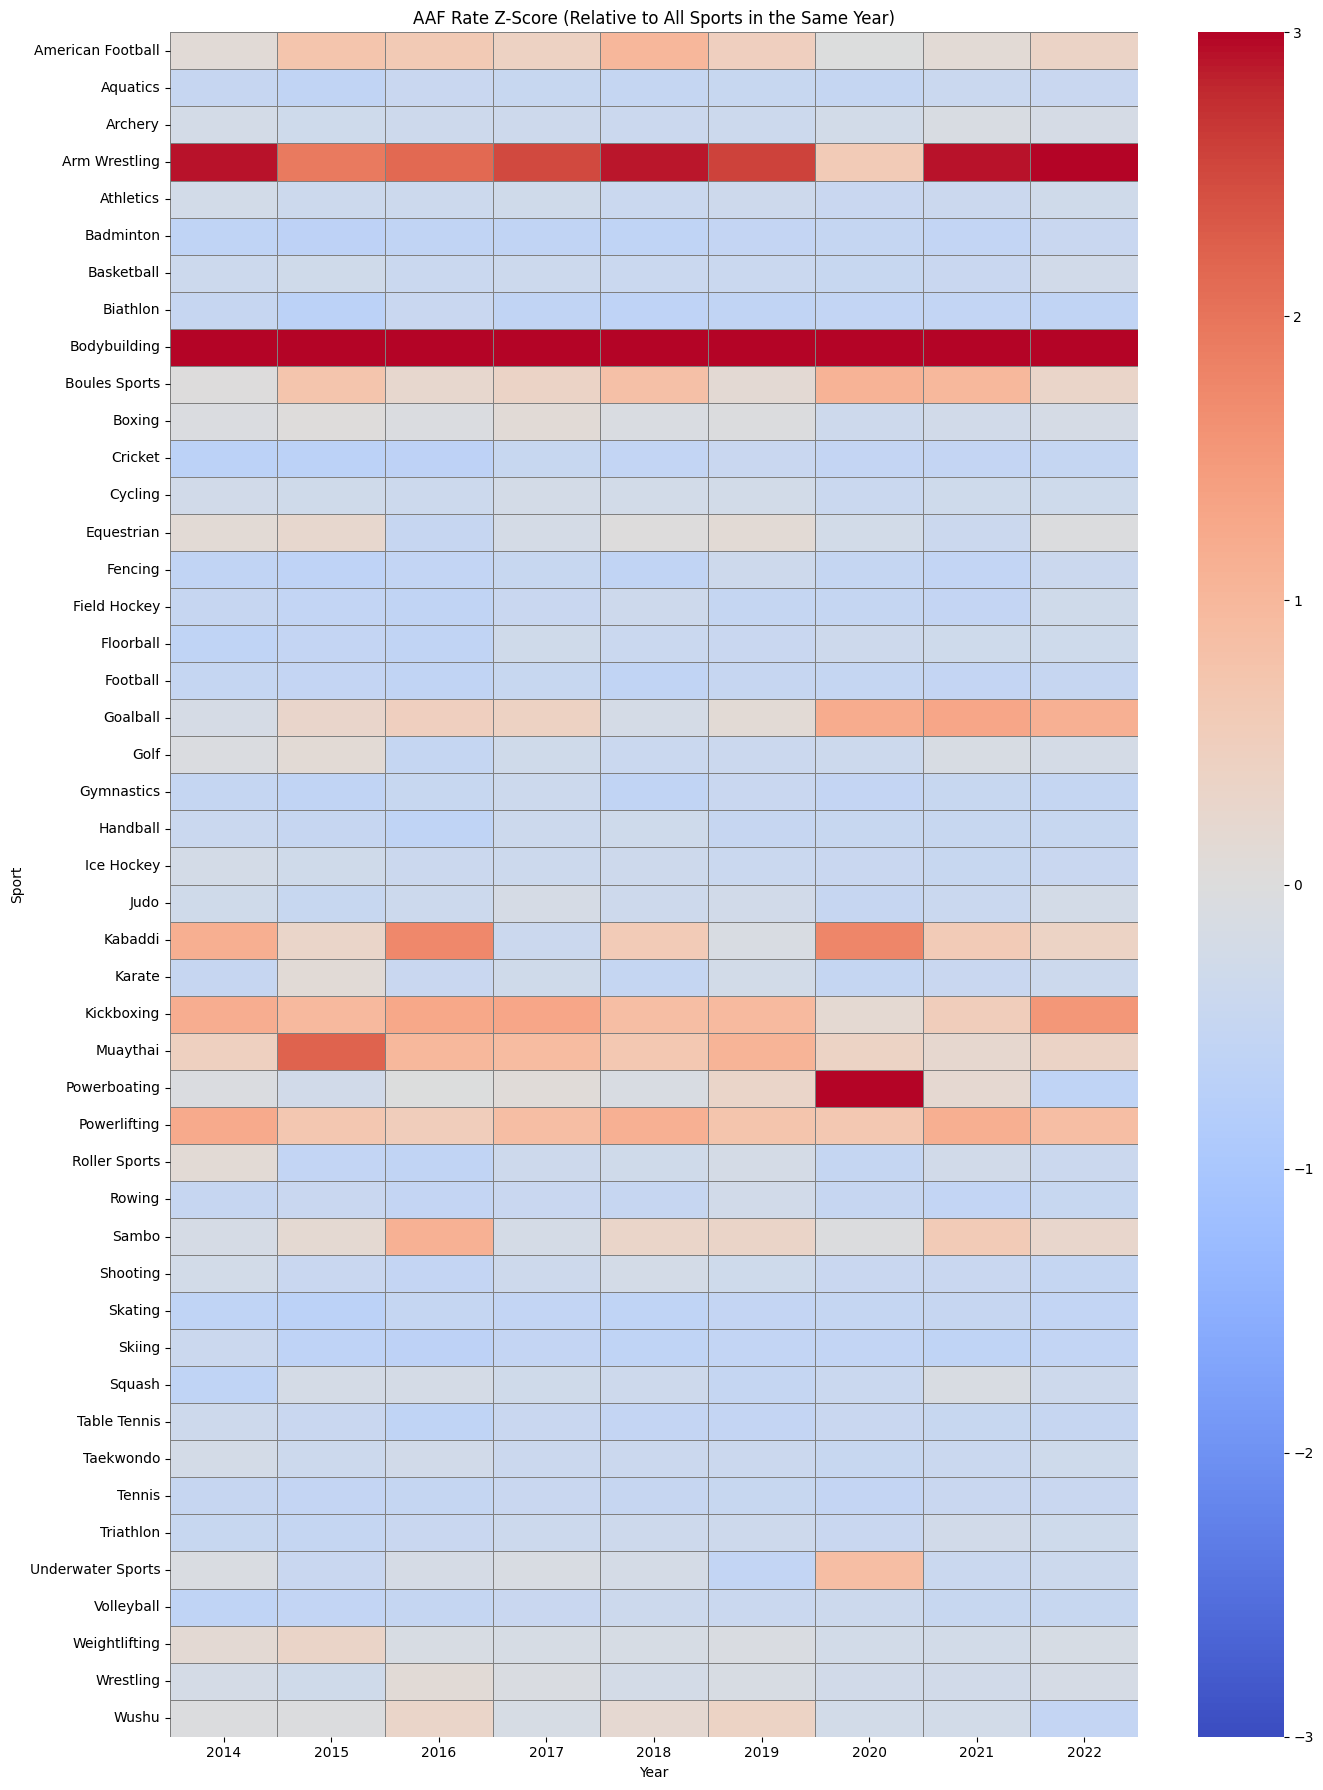

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import numpy as np # Import numpy for handling potential NaNs

# --- Ensure df_combined has 'AAF_Rate_per_1000' and 'Sport', 'Year' ---

if 'AAF_Rate_per_1000' not in df_combined.columns or 'Sport' not in df_combined.columns or 'Year' not in df_combined.columns:
    print("Required columns not found in df_combined. Please ensure df_combined is properly constructed.")
    # You might need to add code here to load or recreate df_combined
    # For example, using the aaf_rate_data list if available:
    # df_combined = pd.DataFrame(aaf_rate_data)
    # Then merge or add other necessary data like Normalized_Samples if needed for later plots
    # For this specific heatmap, only AAF_Rate_per_1000 is strictly needed.
    # Let's proceed assuming aaf_rate_data is available from previous execution
    if 'aaf_rate_data' in globals():
         print("Using aaf_rate_data to construct a temporary DataFrame for the heatmap.")
         df_temp = pd.DataFrame(aaf_rate_data)
         # Pivot for heatmap
         aaf_heatmap = df_temp.pivot(index='Sport', columns='Year', values='AAF_Rate_per_1000')
    else:
         raise NameError("df_combined and aaf_rate_data are not available. Cannot proceed.")
else:
    # Pivot to sport × year matrix using the existing df_combined
    aaf_heatmap = df_combined.pivot(index='Sport', columns='Year', values='AAF_Rate_per_1000')


# --- Compute Z-scores relative to all sports in the same year ---
# We need to apply the zscore calculation along the columns (axis=0) which represent the sports for each year.
# We use nan_policy='omit' to ignore NaN values in the calculation.
# The result is a new DataFrame with Z-scores.
aaf_zscore_all_sports = pd.DataFrame(
    zscore(aaf_heatmap, axis=0, nan_policy='omit'),
    index=aaf_heatmap.index,
    columns=aaf_heatmap.columns
)

# Replace potential inf values resulting from zscore on constant data with NaN
aaf_zscore_all_sports = aaf_zscore_all_sports.replace([np.inf, -np.inf], np.nan)

# --- Plot the heatmap ---
plt.figure(figsize=(14, 18))
sns.heatmap(
    aaf_zscore_all_sports,
    cmap="coolwarm",  # Centered colormap
    center=0,         # Center the colormap at 0
    linewidths=0.5,
    linecolor="gray",
    cbar=True,
    vmin=-3,          # Set consistent limits for Z-scores (adjust as needed)
    vmax=3
)
plt.title("AAF Rate Z-Score (Relative to All Sports in the Same Year)")
plt.xlabel("Year")
plt.ylabel("Sport")
plt.tight_layout()
plt.show()

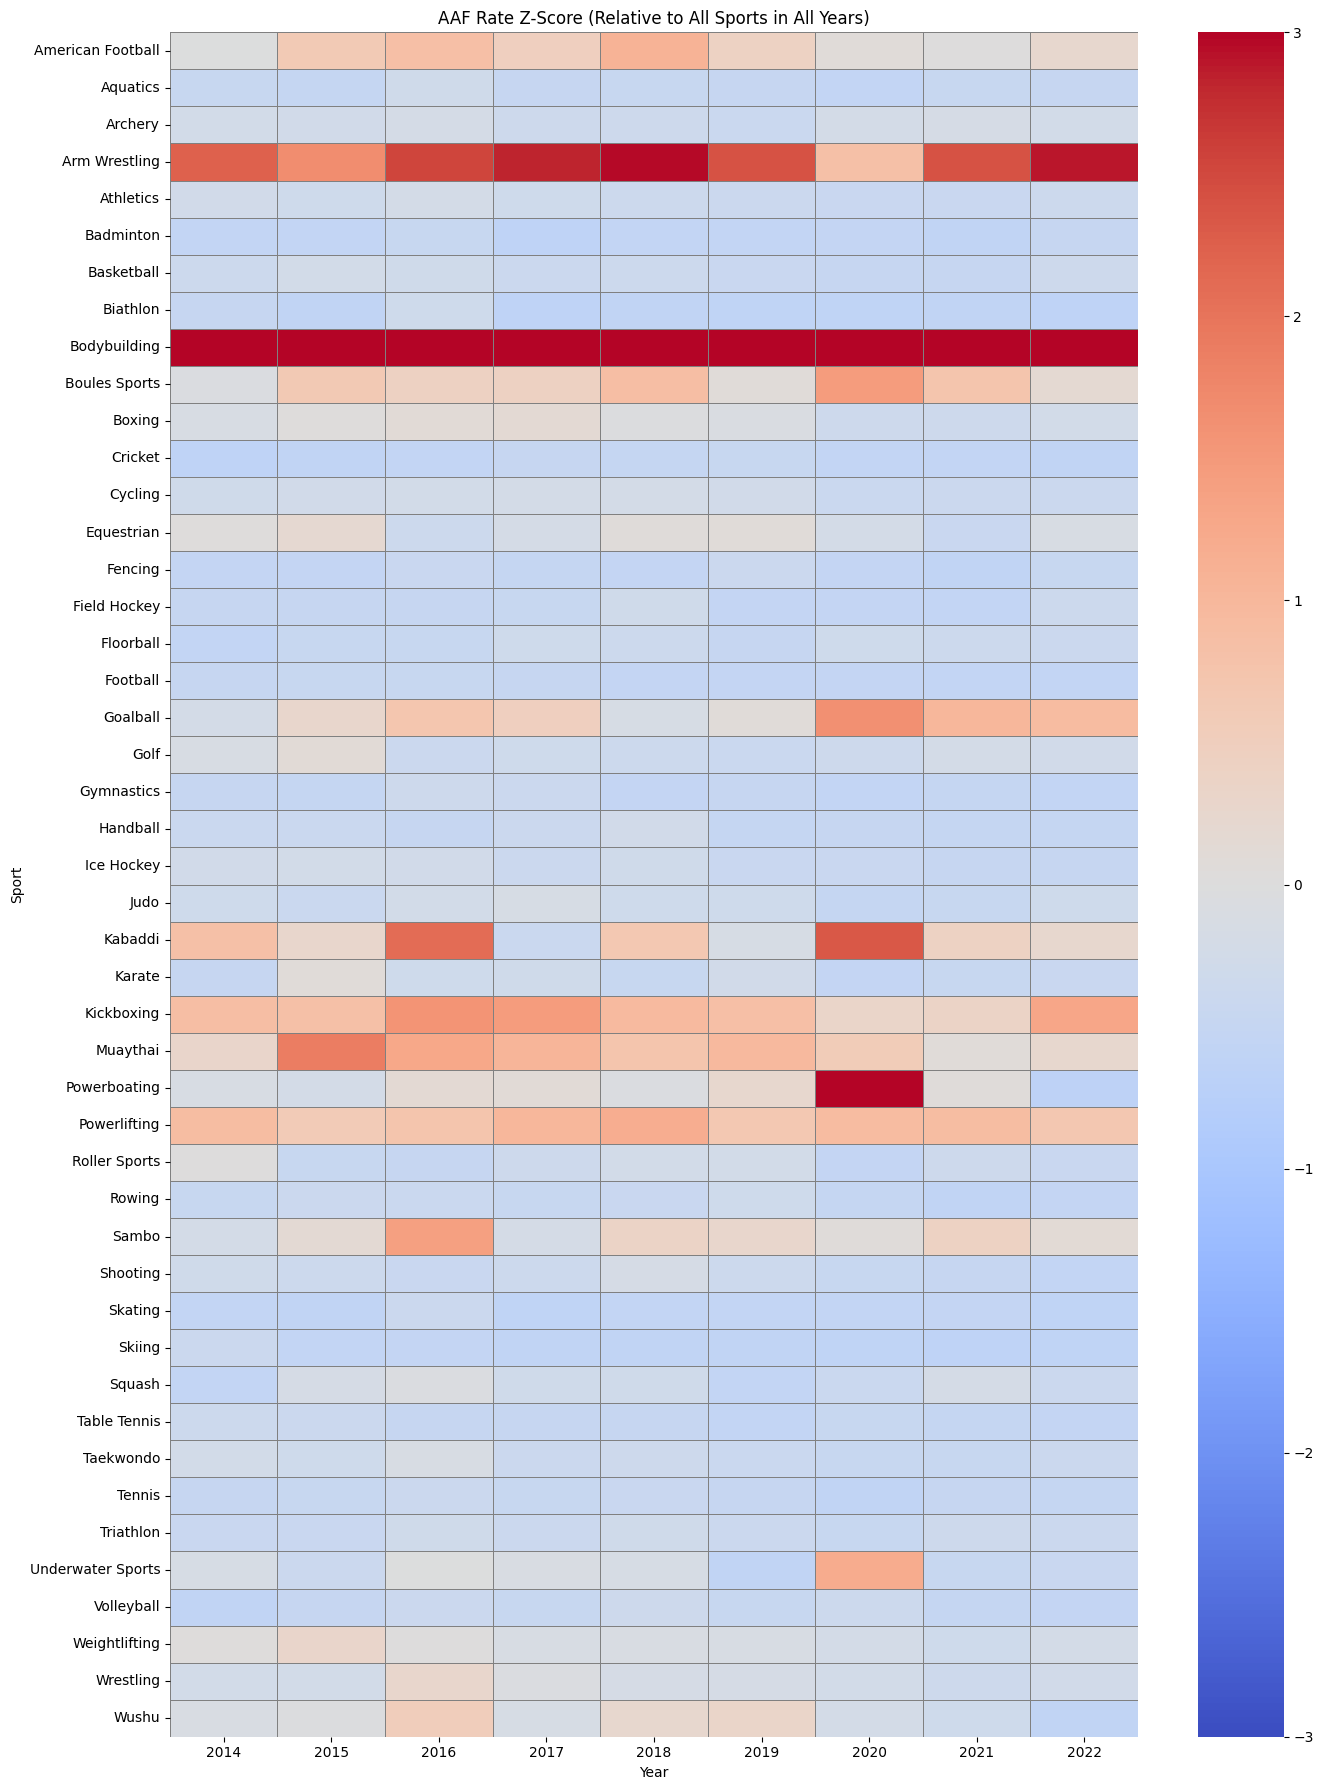

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import numpy as np # Import numpy for handling potential NaNs

# --- Ensure df_combined has 'AAF_Rate_per_1000' and 'Sport', 'Year' ---
# This assumes df_combined was created in a previous cell and contains the necessary columns.
# If not, you might need to recreate or load it.

if 'AAF_Rate_per_1000' not in df_combined.columns or 'Sport' not in df_combined.columns or 'Year' not in df_combined.columns:
    print("Required columns not found in df_combined. Please ensure df_combined is properly constructed.")
    # You might need to add code here to load or recreate df_combined
    # For example, using the aaf_rate_data list if available:
    # df_combined = pd.DataFrame(aaf_rate_data)
    # Then merge or add other necessary data like Normalized_Samples if needed for later plots
    # For this specific heatmap, only AAF_Rate_per_1000 is strictly needed.
    # Let's proceed assuming aaf_rate_data is available from previous execution
    if 'aaf_rate_data' in globals():
         print("Using aaf_rate_data to construct a temporary DataFrame for the heatmap.")
         df_temp = pd.DataFrame(aaf_rate_data)
         # Pivot for heatmap
         aaf_heatmap = df_temp.pivot(index='Sport', columns='Year', values='AAF_Rate_per_1000')
    else:
         raise NameError("df_combined and aaf_rate_data are not available. Cannot proceed.")
else:
    # Pivot to sport × year matrix using the existing df_combined
    aaf_heatmap = df_combined.pivot(index='Sport', columns='Year', values='AAF_Rate_per_1000')


# --- Compute Z-scores relative to all sports in ALL years ---
# Flatten the data, compute Z-scores, and then reshape it back.
# Use nan_policy='omit' to handle potential NaN values in the flattening process.

# Flatten the AAF rates from the pivoted DataFrame
flattened_aaf_rates = aaf_heatmap.values.flatten()

# Compute Z-scores for the flattened array, omitting NaNs
zscore_flattened = zscore(flattened_aaf_rates[~np.isnan(flattened_aaf_rates)], nan_policy='omit')

# Create a new array of the same shape as the flattened original, fill with NaN
zscore_reshaped = np.full(flattened_aaf_rates.shape, np.nan)

# Place the calculated Z-scores back into the correct positions, skipping NaNs
zscore_reshaped[~np.isnan(flattened_aaf_rates)] = zscore_flattened

# Reshape the Z-scores back to the original heatmap shape
aaf_zscore_all_years = pd.DataFrame(
    zscore_reshaped.reshape(aaf_heatmap.shape),
    index=aaf_heatmap.index,
    columns=aaf_heatmap.columns
)

# Replace potential inf values resulting from zscore on constant data with NaN
aaf_zscore_all_years = aaf_zscore_all_years.replace([np.inf, -np.inf], np.nan)


# --- Plot the heatmap ---
plt.figure(figsize=(14, 18))
sns.heatmap(
    aaf_zscore_all_years,
    cmap="coolwarm",  # Centered colormap
    center=0,         # Center the colormap at 0
    linewidths=0.5,
    linecolor="gray",
    cbar=True,
    vmin=-3,          # Set consistent limits for Z-scores (adjust as needed)
    vmax=3,
    mask=aaf_zscore_all_years.isnull() # Mask NaN values
)
plt.title("AAF Rate Z-Score (Relative to All Sports in All Years)")
plt.xlabel("Year")
plt.ylabel("Sport")
plt.tight_layout()
plt.show()

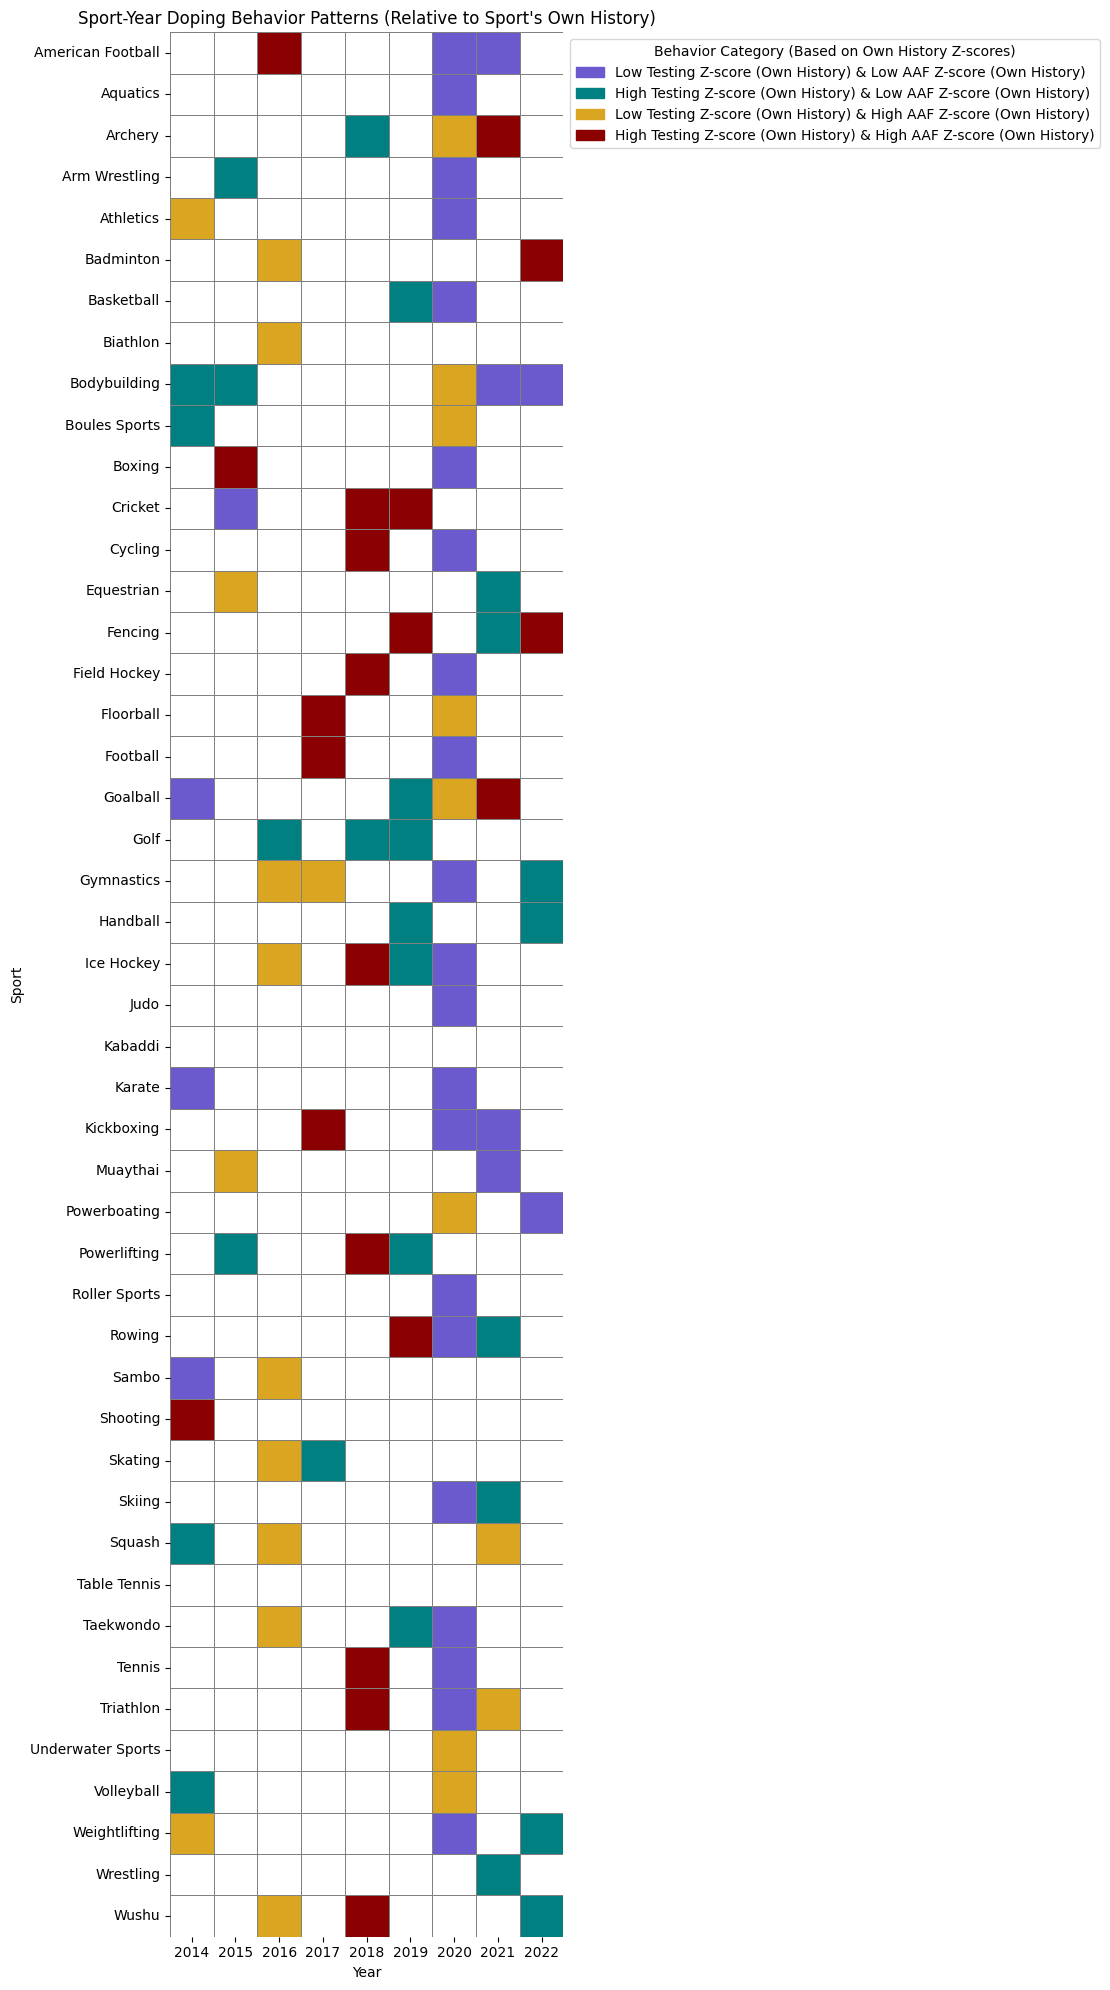

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns


# Check if df_combined exists and has the necessary columns before proceeding
if 'df_combined' not in globals() or not all(col in df_combined.columns for col in ['Sport', 'Year', 'Normalized_Samples', 'AAF_Rate_per_1000']):
    print("df_combined not found or missing required columns. Please run the previous cells to create df_combined.")
else:

    # --- A. Calculate Z-scores relative to sport's own history ---
    # Recalculate to ensure they are based on own history
    df_combined['Testing_Z_Own_History'] = df_combined.groupby('Sport')['Normalized_Samples'].transform(
        lambda x: (x - x.mean()) / x.std(ddof=0) if x.std(ddof=0) > 0 else 0)
    df_combined['Testing_Z_Own_History'] = df_combined['Testing_Z_Own_History'].replace([np.inf, -np.inf], np.nan)

    df_combined['AAF_Z_Own_History'] = df_combined.groupby('Sport')['AAF_Rate_per_1000'].transform(
        lambda x: (x - x.mean()) / x.std(ddof=0) if x.std(ddof=0) > 0 else 0)
    df_combined['AAF_Z_Own_History'] = df_combined['AAF_Z_Own_History'].replace([np.inf, -np.inf], np.nan)


    # --- B. Classify sport-year behavior based on Z-scores (Own History) ---

    def classify_behavior_own_history(testing_z_own, aaf_z_own, high=0.674, low=-0.674):
        if pd.isna(testing_z_own) or pd.isna(aaf_z_own):
            return np.nan # Use NaN for unclassified

        if testing_z_own > high and aaf_z_own > high:
            return 4  # 'High Testing Z-score (Own History) & High AAF Z-score (Own History)'
        elif testing_z_own > high and aaf_z_own < low:
            return 2  # 'High Testing Z-score (Own History) & Low AAF Z-score (Own History)'
        elif testing_z_own < low and aaf_z_own > high:
            return 3  # 'Low Testing Z-score (Own History) & High AAF Z-score (Own History)'
        elif testing_z_own < low and aaf_z_own < low:
            return 1  # 'Low Testing Z-score (Own History) & Low AAF Z-score (Own History)'
        else:
            return np.nan  # Use NaN for unclassified

    df_combined['Behavior_Category_Code'] = df_combined.apply(
        lambda row: classify_behavior_own_history(row['Testing_Z_Own_History'], row['AAF_Z_Own_History']),
        axis=1
    )

    # --- C. Prepare data for heatmap ---
    behavior_heatmap_data = df_combined.pivot(
        index='Sport',
        columns='Year',
        values='Behavior_Category_Code'
    )

    # --- D. Create custom colormap and labels (without 'Unclassified') ---
    color_map = {
        1: 'slateblue',    # 'Low Testing Z-score (Own History) & Low AAF Z-score (Own History)'
        2: 'teal',         # 'High Testing Z-score (Own History) & Low AAF Z-score (Own History)'
        3: 'goldenrod',    # 'Low Testing Z-score (Own History) & High AAF Z-score (Own History)'
        4: 'darkred',      # 'High Testing Z-score (Own History) & High AAF Z-score (Own History)'
    }
    # Create a list of colors in the order of the numeric codes
    cmap_colors = [color_map[i] for i in sorted(color_map.keys())]
    cmap = ListedColormap(cmap_colors)

    # Define the legend labels (without 'Unclassified')
    legend_labels = {
        'Low Testing Z-score (Own History) & Low AAF Z-score (Own History)': 'slateblue',
        'High Testing Z-score (Own History) & Low AAF Z-score (Own History)': 'teal',
        'Low Testing Z-score (Own History) & High AAF Z-score (Own History)': 'goldenrod',
        'High Testing Z-score (Own History) & High AAF Z-score (Own History)': 'darkred',
    }
    legend_patches = [plt.Rectangle((0,0),1,1, color=legend_labels[label]) for label in legend_labels]


    # --- E. Plot the heatmap ---
    plt.figure(figsize=(16, 20)) # Increased figure size to accommodate longer labels
    sns.heatmap(
        behavior_heatmap_data,
        cmap=cmap,
        linewidths=0.5,
        linecolor="gray",
        cbar=False, # Disable default colorbar
        vmin=1,     # Set vmin and vmax to match the range of codes
        vmax=4,
        mask=behavior_heatmap_data.isnull() # Mask NaN values (Unclassified)
    )

    # Add the custom legend
    plt.legend(legend_patches, legend_labels.keys(), title="Behavior Category (Based on Own History Z-scores)", loc='upper left', bbox_to_anchor=(1, 1))


    plt.title("Sport-Year Doping Behavior Patterns (Relative to Sport's Own History)")
    plt.xlabel("Year")
    plt.ylabel("Sport")
    plt.tight_layout(rect=[0, 0, 0.7, 1]) # Adjusted layout to make more space for legend
    plt.show()

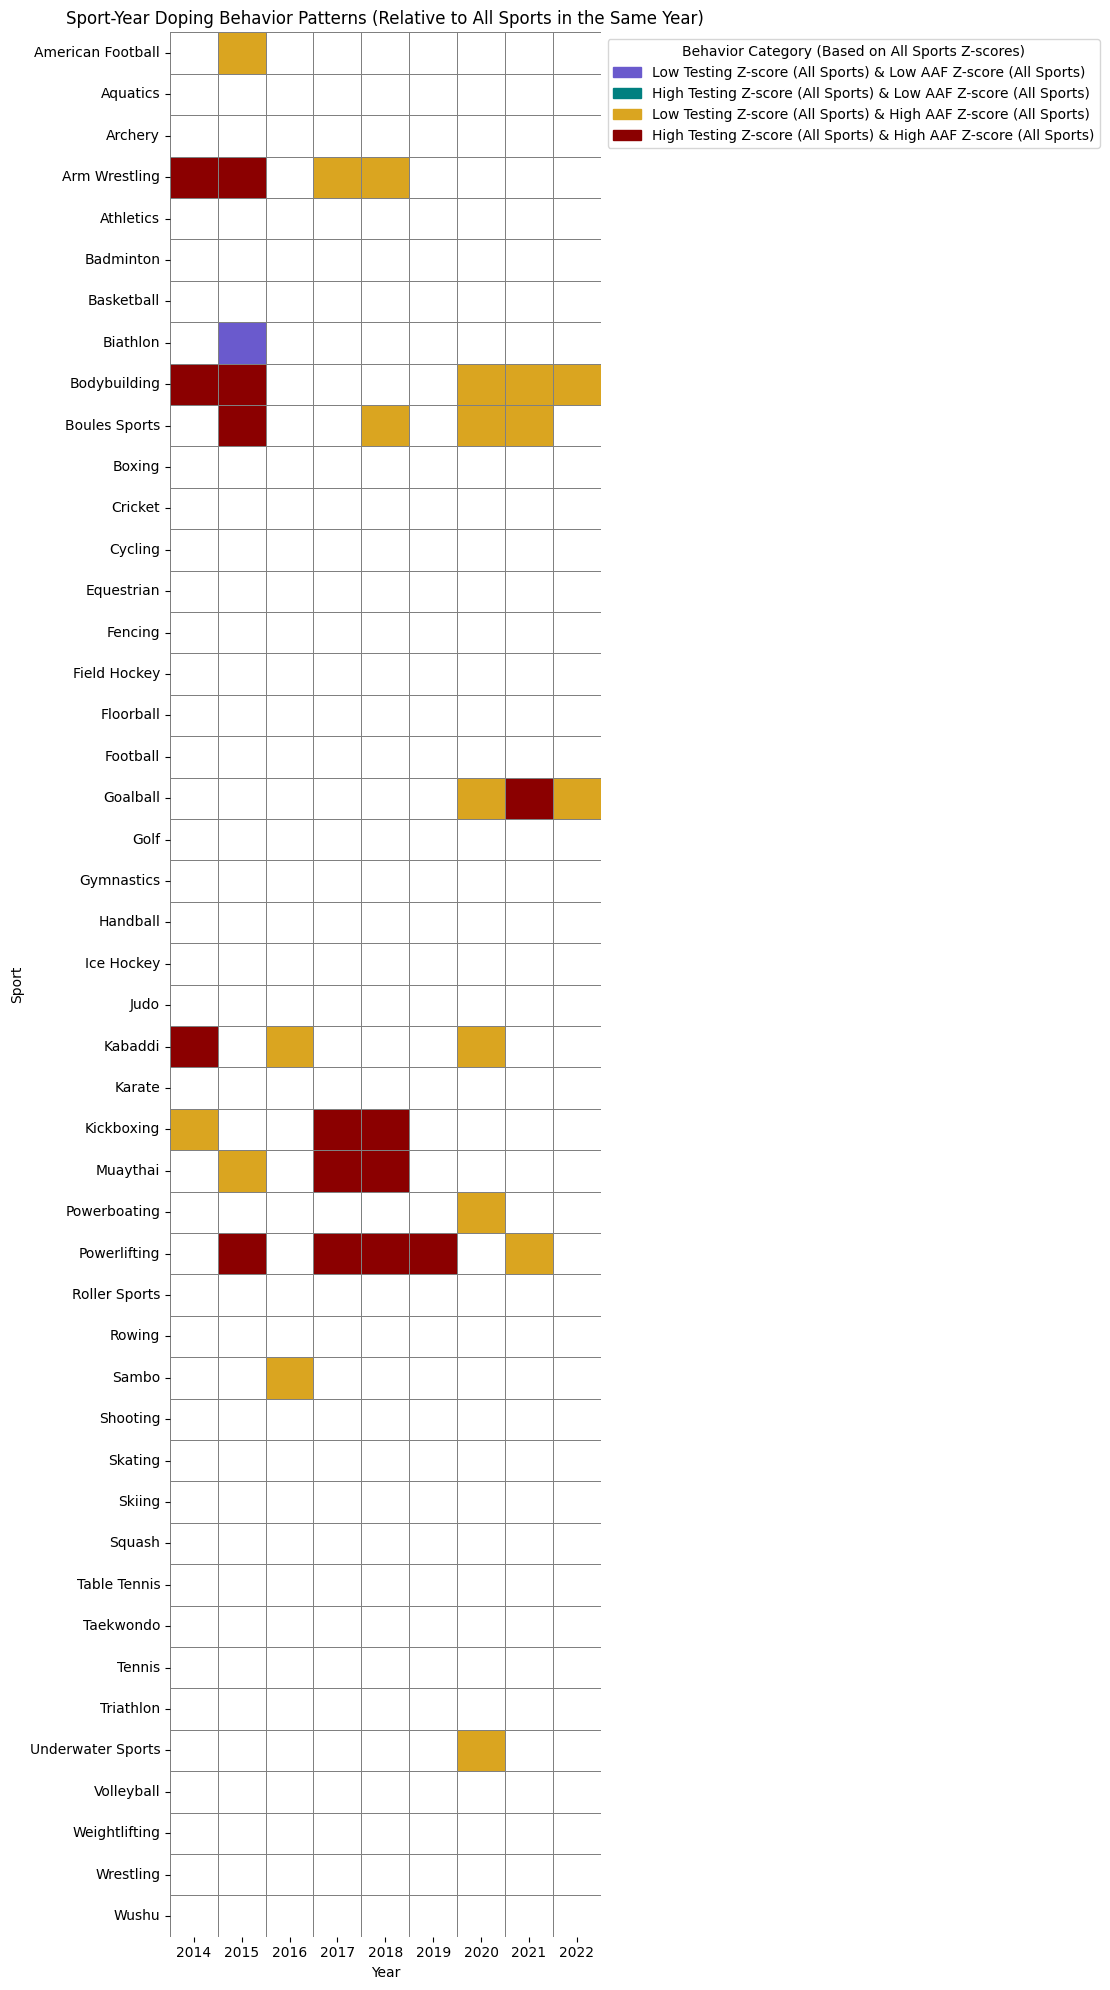

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

# Ensure df_combined is available with necessary columns
# If df_combined was created in previous cells, it should be available.
# If not, you might need to run the cells that create df_combined first.

# Check if df_combined exists and has the necessary columns before proceeding
if 'df_combined' not in globals() or not all(col in df_combined.columns for col in ['Sport', 'Year', 'Normalized_Samples', 'AAF_Rate_per_1000']):
    print("df_combined not found or missing required columns. Please run the previous cells to create df_combined.")
else:

    # --- A. Calculate Z-scores relative to ALL sports in the same year ---
    # Calculate Z-scores for Normalized Samples relative to all sports in the same year
    df_combined['Testing_Z_All_Sports'] = df_combined.groupby('Year')['Normalized_Samples'].transform(
        lambda x: (x - x.mean()) / x.std(ddof=0) if x.std(ddof=0) > 0 else 0)
    df_combined['Testing_Z_All_Sports'] = df_combined['Testing_Z_All_Sports'].replace([np.inf, -np.inf], np.nan)

    # Calculate Z-scores for AAF Rate relative to all sports in the same year
    df_combined['AAF_Z_All_Sports'] = df_combined.groupby('Year')['AAF_Rate_per_1000'].transform(
        lambda x: (x - x.mean()) / x.std(ddof=0) if x.std(ddof=0) > 0 else 0)
    df_combined['AAF_Z_All_Sports'] = df_combined['AAF_Z_All_Sports'].replace([np.inf, -np.inf], np.nan)


    # --- B. Classify sport-year behavior based on Z-scores (All Sports) ---

    def classify_behavior_all_sports(testing_z_all, aaf_z_all, high=0.674, low=-0.674):
        if pd.isna(testing_z_all) or pd.isna(aaf_z_all):
            return np.nan # Use NaN for unclassified

        if testing_z_all > high and aaf_z_all > high:
            return 4  # 'High Testing Z-score (All Sports) & High AAF Z-score (All Sports)'
        elif testing_z_all > high and aaf_z_all < low:
            return 2  # 'High Testing Z-score (All Sports) & Low AAF Z-score (All Sports)'
        elif testing_z_all < low and aaf_z_all > high:
            return 3  # 'Low Testing Z-score (All Sports) & High AAF Z-score (All Sports)'
        elif testing_z_all < low and aaf_z_all < low:
            return 1  # 'Low Testing Z-score (All Sports) & Low AAF Z-score (All Sports)'
        else:
            return np.nan  # Use NaN for unclassified

    df_combined['Behavior_Category_Code_All_Sports'] = df_combined.apply(
        lambda row: classify_behavior_all_sports(row['Testing_Z_All_Sports'], row['AAF_Z_All_Sports']),
        axis=1
    )

    # --- C. Prepare data for heatmap ---
    behavior_heatmap_data_all_sports = df_combined.pivot(
        index='Sport',
        columns='Year',
        values='Behavior_Category_Code_All_Sports'
    )

    # --- D. Create custom colormap and labels (without 'Unclassified') ---
    color_map = {
        1: 'slateblue',    # 'Low Testing Z-score (All Sports) & Low AAF Z-score (All Sports)'
        2: 'teal',         # 'High Testing Z-score (All Sports) & Low AAF Z-score (All Sports)'
        3: 'goldenrod',    # 'Low Testing Z-score (All Sports) & High AAF Z-score (All Sports)'
        4: 'darkred',      # 'High Testing Z-score (All Sports) & High AAF Z-score (All Sports)'
    }
    # Create a list of colors in the order of the numeric codes
    cmap_colors = [color_map[i] for i in sorted(color_map.keys())]
    cmap = ListedColormap(cmap_colors)

    # Define the legend labels (without 'Unclassified')
    legend_labels = {
        'Low Testing Z-score (All Sports) & Low AAF Z-score (All Sports)': 'slateblue',
        'High Testing Z-score (All Sports) & Low AAF Z-score (All Sports)': 'teal',
        'Low Testing Z-score (All Sports) & High AAF Z-score (All Sports)': 'goldenrod',
        'High Testing Z-score (All Sports) & High AAF Z-score (All Sports)': 'darkred',
    }
    legend_patches = [plt.Rectangle((0,0),1,1, color=legend_labels[label]) for label in legend_labels]


    # --- E. Plot the heatmap ---
    plt.figure(figsize=(16, 20)) # Increased figure size to accommodate longer labels
    sns.heatmap(
        behavior_heatmap_data_all_sports,
        cmap=cmap,
        linewidths=0.5,
        linecolor="gray",
        cbar=False, # Disable default colorbar
        vmin=1,     # Set vmin and vmax to match the range of codes
        vmax=4,
        mask=behavior_heatmap_data_all_sports.isnull() # Mask NaN values (Unclassified)
    )

    # Add the custom legend
    plt.legend(legend_patches, legend_labels.keys(), title="Behavior Category (Based on All Sports Z-scores)", loc='upper left', bbox_to_anchor=(1, 1))


    plt.title("Sport-Year Doping Behavior Patterns (Relative to All Sports in the Same Year)")
    plt.xlabel("Year")
    plt.ylabel("Sport")
    plt.tight_layout(rect=[0, 0, 0.7, 1]) # Adjusted layout to make more space for legend
    plt.show()

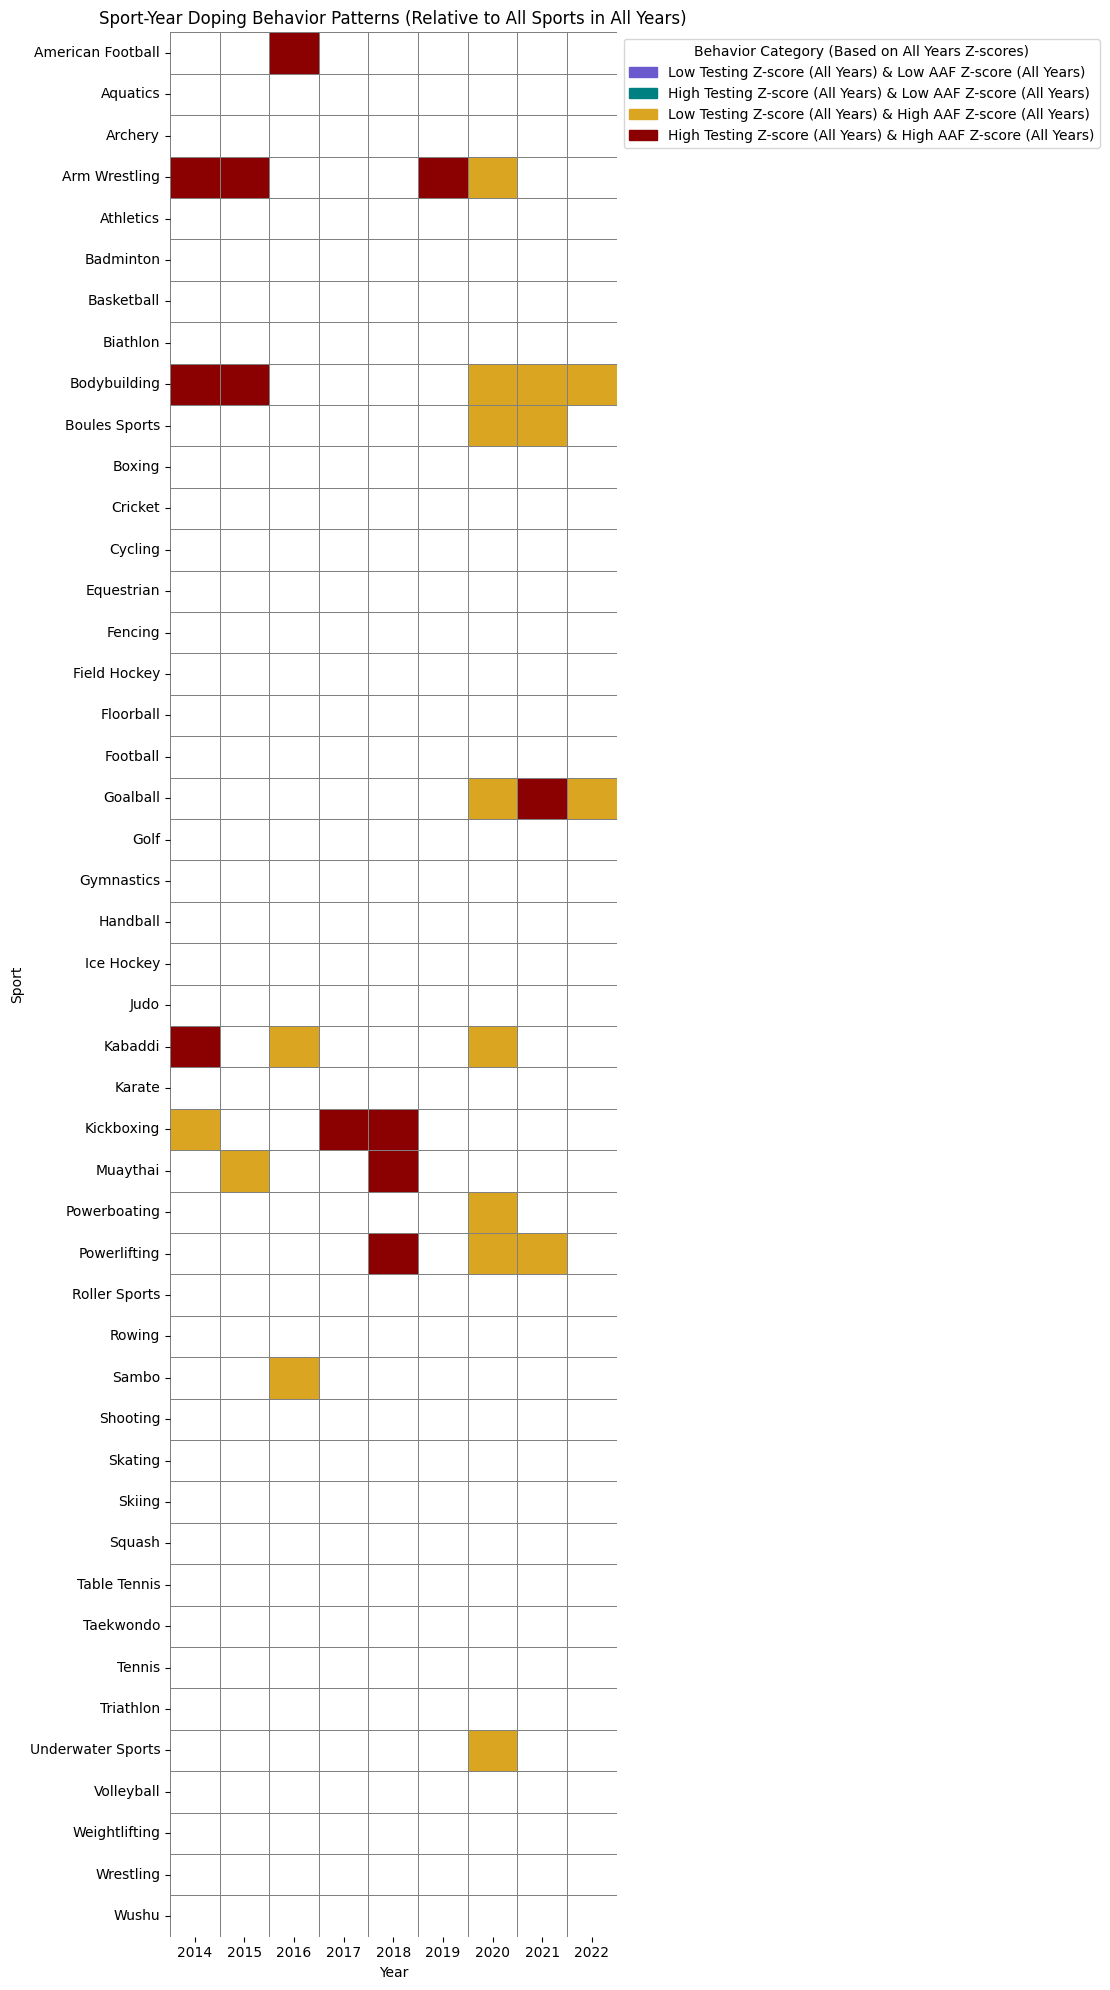

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

# Ensure df_combined is available with necessary columns
# If df_combined was created in previous cells, it should be available.
# If not, you might need to run the cells that create df_combined first.

# Check if df_combined exists and has the necessary columns before proceeding
if 'df_combined' not in globals() or not all(col in df_combined.columns for col in ['Sport', 'Year', 'Normalized_Samples', 'AAF_Rate_per_1000']):
    print("df_combined not found or missing required columns. Please run the previous cells to create df_combined.")
else:

    # --- A. Calculate Z-scores relative to ALL sports in ALL years ---

    # Calculate the mean and standard deviation across the entire dataset for AAF_Rate_per_1000
    mean_aaf_all_years = df_combined['AAF_Rate_per_1000'].mean()
    std_aaf_all_years = df_combined['AAF_Rate_per_1000'].std(ddof=0) # Use ddof=0 for population std dev

    # Calculate the mean and standard deviation across the entire dataset for Normalized_Samples
    mean_testing_all_years = df_combined['Normalized_Samples'].mean()
    std_testing_all_years = df_combined['Normalized_Samples'].std(ddof=0) # Use ddof=0 for population std dev


    # Calculate Z-scores relative to all sports in all years
    # Avoid division by zero if standard deviation is 0
    df_combined['Testing_Z_All_Years'] = (df_combined['Normalized_Samples'] - mean_testing_all_years) / std_testing_all_years if std_testing_all_years > 0 else 0
    df_combined['Testing_Z_All_Years'] = df_combined['Testing_Z_All_Years'].replace([np.inf, -np.inf], np.nan)

    df_combined['AAF_Z_All_Years'] = (df_combined['AAF_Rate_per_1000'] - mean_aaf_all_years) / std_aaf_all_years if std_aaf_all_years > 0 else 0
    df_combined['AAF_Z_All_Years'] = df_combined['AAF_Z_All_Years'].replace([np.inf, -np.inf], np.nan)


    # --- B. Classify sport-year behavior based on Z-scores (All Sports in All Years) ---

    def classify_behavior_all_years(testing_z_all_years, aaf_z_all_years, high=0.674, low=-0.674):
        if pd.isna(testing_z_all_years) or pd.isna(aaf_z_all_years):
            return np.nan # Use NaN for unclassified

        if testing_z_all_years > high and aaf_z_all_years > high:
            return 4  # 'High Testing Z-score (All Years) & High AAF Z-score (All Years)'
        elif testing_z_all_years > high and aaf_z_all_years < low:
            return 2  # 'High Testing Z-score (All Years) & Low AAF Z-score (All Years)'
        elif testing_z_all_years < low and aaf_z_all_years > high:
            return 3  # 'Low Testing Z-score (All Years) & High AAF Z-score (All Years)'
        elif testing_z_all_years < low and aaf_z_all_years < low:
            return 1  # 'Low Testing Z-score (All Years) & Low AAF Z-score (All Years)'
        else:
            return np.nan  # Use NaN for unclassified

    df_combined['Behavior_Category_Code_All_Years'] = df_combined.apply(
        lambda row: classify_behavior_all_years(row['Testing_Z_All_Years'], row['AAF_Z_All_Years']),
        axis=1
    )

    # --- C. Prepare data for heatmap ---
    behavior_heatmap_data_all_years = df_combined.pivot(
        index='Sport',
        columns='Year',
        values='Behavior_Category_Code_All_Years'
    )

    # --- D. Create custom colormap and labels (without 'Unclassified') ---
    color_map = {
        1: 'slateblue',    # 'Low Testing Z-score (All Years) & Low AAF Z-score (All Years)'
        2: 'teal',         # 'High Testing Z-score (All Years) & Low AAF Z-score (All Years)'
        3: 'goldenrod',    # 'Low Testing Z-score (All Years) & High AAF Z-score (All Years)'
        4: 'darkred',      # 'High Testing Z-score (All Years) & High AAF Z-score (All Years)'
    }
    # Create a list of colors in the order of the numeric codes
    cmap_colors = [color_map[i] for i in sorted(color_map.keys())]
    cmap = ListedColormap(cmap_colors)

    # Define the legend labels (without 'Unclassified')
    legend_labels = {
        'Low Testing Z-score (All Years) & Low AAF Z-score (All Years)': 'slateblue',
        'High Testing Z-score (All Years) & Low AAF Z-score (All Years)': 'teal',
        'Low Testing Z-score (All Years) & High AAF Z-score (All Years)': 'goldenrod',
        'High Testing Z-score (All Years) & High AAF Z-score (All Years)': 'darkred',
    }
    legend_patches = [plt.Rectangle((0,0),1,1, color=legend_labels[label]) for label in legend_labels]


    # --- E. Plot the heatmap ---
    plt.figure(figsize=(16, 20)) # Increased figure size to accommodate longer labels
    sns.heatmap(
        behavior_heatmap_data_all_years,
        cmap=cmap,
        linewidths=0.5,
        linecolor="gray",
        cbar=False, # Disable default colorbar
        vmin=1,     # Set vmin and vmax to match the range of codes
        vmax=4,
        mask=behavior_heatmap_data_all_years.isnull() # Mask NaN values (Unclassified)
    )

    # Add the custom legend
    plt.legend(legend_patches, legend_labels.keys(), title="Behavior Category (Based on All Years Z-scores)", loc='upper left', bbox_to_anchor=(1, 1))


    plt.title("Sport-Year Doping Behavior Patterns (Relative to All Sports in All Years)")
    plt.xlabel("Year")
    plt.ylabel("Sport")
    plt.tight_layout(rect=[0, 0, 0.7, 1]) # Adjusted layout to make more space for legend
    plt.show()

## Machine Learning

### Feature importance

Merged AAF_Rate_per_1000 into df_combined; columns now: ['Year', 'Sport', 'Z_Score_All_Sports', 'Z_Score_Own_History', 'Normalized_Samples', 'Testing_Z_Own_History', 'AAF_Z_Own_History', 'Behavior_Category_Code', 'Testing_Z_All_Sports', 'AAF_Z_All_Sports', 'Behavior_Category_Code_All_Sports', 'Testing_Z_All_Years', 'AAF_Z_All_Years', 'Behavior_Category_Code_All_Years', 'AAF_Rate_per_1000']
Calculated Z_Score.
Filtered to sports_in_all_years → 414 rows remain.
95th-percentile threshold: 65.639
Created binary target column 'High_Risk'.
Replaced NaN/inf in features with 0.
Using features: ['Z_Score', 'Deviation_Ratio']
Train/test split: 331 train, 83 test samples.
Model training complete.

Threshold = 0.5
 Accuracy: 0.927710843373494
 Confusion Matrix:
 [[75  1]
 [ 5  2]]
 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96        76
           1       0.67      0.29      0.40         7

    accuracy                   

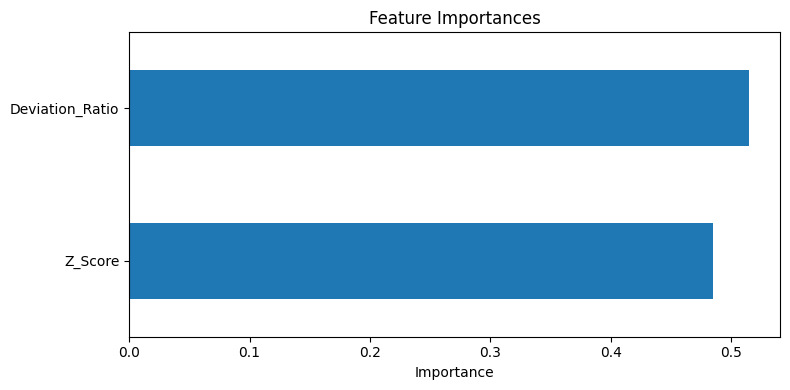


Predicted High-Risk Sport-Years (threshold=0.3):


Year              Sport  AAF_Rate_per_1000   Z_Score  Deviation_Ratio  High_Risk  Predicted_High_Risk
3    2014      Arm Wrestling          83.044983 -0.099087        -0.021495          1                    1
30   2014      Roller Sports          19.021739  2.290730         1.216806          1                    1
35   2014             Skiing           7.381741  2.585446         2.015411          1                    1
49   2015      Arm Wrestling          66.420664 -1.002041        -0.217377          1                    1
54   2015       Bodybuilding         147.515528 -0.789264        -0.103749          1                    1
65   2015               Golf          21.645022  2.365429         0.991765          1                    1
71   2015             Karate          20.992366  2.498023         1.527310          1                    1
73   2015           Muaythai          72.916667  2.031357         0.771817          1                    1
89   2015      Weightlifting          26.522880  2.222289         0.677714          1                    1
93   2016           Aquatics           9.639590  2.551522         0.894845          1                    1
94   2016            Archery          12.500000  1.021398         0.193585          0                    1
95   2016      Arm Wrestling          91.836735  0.378440         0.082096          1                    1
99   2016           Biathlon           9.302326  2.536275         2.648445          1                    1
100  2016       Bodybuilding         185.942492  0.986834         0.129719          1                    1
116  2016            Kabaddi          78.651685  1.576480         1.044206          1                    1
124  2016              Sambo          58.608059  2.509380         1.254397          1                    1
126  2016            Skating           7.477153  2.630724         1.705455          1                    1
130  2016          Taekwondo          14.892443  2.209119         0.796114          1                    1
136  2016          Wrestling          26.315789  2.574092         0.919243          1                    1
140  2017            Archery           8.412198 -1.038074        -0.196746          0                    1
141  2017      Arm Wrestling          99.476440  0.793392         0.172114          1                    1
146  2017       Bodybuilding         198.577356  1.570819         0.206484          1                    1
167  2017       Powerlifting          47.716778  0.947998         0.114396          0                    1
199  2018       Field Hockey           9.994740  2.143959         0.959368          1                    1
205  2018           Handball          10.480573  2.293302         0.853267          1                    1
233  2019      Arm Wrestling          87.591241  0.147844         0.032072          1                    1
238  2019       Bodybuilding         169.632266  0.232974         0.030624          1                    1
278  2020            Archery          12.121212  0.830561         0.157416          0                    1
284  2020       Bodybuilding         186.893204  1.030776         0.135496          1                    1
285  2020      Boules Sports          60.606061  2.115307         0.793703          1                    1
300  2020            Kabaddi          85.365854  1.839938         1.218711          1                    1
304  2020       Powerboating         142.857143  2.783589         3.657115          1                    1
317  2020  Underwater Sports          52.980132  2.643746         2.508464          1                    1
325  2021      Arm Wrestling          87.431694  0.139179         0.030193          1                    1
351  2021       Powerlifting          44.058745  0.240032         0.028965          0                    1
362  2021          Triathlon           8.693429  0.792048         0.168571          0                    1
371  2022      Arm Wrestling         101.69491


Rows with Deviation_Ratio == 0 (after imputation):


Empty DataFrame
Columns: [Sport, Year, Deviation_Ratio]
Index: []

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# --- 0. Assumptions / prerequisites ---
# df_aaf_rate: DataFrame with columns ['Sport','Year','AAF Rate per 1000', ...]
# df_combined: DataFrame with at least ['Sport','Year',...] from other sources
# sports_in_all_years: list or set of sports present in every Year of interest

# --- 1. Clean & merge the AAF rate into df_combined ---
if 'AAF Rate per 1000' in df_aaf_rate.columns:
    df_aaf_rate = df_aaf_rate.rename(columns={'AAF Rate per 1000': 'AAF_Rate_per_1000'})

# drop any stale copy before merging
if 'AAF_Rate_per_1000' in df_combined.columns:
    df_combined = df_combined.drop(columns=['AAF_Rate_per_1000'])

df_combined = df_combined.merge(
    df_aaf_rate[['Sport','Year','AAF_Rate_per_1000']],
    on=['Sport','Year'], how='left'
)
print("Merged AAF_Rate_per_1000 into df_combined; columns now:", df_combined.columns.tolist())

# --- 2. Calculate Z-score of AAF rate by sport ---
df_combined['Z_Score'] = df_combined.groupby('Sport')['AAF_Rate_per_1000'] \
    .transform(lambda x: (x - x.mean()) / x.std(ddof=0) if x.std(ddof=0) != 0 else 0)
print("Calculated Z_Score.")

# --- 3. Filter to sports present in all years ---
df_ml = df_combined[df_combined['Sport'].isin(sports_in_all_years)].copy()
print(f"Filtered to sports_in_all_years → {len(df_ml)} rows remain.")

# --- 4. Create additional features ---
# 4a. Deviation_Ratio = how far each AAF rate is from its sport mean, relative to that mean
sport_means = df_ml.groupby('Sport')['AAF_Rate_per_1000'].transform('mean')
df_ml['Deviation_Ratio'] = (df_ml['AAF_Rate_per_1000'] - sport_means) / sport_means.replace(0, np.nan)

# --- 5. Compute 95th-percentile threshold & define High_Risk target ---
thresh_95 = df_ml['AAF_Rate_per_1000'].quantile(0.95)
print(f"95th-percentile threshold: {thresh_95:.3f}")

df_ml['High_Risk'] = (
    (df_ml['AAF_Rate_per_1000'] >= thresh_95) |
    (df_ml['Z_Score'] > 2)
).astype(int)
print("Created binary target column 'High_Risk'.")

# --- 6. Robust NaN/inf handling for features ---
for col in ['Z_Score','Deviation_Ratio']:
    df_ml[col] = df_ml[col].replace([np.inf, -np.inf], np.nan).fillna(0)
print("Replaced NaN/inf in features with 0.")

# --- 7. Prepare data for ML ---
features = ['Z_Score','Deviation_Ratio']
features = [f for f in features if f in df_ml.columns]
print("Using features:", features)

X = df_ml[features]
y = df_ml['High_Risk']

if len(y.unique()) < 2:
    raise ValueError("Need both classes in High_Risk to train classifier.")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Train/test split: {X_train.shape[0]} train, {X_test.shape[0]} test samples.")

# --- 8. Train the Random Forest ---
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=6,
    random_state=42,
    class_weight='balanced_subsample'
)
model.fit(X_train, y_train)
print("Model training complete.")

# --- 9. Threshold sweep for tuning precision/recall ---
y_proba = model.predict_proba(X_test)[:,1]
for threshold in [0.5,0.4,0.3,0.2]:
    y_pred = (y_proba >= threshold).astype(int)
    print(f"\nThreshold = {threshold}")
    print(" Accuracy:", accuracy_score(y_test, y_pred))
    print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(" Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# --- 10. Final predictions on full set ---
final_threshold = 0.3
df_ml['Predicted_High_Risk'] = (model.predict_proba(X)[:,1] >= final_threshold).astype(int)

# --- 11. Feature importance plot ---
importances = pd.Series(model.feature_importances_, index=features).sort_values()
plt.figure(figsize=(8,4))
importances.plot(kind='barh', title='Feature Importances')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

# --- 12. Display flagged sport-years ---
display_cols = [
    'Year','Sport','AAF_Rate_per_1000','Z_Score',
    'Deviation_Ratio','High_Risk','Predicted_High_Risk'
]
high_risk_df = df_ml[df_ml['Predicted_High_Risk']==1][display_cols]
print(f"\nPredicted High-Risk Sport-Years (threshold={final_threshold}):")
display(high_risk_df)

# --- 13. (Optional) Report rows where Deviation_Ratio was NaN→0 ---
nan_dev = df_ml[df_ml['Deviation_Ratio']==0][['Sport','Year','Deviation_Ratio']]
print("\nRows with Deviation_Ratio == 0 (after imputation):")
display(nan_dev)



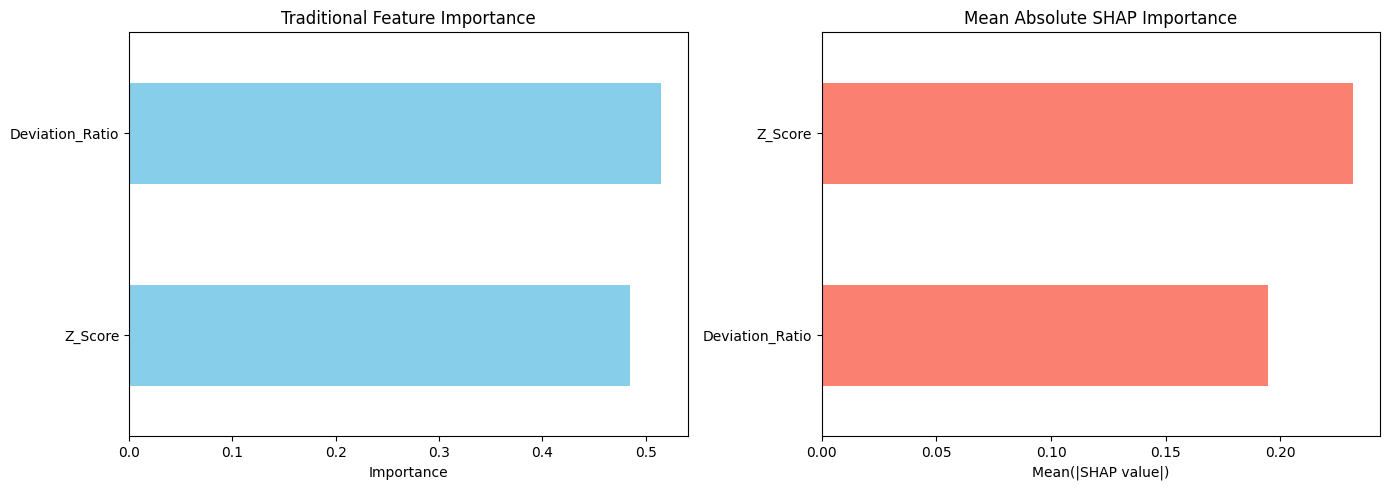

### Traditional Feature Importance

Feature  Importance
0  Deviation_Ratio    0.514865
1          Z_Score    0.485135

### Mean Absolute SHAP Feature Importance

Feature  Mean(|SHAP value|)
0          Z_Score            0.231867
1  Deviation_Ratio            0.194750

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shap
from IPython.display import display, Markdown

# 1. Traditional feature importance from Random Forest
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp = feat_imp.drop(labels='Normalized_Samples', errors='ignore')  # Safe drop
feat_imp_sorted = feat_imp.sort_values(ascending=False)

# 2. SHAP values and mean absolute SHAP importance
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

if isinstance(shap_values, list):
    base_shap_values = shap_values[1]
else:
    base_shap_values = shap_values

if len(base_shap_values.shape) == 3:
    base_shap_values = base_shap_values[:, :, 0]

mean_abs_shap = np.abs(base_shap_values).mean(axis=0)
shap_imp = pd.Series(mean_abs_shap, index=X.columns)
shap_imp = shap_imp.drop(labels='Normalized_Samples', errors='ignore')  # Safe drop
shap_imp_sorted = shap_imp.sort_values(ascending=False)

# 3. Plot side-by-side bar charts
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

feat_imp_sorted.plot(kind='barh', ax=axs[0], color='skyblue', title='Traditional Feature Importance')
axs[0].invert_yaxis()
axs[0].set_xlabel('Importance')

shap_imp_sorted.plot(kind='barh', ax=axs[1], color='salmon', title='Mean Absolute SHAP Importance')
axs[1].invert_yaxis()
axs[1].set_xlabel('Mean(|SHAP value|)')

plt.tight_layout()
plt.show()

# 4. Display tables side-by-side for clarity
display(Markdown("### Traditional Feature Importance"))
display(feat_imp_sorted.reset_index().rename(columns={'index': 'Feature', 0: 'Importance'}))

display(Markdown("### Mean Absolute SHAP Feature Importance"))
display(shap_imp_sorted.reset_index().rename(columns={'index': 'Feature', 0: 'Mean(|SHAP value|)'}))



### Permutation Test for Outlier Years

In [28]:
import numpy as np
from scipy.stats import ttest_1samp
import pandas as pd
from IPython.display import display, Markdown

# Outlier years previously found (e.g., Z-score > 2)
outliers = df_ml[df_ml['High_Risk'] == 1][['Sport', 'Year', 'AAF_Rate_per_1000']]

# Function: permutation test (one-sample)
def permutation_test(value, sample, n_permutations=10000):
    obs_diff = value - np.mean(sample)
    perm_diffs = []
    combined = np.append(sample, value)
    for _ in range(n_permutations):
        np.random.shuffle(combined)
        perm_sample = combined[:-1]
        perm_diff = value - np.mean(perm_sample)
        perm_diffs.append(perm_diff)
    p_value = np.mean(np.abs(perm_diffs) >= np.abs(obs_diff))
    return p_value

results = []
for _, row in outliers.iterrows():
    sport, year, value = row['Sport'], row['Year'], row['AAF_Rate_per_1000']
    sample = df_ml[(df_ml['Sport'] == sport) & (df_ml['Year'] != year)]['AAF_Rate_per_1000'].values
    t_stat, t_pval = ttest_1samp(sample, value)
    perm_pval = permutation_test(value, sample)
    results.append({
        'Sport': sport,
        'Year': year,
        'Outlier_Rate': value,
        'Mean_Other_Years': np.mean(sample),
        'Ttest_p': t_pval,
        'Perm_p': perm_pval
    })

df_significance = pd.DataFrame(results)
df_significance = df_significance.sort_values('Perm_p')

# Display with title
display(Markdown("### Statistical Significance of Outlier AAF Rates (Permutation Test Results)"))
display(df_significance)



### Statistical Significance of Outlier AAF Rates (Permutation Test Results)

Sport  Year  Outlier_Rate  Mean_Other_Years       Ttest_p  Perm_p
28      Boules Sports  2020     60.606061         30.436016  4.448819e-05  0.0487
23       Field Hockey  2018      9.994740          4.489283  3.633912e-05  0.0799
21      Arm Wrestling  2018    103.773585         82.506233  1.750803e-02  0.0820
24           Handball  2018     10.480573          5.052014  1.141056e-05  0.0890
1        Bodybuilding  2014    135.456017        168.233701  3.578098e-03  0.0917
6                Golf  2015     21.645022          9.520035  5.989575e-06  0.0986
8            Muaythai  2015     72.916667         37.183224  7.830494e-05  0.1054
20       Bodybuilding  2017    198.577356        160.343534  1.122497e-03  0.1065
12           Biathlon  2016      9.302326          1.705586  8.742764e-07  0.1066
17          Taekwondo  2016     14.892443          7.466360  2.244958e-05  0.1076
29            Kabaddi  2020     85.365854         32.614122  2.535809e-04  0.1086
10           Aquatics  2016      9.639590          4.518232  7.054039e-07  0.1090
15              Sambo  2016     58.608059         21.920861  1.248435e-06  0.1096
18          Wrestling  2016     26.315789         12.136014  5.034300e-07  0.1102
30       Powerboating  2020    142.857143         16.652270  8.122235e-10  0.1103
31  Underwater Sports  2020     52.980132         10.365731  1.455606e-07  0.1109
16            Skating  2016      7.477153          2.174554  1.889399e-07  0.1122
9       Weightlifting  2015     26.522880         14.469695  2.028412e-05  0.1129
3              Skiing  2014      7.381741          1.831288  4.206183e-07  0.1153
2       Roller Sports  2014     19.021739          7.275564  1.166165e-05  0.1155
7              Karate  2015     20.992366          6.720438  1.440122e-06  0.1170
4       Arm Wrestling  2015     66.420664         87.175348  1.974568e-02  0.1772
34      Arm Wrestling  2022    101.694915         82.766067  3.020112e-02  0.1850
33       Bodybuilding  2021    141.605839        167.464974  1.471562e-02  0.2103
27       Bodybuilding  2020    186.893204        161.804053  1.717178e-02  0.2210
14            Kabaddi  2016     78.651685         33.453393  1.089316e-03  0.2249
19      Arm Wrestling  2017     99.476440         83.043376  5.342772e-02  0.2649
13       Bodybuilding  2016    185.942492        161.922892  2.125583e-02  0.3271
0       Arm Wrestling  2014     83.044983         85.097308  7.888733e-01  0.3319
35       Bodybuilding  2022    145.211123        167.014313  3.293316e-02  0.3323
5        Bodybuilding  2015    147.515528        166.726263  5.446805e-02  0.4357
11      Arm Wrestling  2016     91.836735         83.998339  3.194371e-01  0.4442
22       Bodybuilding  2018    170.491803        163.854228  4.671261e-01  0.4452
25      Arm Wrestling  2019     87.591241         84.529026  6.902478e-01  0.5294
26       Bodybuilding  2019    169.632266        163.961670  5.327796e-01  0.5509
32      Arm Wrestling  2021     87.431694         84.548969  7.073950e-01  0.6562

In [29]:
import numpy as np
from scipy.stats import ttest_1samp
import pandas as pd
from IPython.display import display, Markdown

# -- Outlier years previously found (e.g., Z-score > 2) --
outliers = df_ml[df_ml['High_Risk'] == 1][['Sport', 'Year', 'AAF_Rate_per_1000']]

def permutation_test(value, sample, n_permutations=10000):
    obs_diff = value - np.mean(sample)
    perm_diffs = []
    combined = np.append(sample, value)
    for _ in range(n_permutations):
        np.random.shuffle(combined)
        perm_sample = combined[:-1]
        perm_diff = value - np.mean(perm_sample)
        perm_diffs.append(perm_diff)
    p_value = np.mean(np.abs(perm_diffs) >= np.abs(obs_diff))
    return p_value

results = []
for _, row in outliers.iterrows():
    sport, year, value = row['Sport'], row['Year'], row['AAF_Rate_per_1000']
    if sport not in sports_in_all_years:
        continue
    sample = df_ml[(df_ml['Sport'] == sport) & (df_ml['Year'] != year)]['AAF_Rate_per_1000'].values
    if len(sample) == 0:
        continue
    t_stat, t_pval = ttest_1samp(sample, value)
    perm_pval = permutation_test(value, sample)
    results.append({
        'Sport': sport,
        'Year': year,
        'Outlier_Rate': value,
        'Mean_Other_Years': np.mean(sample),
        'Perm_p': perm_pval
    })

df_significance = pd.DataFrame(results)

significant = df_significance[df_significance['Perm_p'] < 0.05]
possible = df_significance[(df_significance['Perm_p'] >= 0.05) & (df_significance['Perm_p'] < 0.1)]

summary_table = pd.concat([
    significant.assign(Significance='Significant Outlier (p < 0.05)'),
    possible.assign(Significance='Possible Anomaly (0.05 <= p < 0.1)')
])

summary_table = summary_table[['Sport', 'Year', 'Outlier_Rate', 'Mean_Other_Years', 'Perm_p', 'Significance']]
summary_table = summary_table.sort_values('Perm_p')

display(Markdown("### Summary of Statistically Significant Outlier Sport-Years (Permutation Test)"))
display(summary_table)




### Summary of Statistically Significant Outlier Sport-Years (Permutation Test)

Sport  Year  Outlier_Rate  Mean_Other_Years  Perm_p                        Significance
28  Boules Sports  2020     60.606061         30.436016  0.0504  Possible Anomaly (0.05 <= p < 0.1)
23   Field Hockey  2018      9.994740          4.489283  0.0819  Possible Anomaly (0.05 <= p < 0.1)
21  Arm Wrestling  2018    103.773585         82.506233  0.0864  Possible Anomaly (0.05 <= p < 0.1)
1    Bodybuilding  2014    135.456017        168.233701  0.0906  Possible Anomaly (0.05 <= p < 0.1)
24       Handball  2018     10.480573          5.052014  0.0983  Possible Anomaly (0.05 <= p < 0.1)

### Table of “Actionable Insights”

In [30]:
# Filter risk summary and samples to only sports present every year
filtered_risk_summary = df_risk_summary[df_risk_summary['Sport'].isin(sports_in_all_years)]
filtered_samples = df_samples[df_samples['Sport'].isin(sports_in_all_years)]

top_risk_sports = filtered_risk_summary.head(3)[['Sport', 'Mean_AAF_Rate', 'Mean_Z_Score', 'Outlier_Years']]
spike_sports = df_ml[
    (df_ml['Sport'].isin(sports_in_all_years)) &
    (df_ml['Deviation_Ratio'] > 1.5)
][['Sport', 'Year', 'AAF_Rate_per_1000', 'Deviation_Ratio']]
low_risk_sports = filtered_risk_summary.tail(3)[['Sport', 'Mean_AAF_Rate', 'Mean_Z_Score']]
mean_samples = filtered_samples.groupby('Year')['Total_Samples'].mean()
min_coverage_years = mean_samples.sort_values().head(3)

from IPython.display import display, Markdown

display(Markdown("### Top 3 High-Risk Sports (Present in All Years)"))
display(top_risk_sports)

display(Markdown("### Sports with Sudden Spikes (Deviation_Ratio > 1.5, Present in All Years)"))
display(spike_sports)

display(Markdown("### Lowest-Risk Sports (Present in All Years)"))
display(low_risk_sports)

display(Markdown("### Years with Lowest Mean Testing Coverage (for Core Sports Only)"))
display(min_coverage_years)



### Top 3 High-Risk Sports (Present in All Years)

Sport  Mean_AAF_Rate  Mean_Z_Score  Outlier_Years
0   Bodybuilding     164.591736      5.105749              9
1  Arm Wrestling      84.869272      2.391834              7
2     Kickboxing      45.576335      0.965697              0

### Sports with Sudden Spikes (Deviation_Ratio > 1.5, Present in All Years)

Sport  Year  AAF_Rate_per_1000  Deviation_Ratio
35              Skiing  2014           7.381741         2.015411
71              Karate  2015          20.992366         1.527310
99            Biathlon  2016           9.302326         2.648445
126            Skating  2016           7.477153         1.705455
304       Powerboating  2020         142.857143         3.657115
317  Underwater Sports  2020          52.980132         2.508464

### Lowest-Risk Sports (Present in All Years)

Sport  Mean_AAF_Rate  Mean_Z_Score
43   Skating       2.763732     -0.547956
44    Skiing       2.448005     -0.552764
45  Biathlon       2.549668     -0.554100

### Years with Lowest Mean Testing Coverage (for Core Sports Only)

Year
2020    2764.326087
2014    4169.934783
2016    4375.804348
Name: Total_Samples, dtype: float64

### Cluster Sports by Doping Pattern


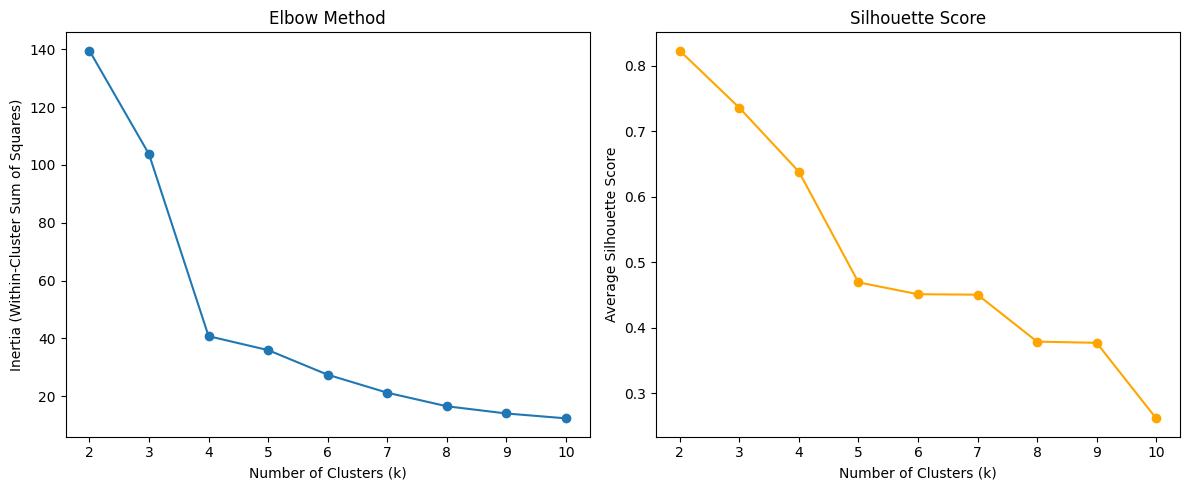

In [31]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import StandardScaler

# Determine Optimal Number of Clusters

# --- Pivot to sport × year AAF matrix ---
df_cluster = df_aaf_rate[df_aaf_rate['Sport'].isin(sports_in_all_years)].copy()
aaf_matrix = df_cluster.pivot(index='Sport', columns='Year', values='AAF_Rate_per_1000')

# --- Fill missing AAF values with 0 (safer for scaling) ---
aaf_matrix_filled = aaf_matrix.fillna(0)

# --- Standardize features across years ---
scaler = StandardScaler()
aaf_scaled = scaler.fit_transform(aaf_matrix_filled)

# --- Input matrix (sports × years) ---
X = aaf_scaled  # standardized data from earlier

# --- Try cluster counts from 2 to 10 ---
k_values = range(2, 11)
inertia = []
silhouette = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertia.append(model.inertia_)  # for elbow
    silhouette.append(silhouette_score(X, model.labels_))  # cohesion/separation

# --- Plot Elbow and Silhouette ---
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Elbow Plot
ax[0].plot(k_values, inertia, marker='o')
ax[0].set_title('Elbow Method')
ax[0].set_xlabel('Number of Clusters (k)')
ax[0].set_ylabel('Inertia (Within-Cluster Sum of Squares)')

# Silhouette Plot
ax[1].plot(k_values, silhouette, marker='o', color='orange')
ax[1].set_title('Silhouette Score')
ax[1].set_xlabel('Number of Clusters (k)')
ax[1].set_ylabel('Average Silhouette Score')

plt.tight_layout()
plt.show()


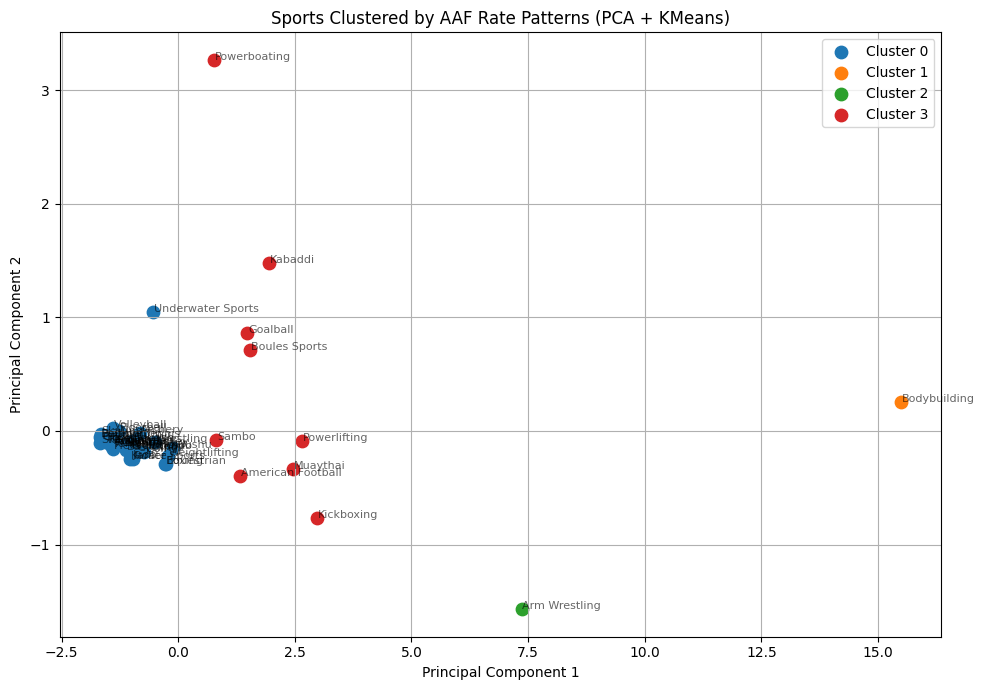

In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# --- STEP 1: Pivot to matrix: rows = sports, cols = years ---
df_cluster = df_aaf_rate[df_aaf_rate['Sport'].isin(sports_in_all_years)].copy()
aaf_matrix = df_cluster.pivot(index='Sport', columns='Year', values='AAF_Rate_per_1000')

# --- STEP 2: Fill missing with 0s ---
aaf_matrix_filled = aaf_matrix.fillna(0)

# --- STEP 3: Standardize each feature (year) ---
scaler = StandardScaler()
aaf_scaled = scaler.fit_transform(aaf_matrix_filled)

# --- STEP 4: PCA for 2D visualization ---
pca = PCA(n_components=2)
aaf_2d = pca.fit_transform(aaf_scaled)

# --- STEP 5: KMeans Clustering ---
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(aaf_scaled)

# --- STEP 6: Build DataFrame for plotting ---
df_plot = pd.DataFrame({
    'Sport': aaf_matrix_filled.index,
    'PC1': aaf_2d[:, 0],
    'PC2': aaf_2d[:, 1],
    'Cluster': clusters
})

# --- STEP 7: Plot the clusters as dots ---
plt.figure(figsize=(10, 7))
for cluster in sorted(df_plot['Cluster'].unique()):
    subset = df_plot[df_plot['Cluster'] == cluster]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {cluster}', s=80)

# Optional: label points with sport names
for _, row in df_plot.iterrows():
    plt.text(row['PC1'] + 0.02, row['PC2'], row['Sport'], fontsize=8, alpha=0.6)

plt.title("Sports Clustered by AAF Rate Patterns (PCA + KMeans)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



### Dendrogram (Hierarchical Clustering)



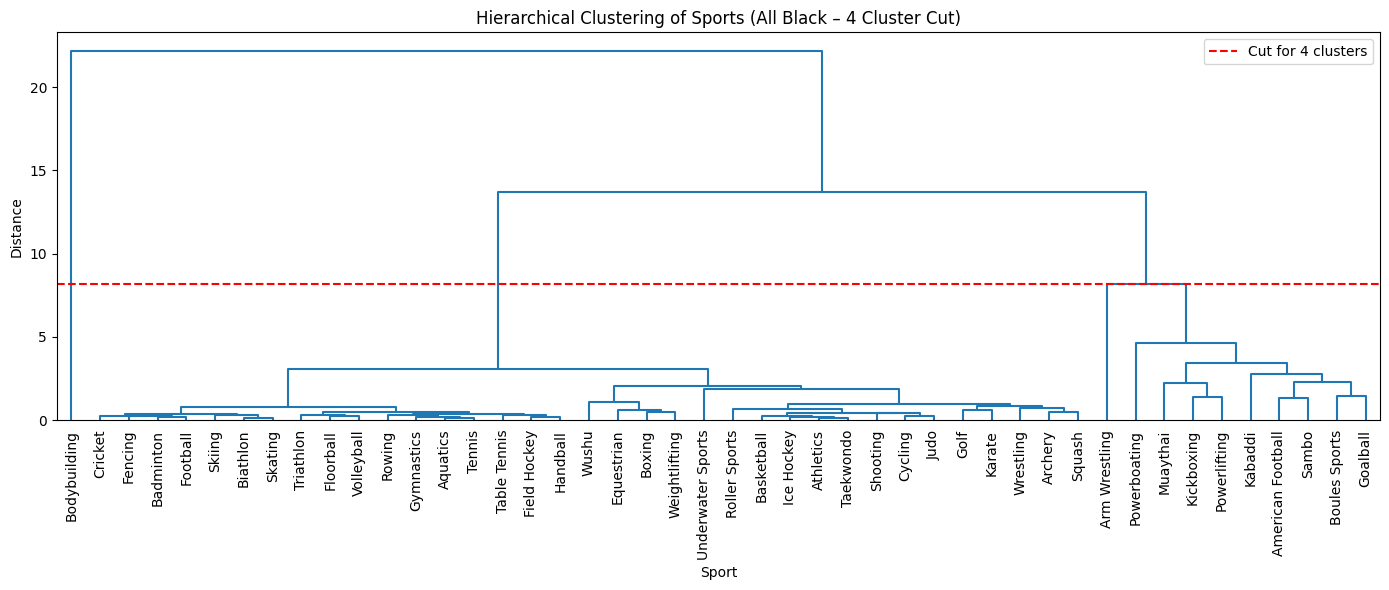

In [33]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Step 1: Compute linkage matrix
Z = linkage(aaf_scaled, method='ward')

# Step 2: Determine height to cut into 4 clusters
num_clusters = 4
cut_height = Z[-(num_clusters - 1), 2]  # Distance threshold just before 4th merge

# Step 3: Plot dendrogram with all-black styling
plt.figure(figsize=(14, 6))
dendrogram(
    Z,
    labels=aaf_matrix_filled.index.tolist(),
    leaf_rotation=90,
    leaf_font_size=10,
    color_threshold=0  # disables color mapping — all lines black
)

# Step 4: Black labels (default), red cut line
plt.axhline(y=cut_height, color='red', linestyle='--', label='Cut for 4 clusters')
plt.title("Hierarchical Clustering of Sports (All Black – 4 Cluster Cut)")
plt.xlabel("Sport")
plt.ylabel("Distance")
plt.legend()
plt.tight_layout()
plt.show()


In [34]:
# Assign the cluster labels back to the DataFrame that has sports as the index
df_aaf_rate_with_clusters = df_aaf_rate[df_aaf_rate['Sport'].isin(sports_in_all_years)].copy()

# Create a mapping from sport to cluster label
sport_to_cluster = dict(zip(aaf_matrix_filled.index, clusters))

# Map the cluster labels to the main DataFrame
df_aaf_rate_with_clusters['Cluster'] = df_aaf_rate_with_clusters['Sport'].map(sport_to_cluster)

# Now group by cluster and describe the key metrics using the new DataFrame
cluster_summary = df_aaf_rate_with_clusters.groupby('Cluster')[['AAF_Rate_per_1000']].agg(['mean', 'std', 'count'])

# Display the summary
print("\n=== Cluster Summary ===")
display(cluster_summary)

# Examine sports within each cluster
print("\n=== Sports per Cluster ===")
for cluster_id in sorted(df_aaf_rate_with_clusters['Cluster'].unique()):
    sports_in_cluster = df_aaf_rate_with_clusters[df_aaf_rate_with_clusters['Cluster'] == cluster_id]['Sport'].unique().tolist()
    print(f"Cluster {cluster_id}: {sports_in_cluster}")


=== Cluster Summary ===


AAF_Rate_per_1000                 
                     mean        std count
Cluster                                   
0                7.842277   5.860626   315
1              164.591736  22.948031     9
2               84.869272  19.527849     9
3               35.837310  20.508479    81


=== Sports per Cluster ===
Cluster 0: ['Aquatics', 'Archery', 'Athletics', 'Badminton', 'Basketball', 'Biathlon', 'Boxing', 'Cricket', 'Cycling', 'Equestrian', 'Fencing', 'Field Hockey', 'Floorball', 'Football', 'Golf', 'Gymnastics', 'Handball', 'Ice Hockey', 'Judo', 'Karate', 'Roller Sports', 'Rowing', 'Shooting', 'Skating', 'Skiing', 'Squash', 'Table Tennis', 'Taekwondo', 'Tennis', 'Triathlon', 'Underwater Sports', 'Volleyball', 'Weightlifting', 'Wrestling', 'Wushu']
Cluster 1: ['Bodybuilding']
Cluster 2: ['Arm Wrestling']
Cluster 3: ['American Football', 'Boules Sports', 'Goalball', 'Kabaddi', 'Kickboxing', 'Muaythai', 'Powerboating', 'Powerlifting', 'Sambo']


## Outlook - Futur Research ideas

### Forecast (AAF_Rate_per_1000 per Sport)

In [35]:
import os
import sys
import contextlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import warnings
warnings.filterwarnings("ignore")

# === Suppress all output (stdout/stderr)
@contextlib.contextmanager
def suppress_output():
    with open(os.devnull, 'w') as fnull:
        old_stdout, old_stderr = sys.stdout, sys.stderr
        sys.stdout, sys.stderr = fnull, fnull
        try:
            yield
        finally:
            sys.stdout, sys.stderr = old_stdout, old_stderr

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Silence TensorFlow logs

# === Main function for model preparation
def prepare_model_outputs():
    outputs = {}

    # === Holt-Winters ===
    hw_forecast_rows = []
    for sport in sorted(sports_in_all_years):
        sport_data = df_aaf_rate[df_aaf_rate['Sport'] == sport].sort_values('Year')
        y = sport_data['AAF_Rate_per_1000'].values
        x = sport_data['Year'].values
        model = ExponentialSmoothing(y, trend='add', seasonal=None, initialization_method="estimated").fit()
        y_pred_hw = model.fittedvalues
        y_forecast_hw = model.forecast(1)
        df_hw = pd.DataFrame({
            'Sport': sport,
            'Year': list(x) + [x[-1] + 1],
            'HW_Forecast': np.concatenate([y_pred_hw, y_forecast_hw])
        })
        hw_forecast_rows.append(df_hw)
    outputs['df_hw_all'] = pd.concat(hw_forecast_rows, ignore_index=True)

    # === ML (LGBM & XGBoost) ===
    df = df_aaf_rate[df_aaf_rate['Sport'].isin(sports_in_all_years)].copy()
    df = df.sort_values(['Sport', 'Year'])
    for lag in [1, 2]:
        df[f'lag_{lag}'] = df.groupby('Sport')['AAF_Rate_per_1000'].shift(lag)
    df['Year_num'] = df['Year'] - df['Year'].min()
    df['Mean_Hist_AAF'] = df.groupby('Sport')['AAF_Rate_per_1000'].transform('mean')
    le = LabelEncoder()
    df['Sport_enc'] = le.fit_transform(df['Sport'])
    df_ml = df.dropna(subset=['lag_1', 'lag_2']).copy()
    feature_cols = ['lag_1', 'lag_2', 'Year_num', 'Sport_enc', 'Mean_Hist_AAF']
    X = df_ml[feature_cols]
    y = df_ml['AAF_Rate_per_1000']
    last_year = df_ml['Year'].max()
    X_train = X[df_ml['Year'] < last_year]
    y_train = y[df_ml['Year'] < last_year]

    # LightGBM
    with suppress_output():
        model_lgbm = LGBMRegressor(n_estimators=100, learning_rate=0.08, max_depth=3, random_state=42, verbose=-1)
        model_lgbm.fit(X_train, y_train)
        df_ml['LGBM_Predicted'] = model_lgbm.predict(X)

    # XGBoost
    with suppress_output():
        model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.08, max_depth=3, random_state=42, verbosity=0)
        model_xgb.fit(X_train, y_train)
        df_ml['XGB_Predicted'] = model_xgb.predict(X)

    # Forecast next year
    future_year = last_year + 1
    future_rows = []
    for sport in sorted(sports_in_all_years):
        sport_enc = le.transform([sport])[0]
        hist = df_ml[df_ml['Sport'] == sport].sort_values('Year')
        if len(hist) < 2: continue
        row = {
            'Sport': sport,
            'Year': future_year,
            'lag_1': hist.iloc[-1]['AAF_Rate_per_1000'],
            'lag_2': hist.iloc[-2]['AAF_Rate_per_1000'],
            'Year_num': future_year - df['Year'].min(),
            'Sport_enc': sport_enc,
            'Mean_Hist_AAF': hist['AAF_Rate_per_1000'].mean()
        }
        future_rows.append(row)
    df_future = pd.DataFrame(future_rows)
    df_future['LGBM_Forecast'] = model_lgbm.predict(df_future[feature_cols])
    df_future['XGB_Forecast'] = model_xgb.predict(df_future[feature_cols])

    outputs['df_ml'] = df_ml
    outputs['df_future'] = df_future

    # === LSTM ===
    window = 3
    lstm_rows, lstm_next_forecast = [], []
    for sport in sorted(sports_in_all_years):
        sport_df = df_aaf_rate[df_aaf_rate['Sport'] == sport].sort_values('Year')
        values = sport_df['AAF_Rate_per_1000'].values
        years = sport_df['Year'].values
        if len(values) <= window: continue
        X_lstm, y_lstm, years_pred = [], [], []
        for i in range(len(values) - window):
            X_lstm.append(values[i:i+window])
            y_lstm.append(values[i+window])
            years_pred.append(years[i+window])
        X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)
        scaler_X, scaler_y = MinMaxScaler(), MinMaxScaler()
        X_scaled = scaler_X.fit_transform(X_lstm).reshape((-1, window, 1))
        y_scaled = scaler_y.fit_transform(y_lstm.reshape(-1, 1)).flatten()
        model = Sequential([LSTM(8, input_shape=(window, 1), activation='tanh'), Dense(1)])
        model.compile(optimizer='adam', loss='mse')
        with suppress_output():
            model.fit(X_scaled, y_scaled, epochs=60, batch_size=1, verbose=0)
        y_pred = scaler_y.inverse_transform(model.predict(X_scaled, verbose=0)).flatten()
        for i, year_val in enumerate(years_pred):
            lstm_rows.append({'Sport': sport, 'Year': year_val, 'LSTM_Predicted': y_pred[i]})
        last_seq_scaled = scaler_X.transform(values[-window:].reshape(1, -1)).reshape((1, window, 1))
        next_pred_scaled = model.predict(last_seq_scaled, verbose=0)[0, 0]
        next_pred = scaler_y.inverse_transform([[next_pred_scaled]])[0, 0]
        lstm_next_forecast.append({'Sport': sport, 'Year': future_year, 'LSTM_Forecast': next_pred})
    outputs['df_lstm_all'] = pd.DataFrame(lstm_rows)
    outputs['df_lstm_next'] = pd.DataFrame(lstm_next_forecast)
    return outputs

# === Run and plot all sports
model_outputs = prepare_model_outputs()

for sport in sorted(sports_in_all_years):
    plt.figure(figsize=(10, 4))
    actual_data = df_aaf_rate[df_aaf_rate['Sport'] == sport].sort_values('Year')
    x_actual, y_actual = actual_data['Year'].values, actual_data['AAF_Rate_per_1000'].values
    plt.plot(x_actual, y_actual, 'o-', color='royalblue', label='Actual')
    future_year = x_actual[-1] + 1

    hw_data = model_outputs['df_hw_all'][model_outputs['df_hw_all']['Sport'] == sport]
    if not hw_data.empty:
        plt.plot(hw_data['Year'], hw_data['HW_Forecast'], '^-', color='orange', label='Holt-Winters')

    df_ml = model_outputs['df_ml']
    lgbm_data = df_ml[df_ml['Sport'] == sport]
    if not lgbm_data.empty:
        plt.plot(lgbm_data['Year'], lgbm_data['LGBM_Predicted'], 's--', color='mediumorchid', label='LightGBM')
        next_row = model_outputs['df_future'][model_outputs['df_future']['Sport'] == sport]
        plt.plot(next_row['Year'], next_row['LGBM_Forecast'], '*', color='mediumorchid', markersize=14)

    xgb_data = df_ml[df_ml['Sport'] == sport]
    if not xgb_data.empty:
        plt.plot(xgb_data['Year'], xgb_data['XGB_Predicted'], 'd--', color='seagreen', label='XGBoost')
        next_row = model_outputs['df_future'][model_outputs['df_future']['Sport'] == sport]
        plt.plot(next_row['Year'], next_row['XGB_Forecast'], '*', color='seagreen', markersize=14)

    lstm_data = model_outputs['df_lstm_all'][model_outputs['df_lstm_all']['Sport'] == sport]
    if not lstm_data.empty:
        plt.plot(lstm_data['Year'], lstm_data['LSTM_Predicted'], 'o--', color='magenta', label='LSTM')
    next_row = model_outputs['df_lstm_next'][model_outputs['df_lstm_next']['Sport'] == sport]
    if not next_row.empty:
        plt.plot(next_row['Year'], next_row['LSTM_Forecast'], '*', color='magenta', markersize=14)

    plt.title(f"{sport} – AAF Rate per 1,000 (All Forecasts)")
    plt.xlabel("Year")
    plt.ylabel("AAF_Rate_per_1000")
    plt.legend()
    plt.tight_layout()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
from IPython.display import display, Markdown

# === Forecast accuracy summary per sport ===
sport_summary = []

for sport, df_grp_full in df_compare_all.groupby('Sport'):
    # Drop NaNs separately for each model
    df_grp_hw = df_grp_full.dropna(subset=['Actual', 'HW_Forecast'])
    df_grp_ml = df_grp_full.dropna(subset=['Actual', 'LGBM_Predicted', 'XGB_Predicted'])
    df_grp_lstm = df_grp_full.dropna(subset=['Actual', 'LSTM_Predicted'])

    # Require at least 1 data point per model to evaluate
    if len(df_grp_hw) < 1 or len(df_grp_ml) < 1 or len(df_grp_lstm) < 1:
        print(f"⚠️ Skipping {sport}: insufficient non-NaN data.")
        continue

    # Compute MAE/RMSE per model
    mae_hw = mean_absolute_error(df_grp_hw['Actual'], df_grp_hw['HW_Forecast'])
    rmse_hw = np.sqrt(mean_squared_error(df_grp_hw['Actual'], df_grp_hw['HW_Forecast']))

    mae_lgbm = mean_absolute_error(df_grp_ml['Actual'], df_grp_ml['LGBM_Predicted'])
    rmse_lgbm = np.sqrt(mean_squared_error(df_grp_ml['Actual'], df_grp_ml['LGBM_Predicted']))

    mae_xgb = mean_absolute_error(df_grp_ml['Actual'], df_grp_ml['XGB_Predicted'])
    rmse_xgb = np.sqrt(mean_squared_error(df_grp_ml['Actual'], df_grp_ml['XGB_Predicted']))

    mae_lstm = mean_absolute_error(df_grp_lstm['Actual'], df_grp_lstm['LSTM_Predicted'])
    rmse_lstm = np.sqrt(mean_squared_error(df_grp_lstm['Actual'], df_grp_lstm['LSTM_Predicted']))

    sport_summary.append({
        'Sport': sport,
        'N_years': len(df_grp_full),
        'HW_MAE': mae_hw,
        'HW_RMSE': rmse_hw,
        'LightGBM_MAE': mae_lgbm,
        'LightGBM_RMSE': rmse_lgbm,
        'XGB_MAE': mae_xgb,
        'XGB_RMSE': rmse_xgb,
        'LSTM_MAE': mae_lstm,
        'LSTM_RMSE': rmse_lstm,
    })

# === Create accuracy table and sort ===
sport_accuracy_table = pd.DataFrame(sport_summary)
sort_col = 'LightGBM_MAE' if 'LightGBM_MAE' in sport_accuracy_table.columns else 'Sport'
sport_accuracy_table = sport_accuracy_table[[
    'Sport', 'N_years',
    'HW_MAE', 'HW_RMSE',
    'LightGBM_MAE', 'LightGBM_RMSE',
    'XGB_MAE', 'XGB_RMSE',
    'LSTM_MAE', 'LSTM_RMSE'
]].sort_values(sort_col).round(3)

# === Style: Bold best model per sport ===
def highlight_best(row):
    styles = [''] * len(row)
    mae_cols = ['HW_MAE', 'LightGBM_MAE', 'XGB_MAE', 'LSTM_MAE']
    rmse_cols = ['HW_RMSE', 'LightGBM_RMSE', 'XGB_RMSE', 'LSTM_RMSE']

    # Highlight best MAE
    valid_maes = {col: row[col] for col in mae_cols if pd.notna(row[col])}
    if valid_maes:
        min_mae = min(valid_maes.values())
        for col, val in valid_maes.items():
            if np.isclose(val, min_mae):
                styles[sport_accuracy_table.columns.get_loc(col)] = 'font-weight: bold; color: green'

    # Highlight best RMSE
    valid_rmses = {col: row[col] for col in rmse_cols if pd.notna(row[col])}
    if valid_rmses:
        min_rmse = min(valid_rmses.values())
        for col, val in valid_rmses.items():
            if np.isclose(val, min_rmse):
                styles[sport_accuracy_table.columns.get_loc(col)] = 'font-weight: bold; color: green'

    return styles

# === Display results ===
display(Markdown("### 🏅 **Forecast Accuracy Per Sport (All Available Years)**"))
if not sport_accuracy_table.empty:
    display(sport_accuracy_table.style.apply(highlight_best, axis=1))
else:
    display(Markdown("❌ No sports had sufficient data for accuracy evaluation."))



⚠️ Skipping Aesthetic Group Gymnastics: insufficient non-NaN data.
⚠️ Skipping Aikido: insufficient non-NaN data.
⚠️ Skipping Air Sports: insufficient non-NaN data.
⚠️ Skipping Angling: insufficient non-NaN data.
⚠️ Skipping Armwrestling: insufficient non-NaN data.
⚠️ Skipping Australian Rules: insufficient non-NaN data.
⚠️ Skipping Australian Rules Football: insufficient non-NaN data.
⚠️ Skipping Automobile: insufficient non-NaN data.
⚠️ Skipping Automobile Sports: insufficient non-NaN data.
⚠️ Skipping Balle Au Tambourin: insufficient non-NaN data.
⚠️ Skipping Ballon Au Poing: insufficient non-NaN data.
⚠️ Skipping Bandy: insufficient non-NaN data.
⚠️ Skipping Baseball: insufficient non-NaN data.
⚠️ Skipping Baseball/Softball: insufficient non-NaN data.
⚠️ Skipping Basque Pelota: insufficient non-NaN data.
⚠️ Skipping Basque Sports: insufficient non-NaN data.
⚠️ Skipping Beach Tennis: insufficient non-NaN data.
⚠️ Skipping Billiards: insufficient non-NaN data.
⚠️ Skipping Billiards S

### 🏅 **Forecast Accuracy Per Sport (All Available Years)**

In [49]:
# Count wins per metric (for all four models)
mae_cols = ['HW_MAE', 'LightGBM_MAE', 'XGB_MAE', 'LSTM_MAE']
rmse_cols = ['HW_RMSE', 'LightGBM_RMSE', 'XGB_RMSE', 'LSTM_RMSE']

# For MAE
mae_min = sport_accuracy_table[mae_cols].idxmin(axis=1)
mae_hw_wins = (mae_min == 'HW_MAE').sum()
mae_lgbm_wins = (mae_min == 'LightGBM_MAE').sum()
mae_xgb_wins = (mae_min == 'XGB_MAE').sum()
mae_lstm_wins = (mae_min == 'LSTM_MAE').sum()

# For RMSE
rmse_min = sport_accuracy_table[rmse_cols].idxmin(axis=1)
rmse_hw_wins = (rmse_min == 'HW_RMSE').sum()
rmse_lgbm_wins = (rmse_min == 'LightGBM_RMSE').sum()
rmse_xgb_wins = (rmse_min == 'XGB_RMSE').sum()
rmse_lstm_wins = (rmse_min == 'LSTM_RMSE').sum()

from IPython.display import display, Markdown

display(Markdown(f"""
#### **How Often Each Model Wins (Per Sport)**

|          | HW Wins | LightGBM Wins | XGBoost Wins | LSTM Wins |
|----------|---------|---------------|--------------|-----------|
| MAE      | {mae_hw_wins}      | {mae_lgbm_wins}           | {mae_xgb_wins}         | {mae_lstm_wins}      |
| RMSE     | {rmse_hw_wins}      | {rmse_lgbm_wins}           | {rmse_xgb_wins}         | {rmse_lstm_wins}      |
"""))



#### **How Often Each Model Wins (Per Sport)**

|          | HW Wins | LightGBM Wins | XGBoost Wins | LSTM Wins |
|----------|---------|---------------|--------------|-----------|
| MAE      | 10      | 1           | 18         | 17      |
| RMSE     | 9      | 2           | 18         | 17      |
